# Import

In [1]:
import torch
import os
from matplotlib import pyplot as plt
import numpy as np

from utils.configuration_parser.fit_model_configuration import get_fit_model_configuration
from utils.image_helpers import load_image, show_images, plot_image_grid, rgb2gray, get_images
from models.model_creation import create_model_from_configuration
from fitting.Fitter import create_fitter_from_configuration
from simulation.Simulation import Simulation
from fitting.Result import calculate_combination_results

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor

(256, 256)


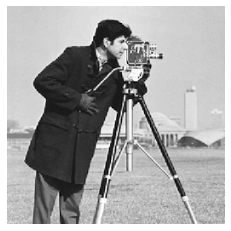

In [2]:
original_rgb_image = load_image('data/raw_images/sample_images/cameraman.png')
#original_rgb_image = load_image('data/raw_images/sample_images/canonical_mri.png')
#original_rgb_image = load_image('data/raw_images/sample_images/lena.png')
original_image = rgb2gray(original_rgb_image)
#original_image = get_images('data/imagenet_v2_top_images', max_amount=1, size=2048)[0]
#original_image = np.concatenate((np.ones((256,128)), np.zeros((256,128))), axis=1)
print(original_image.shape)
plt.imshow(original_image, 'gray')
plt.axis('off')
plt.show()

# Gibbs Simulation

In [3]:
input_size = original_image.shape
cropped_size = (100, 100)

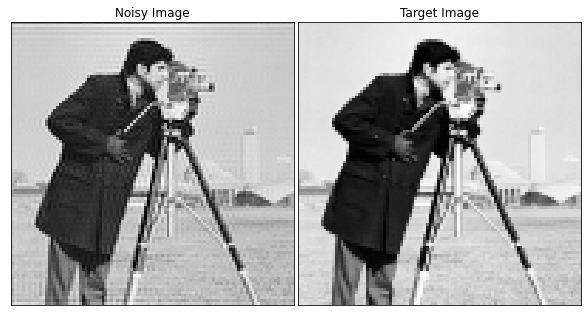

In [4]:
simulation = Simulation(input_size=input_size, cropped_size=cropped_size, noise_sigma=0)
noisy_image, target_image = simulation(original_image)

plot_image_grid([noisy_image, target_image], ['Noisy Image', 'Target Image'], ncols=2)
plt.show()

# Configuration

In [5]:
fit_model_configuration = get_fit_model_configuration()

fit_model_configuration.model_type = 'deep'
fit_model_configuration.input_shape = [4, 4]
fit_model_configuration.number_of_hidden_channels = 64
fit_model_configuration.number_of_layers = 4

fit_model_configuration.log_frequency = 100
fit_model_configuration.convergence_check_length = 100000
fit_model_configuration.number_of_iterations = 100000

fit_model_configuration.result_path = None
fit_model_configuration.image_dimensions = list(cropped_size) + [1]
fit_model_configuration.save_losses = False
fit_model_configuration.find_best = False
fit_model_configuration.constant_input = True

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
print(str(fit_model_configuration))

number of GPUs:  1
image_dimensions: [100, 100, 1]  
result_path: None  
model_type: deep  
input_shape: [4, 4]  
number_of_layers: 4  
number_of_hidden_channels: 64  
number_of_iterations: 100000  
learning_rate: 0.1  
convergence_check_length: 100000  
log_frequency: 100  
find_best: False  
save_losses: False  
constant_input: True  
data_type: <class 'torch.cuda.FloatTensor'>  



# Fitting

In [6]:
number_of_models = 32
number_of_intervals = 1000
size_of_interval = int(fit_model_configuration.number_of_iterations/number_of_intervals)
fit_model_configuration.number_of_iterations = size_of_interval

In [7]:
models = []
fitters = []
for _ in range(number_of_models):
    models.append(create_model_from_configuration(fit_model_configuration))
    fitters.append(create_fitter_from_configuration(fit_model_configuration))

In [8]:
results = []
for interval_index in range(number_of_intervals):
    print(f'+++ Interval {interval_index + 1}/{number_of_intervals} +++')
    step_results = []
    for model_index, (model, fitter) in enumerate(zip(models, fitters)):
        print(f'+ Model {model_index + 1}/{number_of_models} +')
        fitter(model, noisy_image, target_image)
        step_results.append(fitter.get_result())
        print('')
    results.append(step_results)
    print('')

+++ Interval 1/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.014936, Target Loss: 0.012759
+ Model 2/32 +
Step: 00100, Loss: 0.013888, Target Loss: 0.011864
+ Model 3/32 +
Step: 00100, Loss: 0.016660, Target Loss: 0.014769
+ Model 4/32 +
Step: 00100, Loss: 0.012897, Target Loss: 0.011142
+ Model 5/32 +
Step: 00100, Loss: 0.013165, Target Loss: 0.010771
+ Model 6/32 +
Step: 00100, Loss: 0.014065, Target Loss: 0.011792
+ Model 7/32 +
Step: 00100, Loss: 0.015024, Target Loss: 0.013077
+ Model 8/32 +
Step: 00100, Loss: 0.012598, Target Loss: 0.010404
+ Model 9/32 +
Step: 00100, Loss: 0.013006, Target Loss: 0.010708
+ Model 10/32 +
Step: 00100, Loss: 0.014113, Target Loss: 0.011890
+ Model 11/32 +
Step: 00100, Loss: 0.013280, Target Loss: 0.011039
+ Model 12/32 +
Step: 00100, Loss: 0.011570, Target Loss: 0.009867
+ Model 13/32 +
Step: 00100, Loss: 0.012566, Target Loss: 0.010716
+ Model 14/32 +
Step: 00100, Loss: 0.013654, Target Loss: 0.011549
+ Model 15/32 +
Step: 00100, Loss: 0.011565, Ta

Step: 00100, Loss: 0.008512, Target Loss: 0.006826
+ Model 27/32 +
Step: 00100, Loss: 0.010556, Target Loss: 0.008688
+ Model 28/32 +
Step: 00100, Loss: 0.009464, Target Loss: 0.007388
+ Model 29/32 +
Step: 00100, Loss: 0.008326, Target Loss: 0.006958
+ Model 30/32 +
Step: 00100, Loss: 0.007853, Target Loss: 0.006393
+ Model 31/32 +
Step: 00100, Loss: 0.009133, Target Loss: 0.007122
+ Model 32/32 +
Step: 00100, Loss: 0.008468, Target Loss: 0.006826

+++ Interval 5/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.008589, Target Loss: 0.006738
+ Model 2/32 +
Step: 00100, Loss: 0.006890, Target Loss: 0.005676
+ Model 3/32 +
Step: 00100, Loss: 0.008318, Target Loss: 0.006777
+ Model 4/32 +
Step: 00100, Loss: 0.007437, Target Loss: 0.005995
+ Model 5/32 +
Step: 00100, Loss: 0.008103, Target Loss: 0.006921
+ Model 6/32 +
Step: 00100, Loss: 0.009649, Target Loss: 0.007985
+ Model 7/32 +
Step: 00100, Loss: 0.008863, Target Loss: 0.006975
+ Model 8/32 +
Step: 00100, Loss: 0.007703, Target Loss: 0.0

Step: 00100, Loss: 0.008133, Target Loss: 0.006664
+ Model 20/32 +
Step: 00100, Loss: 0.005828, Target Loss: 0.004475
+ Model 21/32 +
Step: 00100, Loss: 0.007249, Target Loss: 0.005793
+ Model 22/32 +
Step: 00100, Loss: 0.006713, Target Loss: 0.005262
+ Model 23/32 +
Step: 00100, Loss: 0.005735, Target Loss: 0.004720
+ Model 24/32 +
Step: 00100, Loss: 0.007525, Target Loss: 0.005989
+ Model 25/32 +
Step: 00100, Loss: 0.005902, Target Loss: 0.004959
+ Model 26/32 +
Step: 00100, Loss: 0.006580, Target Loss: 0.005204
+ Model 27/32 +
Step: 00100, Loss: 0.009477, Target Loss: 0.007883
+ Model 28/32 +
Step: 00100, Loss: 0.008916, Target Loss: 0.007302
+ Model 29/32 +
Step: 00100, Loss: 0.006478, Target Loss: 0.005304
+ Model 30/32 +
Step: 00100, Loss: 0.006927, Target Loss: 0.005834
+ Model 31/32 +
Step: 00100, Loss: 0.005479, Target Loss: 0.004677
+ Model 32/32 +
Step: 00100, Loss: 0.006096, Target Loss: 0.004961

+++ Interval 9/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.007318, Target Lo

Step: 00100, Loss: 0.007151, Target Loss: 0.005886
+ Model 13/32 +
Step: 00100, Loss: 0.006186, Target Loss: 0.005126
+ Model 14/32 +
Step: 00100, Loss: 0.006067, Target Loss: 0.005194
+ Model 15/32 +
Step: 00100, Loss: 0.006021, Target Loss: 0.004997
+ Model 16/32 +
Step: 00100, Loss: 0.007699, Target Loss: 0.005984
+ Model 17/32 +
Step: 00100, Loss: 0.006571, Target Loss: 0.005348
+ Model 18/32 +
Step: 00100, Loss: 0.005476, Target Loss: 0.004888
+ Model 19/32 +
Step: 00100, Loss: 0.009007, Target Loss: 0.007406
+ Model 20/32 +
Step: 00100, Loss: 0.005705, Target Loss: 0.004903
+ Model 21/32 +
Step: 00100, Loss: 0.005828, Target Loss: 0.004795
+ Model 22/32 +
Step: 00100, Loss: 0.006180, Target Loss: 0.004985
+ Model 23/32 +
Step: 00100, Loss: 0.005987, Target Loss: 0.004898
+ Model 24/32 +
Step: 00100, Loss: 0.006253, Target Loss: 0.005066
+ Model 25/32 +
Step: 00100, Loss: 0.006345, Target Loss: 0.005069
+ Model 26/32 +
Step: 00100, Loss: 0.005643, Target Loss: 0.004501
+ Model 27/

Step: 00100, Loss: 0.005322, Target Loss: 0.004612
+ Model 6/32 +
Step: 00100, Loss: 0.006067, Target Loss: 0.005111
+ Model 7/32 +
Step: 00100, Loss: 0.005564, Target Loss: 0.004706
+ Model 8/32 +
Step: 00100, Loss: 0.005449, Target Loss: 0.004547
+ Model 9/32 +
Step: 00100, Loss: 0.005661, Target Loss: 0.004664
+ Model 10/32 +
Step: 00100, Loss: 0.005568, Target Loss: 0.004706
+ Model 11/32 +
Step: 00100, Loss: 0.005220, Target Loss: 0.004452
+ Model 12/32 +
Step: 00100, Loss: 0.007360, Target Loss: 0.005905
+ Model 13/32 +
Step: 00100, Loss: 0.006077, Target Loss: 0.004905
+ Model 14/32 +
Step: 00100, Loss: 0.005657, Target Loss: 0.005008
+ Model 15/32 +
Step: 00100, Loss: 0.006299, Target Loss: 0.005058
+ Model 16/32 +
Step: 00100, Loss: 0.007968, Target Loss: 0.006347
+ Model 17/32 +
Step: 00100, Loss: 0.005240, Target Loss: 0.004415
+ Model 18/32 +
Step: 00100, Loss: 0.004789, Target Loss: 0.004317
+ Model 19/32 +
Step: 00100, Loss: 0.007493, Target Loss: 0.006046
+ Model 20/32 +

Step: 00100, Loss: 0.005623, Target Loss: 0.004706
+ Model 31/32 +
Step: 00100, Loss: 0.004746, Target Loss: 0.004097
+ Model 32/32 +
Step: 00100, Loss: 0.005186, Target Loss: 0.004413

+++ Interval 20/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.005680, Target Loss: 0.005075
+ Model 2/32 +
Step: 00100, Loss: 0.004930, Target Loss: 0.004393
+ Model 3/32 +
Step: 00100, Loss: 0.005659, Target Loss: 0.004761
+ Model 4/32 +
Step: 00100, Loss: 0.004999, Target Loss: 0.004345
+ Model 5/32 +
Step: 00100, Loss: 0.004709, Target Loss: 0.004173
+ Model 6/32 +
Step: 00100, Loss: 0.005710, Target Loss: 0.004796
+ Model 7/32 +
Step: 00100, Loss: 0.005565, Target Loss: 0.004710
+ Model 8/32 +
Step: 00100, Loss: 0.005452, Target Loss: 0.004556
+ Model 9/32 +
Step: 00100, Loss: 0.005386, Target Loss: 0.004728
+ Model 10/32 +
Step: 00100, Loss: 0.005429, Target Loss: 0.004519
+ Model 11/32 +
Step: 00100, Loss: 0.004661, Target Loss: 0.004044
+ Model 12/32 +
Step: 00100, Loss: 0.005864, Target Loss: 0.0

Step: 00100, Loss: 0.004881, Target Loss: 0.004296
+ Model 24/32 +
Step: 00100, Loss: 0.005408, Target Loss: 0.004617
+ Model 25/32 +
Step: 00100, Loss: 0.005354, Target Loss: 0.004532
+ Model 26/32 +
Step: 00100, Loss: 0.004715, Target Loss: 0.004031
+ Model 27/32 +
Step: 00100, Loss: 0.005874, Target Loss: 0.004807
+ Model 28/32 +
Step: 00100, Loss: 0.006180, Target Loss: 0.005148
+ Model 29/32 +
Step: 00100, Loss: 0.005269, Target Loss: 0.004338
+ Model 30/32 +
Step: 00100, Loss: 0.005509, Target Loss: 0.004812
+ Model 31/32 +
Step: 00100, Loss: 0.004602, Target Loss: 0.004004
+ Model 32/32 +
Step: 00100, Loss: 0.004845, Target Loss: 0.004213

+++ Interval 24/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.004754, Target Loss: 0.004229
+ Model 2/32 +
Step: 00100, Loss: 0.004790, Target Loss: 0.004138
+ Model 3/32 +
Step: 00100, Loss: 0.005705, Target Loss: 0.004801
+ Model 4/32 +
Step: 00100, Loss: 0.004590, Target Loss: 0.004211
+ Model 5/32 +
Step: 00100, Loss: 0.004940, Target Loss:

Step: 00100, Loss: 0.006538, Target Loss: 0.005199
+ Model 17/32 +
Step: 00100, Loss: 0.004655, Target Loss: 0.004080
+ Model 18/32 +
Step: 00100, Loss: 0.004052, Target Loss: 0.003678
+ Model 19/32 +
Step: 00100, Loss: 0.005798, Target Loss: 0.004887
+ Model 20/32 +
Step: 00100, Loss: 0.005868, Target Loss: 0.005052
+ Model 21/32 +
Step: 00100, Loss: 0.004954, Target Loss: 0.004200
+ Model 22/32 +
Step: 00100, Loss: 0.004716, Target Loss: 0.003990
+ Model 23/32 +
Step: 00100, Loss: 0.004292, Target Loss: 0.003844
+ Model 24/32 +
Step: 00100, Loss: 0.005528, Target Loss: 0.004543
+ Model 25/32 +
Step: 00100, Loss: 0.005772, Target Loss: 0.004873
+ Model 26/32 +
Step: 00100, Loss: 0.004475, Target Loss: 0.003930
+ Model 27/32 +
Step: 00100, Loss: 0.005451, Target Loss: 0.004645
+ Model 28/32 +
Step: 00100, Loss: 0.005293, Target Loss: 0.004354
+ Model 29/32 +
Step: 00100, Loss: 0.005066, Target Loss: 0.004305
+ Model 30/32 +
Step: 00100, Loss: 0.005262, Target Loss: 0.004612
+ Model 31/

Step: 00100, Loss: 0.004509, Target Loss: 0.003940
+ Model 10/32 +
Step: 00100, Loss: 0.004482, Target Loss: 0.003893
+ Model 11/32 +
Step: 00100, Loss: 0.004148, Target Loss: 0.003875
+ Model 12/32 +
Step: 00100, Loss: 0.005385, Target Loss: 0.004439
+ Model 13/32 +
Step: 00100, Loss: 0.004953, Target Loss: 0.004197
+ Model 14/32 +
Step: 00100, Loss: 0.004780, Target Loss: 0.004182
+ Model 15/32 +
Step: 00100, Loss: 0.004841, Target Loss: 0.004293
+ Model 16/32 +
Step: 00100, Loss: 0.005752, Target Loss: 0.004841
+ Model 17/32 +
Step: 00100, Loss: 0.004040, Target Loss: 0.003957
+ Model 18/32 +
Step: 00100, Loss: 0.004166, Target Loss: 0.003790
+ Model 19/32 +
Step: 00100, Loss: 0.005778, Target Loss: 0.004828
+ Model 20/32 +
Step: 00100, Loss: 0.005313, Target Loss: 0.004360
+ Model 21/32 +
Step: 00100, Loss: 0.004832, Target Loss: 0.004109
+ Model 22/32 +
Step: 00100, Loss: 0.004655, Target Loss: 0.004008
+ Model 23/32 +
Step: 00100, Loss: 0.004224, Target Loss: 0.003789
+ Model 24/

Step: 00100, Loss: 0.004505, Target Loss: 0.003933
+ Model 3/32 +
Step: 00100, Loss: 0.004802, Target Loss: 0.004162
+ Model 4/32 +
Step: 00100, Loss: 0.004511, Target Loss: 0.003962
+ Model 5/32 +
Step: 00100, Loss: 0.004411, Target Loss: 0.003851
+ Model 6/32 +
Step: 00100, Loss: 0.004257, Target Loss: 0.003880
+ Model 7/32 +
Step: 00100, Loss: 0.004547, Target Loss: 0.003865
+ Model 8/32 +
Step: 00100, Loss: 0.004577, Target Loss: 0.003978
+ Model 9/32 +
Step: 00100, Loss: 0.004233, Target Loss: 0.003775
+ Model 10/32 +
Step: 00100, Loss: 0.005178, Target Loss: 0.004410
+ Model 11/32 +
Step: 00100, Loss: 0.003849, Target Loss: 0.003628
+ Model 12/32 +
Step: 00100, Loss: 0.005489, Target Loss: 0.004531
+ Model 13/32 +
Step: 00100, Loss: 0.004910, Target Loss: 0.004137
+ Model 14/32 +
Step: 00100, Loss: 0.004724, Target Loss: 0.004019
+ Model 15/32 +
Step: 00100, Loss: 0.004781, Target Loss: 0.004108
+ Model 16/32 +
Step: 00100, Loss: 0.005806, Target Loss: 0.004919
+ Model 17/32 +
St

Step: 00100, Loss: 0.004806, Target Loss: 0.004289
+ Model 28/32 +
Step: 00100, Loss: 0.004689, Target Loss: 0.004003
+ Model 29/32 +
Step: 00100, Loss: 0.004512, Target Loss: 0.003835
+ Model 30/32 +
Step: 00100, Loss: 0.004510, Target Loss: 0.004059
+ Model 31/32 +
Step: 00100, Loss: 0.003707, Target Loss: 0.003673
+ Model 32/32 +
Step: 00100, Loss: 0.004458, Target Loss: 0.003902

+++ Interval 39/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.004026, Target Loss: 0.003633
+ Model 2/32 +
Step: 00100, Loss: 0.004330, Target Loss: 0.003979
+ Model 3/32 +
Step: 00100, Loss: 0.004584, Target Loss: 0.004075
+ Model 4/32 +
Step: 00100, Loss: 0.004299, Target Loss: 0.003808
+ Model 5/32 +
Step: 00100, Loss: 0.004214, Target Loss: 0.003825
+ Model 6/32 +
Step: 00100, Loss: 0.004014, Target Loss: 0.003778
+ Model 7/32 +
Step: 00100, Loss: 0.004487, Target Loss: 0.003990
+ Model 8/32 +
Step: 00100, Loss: 0.004276, Target Loss: 0.003893
+ Model 9/32 +
Step: 00100, Loss: 0.003915, Target Loss: 0.0

Step: 00100, Loss: 0.004330, Target Loss: 0.003693
+ Model 21/32 +
Step: 00100, Loss: 0.004682, Target Loss: 0.003958
+ Model 22/32 +
Step: 00100, Loss: 0.004008, Target Loss: 0.003659
+ Model 23/32 +
Step: 00100, Loss: 0.004951, Target Loss: 0.004167
+ Model 24/32 +
Step: 00100, Loss: 0.004463, Target Loss: 0.003961
+ Model 25/32 +
Step: 00100, Loss: 0.004383, Target Loss: 0.003826
+ Model 26/32 +
Step: 00100, Loss: 0.003981, Target Loss: 0.003663
+ Model 27/32 +
Step: 00100, Loss: 0.004582, Target Loss: 0.004031
+ Model 28/32 +
Step: 00100, Loss: 0.004463, Target Loss: 0.003810
+ Model 29/32 +
Step: 00100, Loss: 0.004290, Target Loss: 0.003848
+ Model 30/32 +
Step: 00100, Loss: 0.004331, Target Loss: 0.004033
+ Model 31/32 +
Step: 00100, Loss: 0.003494, Target Loss: 0.003582
+ Model 32/32 +
Step: 00100, Loss: 0.004257, Target Loss: 0.003854

+++ Interval 43/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003706, Target Loss: 0.003625
+ Model 2/32 +
Step: 00100, Loss: 0.004118, Target Lo

Step: 00100, Loss: 0.004877, Target Loss: 0.004252
+ Model 14/32 +
Step: 00100, Loss: 0.004466, Target Loss: 0.003857
+ Model 15/32 +
Step: 00100, Loss: 0.004255, Target Loss: 0.003758
+ Model 16/32 +
Step: 00100, Loss: 0.005083, Target Loss: 0.004399
+ Model 17/32 +
Step: 00100, Loss: 0.004515, Target Loss: 0.004043
+ Model 18/32 +
Step: 00100, Loss: 0.003952, Target Loss: 0.003770
+ Model 19/32 +
Step: 00100, Loss: 0.004422, Target Loss: 0.003920
+ Model 20/32 +
Step: 00100, Loss: 0.003999, Target Loss: 0.003572
+ Model 21/32 +
Step: 00100, Loss: 0.004436, Target Loss: 0.003922
+ Model 22/32 +
Step: 00100, Loss: 0.003789, Target Loss: 0.003555
+ Model 23/32 +
Step: 00100, Loss: 0.004217, Target Loss: 0.003788
+ Model 24/32 +
Step: 00100, Loss: 0.004008, Target Loss: 0.003791
+ Model 25/32 +
Step: 00100, Loss: 0.005529, Target Loss: 0.004697
+ Model 26/32 +
Step: 00100, Loss: 0.004291, Target Loss: 0.003789
+ Model 27/32 +
Step: 00100, Loss: 0.004679, Target Loss: 0.003968
+ Model 28/

Step: 00100, Loss: 0.003806, Target Loss: 0.003562
+ Model 7/32 +
Step: 00100, Loss: 0.004020, Target Loss: 0.003622
+ Model 8/32 +
Step: 00100, Loss: 0.004323, Target Loss: 0.003809
+ Model 9/32 +
Step: 00100, Loss: 0.003700, Target Loss: 0.003524
+ Model 10/32 +
Step: 00100, Loss: 0.004186, Target Loss: 0.003671
+ Model 11/32 +
Step: 00100, Loss: 0.003531, Target Loss: 0.003555
+ Model 12/32 +
Step: 00100, Loss: 0.004530, Target Loss: 0.003805
+ Model 13/32 +
Step: 00100, Loss: 0.004407, Target Loss: 0.003880
+ Model 14/32 +
Step: 00100, Loss: 0.004150, Target Loss: 0.003788
+ Model 15/32 +
Step: 00100, Loss: 0.003970, Target Loss: 0.003761
+ Model 16/32 +
Step: 00100, Loss: 0.005016, Target Loss: 0.004360
+ Model 17/32 +
Step: 00100, Loss: 0.004071, Target Loss: 0.003812
+ Model 18/32 +
Step: 00100, Loss: 0.003648, Target Loss: 0.003538
+ Model 19/32 +
Step: 00100, Loss: 0.004702, Target Loss: 0.004058
+ Model 20/32 +
Step: 00100, Loss: 0.003699, Target Loss: 0.003460
+ Model 21/32 

Step: 00100, Loss: 0.003354, Target Loss: 0.003475
+ Model 32/32 +
Step: 00100, Loss: 0.003697, Target Loss: 0.003673

+++ Interval 54/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003434, Target Loss: 0.003388
+ Model 2/32 +
Step: 00100, Loss: 0.004361, Target Loss: 0.004033
+ Model 3/32 +
Step: 00100, Loss: 0.004044, Target Loss: 0.003738
+ Model 4/32 +
Step: 00100, Loss: 0.003506, Target Loss: 0.003598
+ Model 5/32 +
Step: 00100, Loss: 0.005387, Target Loss: 0.004385
+ Model 6/32 +
Step: 00100, Loss: 0.004848, Target Loss: 0.004174
+ Model 7/32 +
Step: 00100, Loss: 0.003985, Target Loss: 0.003548
+ Model 8/32 +
Step: 00100, Loss: 0.004366, Target Loss: 0.003809
+ Model 9/32 +
Step: 00100, Loss: 0.003855, Target Loss: 0.003516
+ Model 10/32 +
Step: 00100, Loss: 0.004004, Target Loss: 0.003655
+ Model 11/32 +
Step: 00100, Loss: 0.003520, Target Loss: 0.003477
+ Model 12/32 +
Step: 00100, Loss: 0.004148, Target Loss: 0.003649
+ Model 13/32 +
Step: 00100, Loss: 0.004531, Target Loss: 0.0

Step: 00100, Loss: 0.004158, Target Loss: 0.003822
+ Model 25/32 +
Step: 00100, Loss: 0.004102, Target Loss: 0.003678
+ Model 26/32 +
Step: 00100, Loss: 0.003651, Target Loss: 0.003442
+ Model 27/32 +
Step: 00100, Loss: 0.004611, Target Loss: 0.004044
+ Model 28/32 +
Step: 00100, Loss: 0.003920, Target Loss: 0.003543
+ Model 29/32 +
Step: 00100, Loss: 0.003581, Target Loss: 0.003587
+ Model 30/32 +
Step: 00100, Loss: 0.004493, Target Loss: 0.003918
+ Model 31/32 +
Step: 00100, Loss: 0.003942, Target Loss: 0.003754
+ Model 32/32 +
Step: 00100, Loss: 0.003778, Target Loss: 0.003609

+++ Interval 58/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003364, Target Loss: 0.003362
+ Model 2/32 +
Step: 00100, Loss: 0.003610, Target Loss: 0.003589
+ Model 3/32 +
Step: 00100, Loss: 0.004033, Target Loss: 0.003700
+ Model 4/32 +
Step: 00100, Loss: 0.003472, Target Loss: 0.003456
+ Model 5/32 +
Step: 00100, Loss: 0.004787, Target Loss: 0.004158
+ Model 6/32 +
Step: 00100, Loss: 0.003735, Target Loss: 

Step: 00100, Loss: 0.003870, Target Loss: 0.003791
+ Model 18/32 +
Step: 00100, Loss: 0.003582, Target Loss: 0.004037
+ Model 19/32 +
Step: 00100, Loss: 0.004371, Target Loss: 0.003900
+ Model 20/32 +
Step: 00100, Loss: 0.003681, Target Loss: 0.003377
+ Model 21/32 +
Step: 00100, Loss: 0.004052, Target Loss: 0.003689
+ Model 22/32 +
Step: 00100, Loss: 0.003491, Target Loss: 0.003536
+ Model 23/32 +
Step: 00100, Loss: 0.003589, Target Loss: 0.003663
+ Model 24/32 +
Step: 00100, Loss: 0.003846, Target Loss: 0.003713
+ Model 25/32 +
Step: 00100, Loss: 0.004156, Target Loss: 0.003752
+ Model 26/32 +
Step: 00100, Loss: 0.003632, Target Loss: 0.003402
+ Model 27/32 +
Step: 00100, Loss: 0.004342, Target Loss: 0.003989
+ Model 28/32 +
Step: 00100, Loss: 0.003680, Target Loss: 0.003484
+ Model 29/32 +
Step: 00100, Loss: 0.003613, Target Loss: 0.003551
+ Model 30/32 +
Step: 00100, Loss: 0.003932, Target Loss: 0.003718
+ Model 31/32 +
Step: 00100, Loss: 0.003292, Target Loss: 0.003500
+ Model 32/

Step: 00100, Loss: 0.003870, Target Loss: 0.003578
+ Model 11/32 +
Step: 00100, Loss: 0.003216, Target Loss: 0.003375
+ Model 12/32 +
Step: 00100, Loss: 0.003756, Target Loss: 0.003587
+ Model 13/32 +
Step: 00100, Loss: 0.003764, Target Loss: 0.003527
+ Model 14/32 +
Step: 00100, Loss: 0.003840, Target Loss: 0.003530
+ Model 15/32 +
Step: 00100, Loss: 0.003869, Target Loss: 0.003683
+ Model 16/32 +
Step: 00100, Loss: 0.004618, Target Loss: 0.004225
+ Model 17/32 +
Step: 00100, Loss: 0.003974, Target Loss: 0.003802
+ Model 18/32 +
Step: 00100, Loss: 0.003132, Target Loss: 0.003525
+ Model 19/32 +
Step: 00100, Loss: 0.004458, Target Loss: 0.003914
+ Model 20/32 +
Step: 00100, Loss: 0.003687, Target Loss: 0.003606
+ Model 21/32 +
Step: 00100, Loss: 0.003619, Target Loss: 0.003429
+ Model 22/32 +
Step: 00100, Loss: 0.003813, Target Loss: 0.003666
+ Model 23/32 +
Step: 00100, Loss: 0.005377, Target Loss: 0.004609
+ Model 24/32 +
Step: 00100, Loss: 0.003651, Target Loss: 0.003623
+ Model 25/

Step: 00100, Loss: 0.003780, Target Loss: 0.003548
+ Model 4/32 +
Step: 00100, Loss: 0.003453, Target Loss: 0.003485
+ Model 5/32 +
Step: 00100, Loss: 0.003621, Target Loss: 0.003693
+ Model 6/32 +
Step: 00100, Loss: 0.003511, Target Loss: 0.003434
+ Model 7/32 +
Step: 00100, Loss: 0.006120, Target Loss: 0.005040
+ Model 8/32 +
Step: 00100, Loss: 0.003981, Target Loss: 0.003635
+ Model 9/32 +
Step: 00100, Loss: 0.003429, Target Loss: 0.003427
+ Model 10/32 +
Step: 00100, Loss: 0.003639, Target Loss: 0.003366
+ Model 11/32 +
Step: 00100, Loss: 0.003276, Target Loss: 0.003322
+ Model 12/32 +
Step: 00100, Loss: 0.003992, Target Loss: 0.003628
+ Model 13/32 +
Step: 00100, Loss: 0.003863, Target Loss: 0.003560
+ Model 14/32 +
Step: 00100, Loss: 0.003772, Target Loss: 0.003550
+ Model 15/32 +
Step: 00100, Loss: 0.003699, Target Loss: 0.003574
+ Model 16/32 +
Step: 00100, Loss: 0.004383, Target Loss: 0.004163
+ Model 17/32 +
Step: 00100, Loss: 0.004000, Target Loss: 0.003884
+ Model 18/32 +
S

Step: 00100, Loss: 0.003418, Target Loss: 0.003385
+ Model 29/32 +
Step: 00100, Loss: 0.004120, Target Loss: 0.003672
+ Model 30/32 +
Step: 00100, Loss: 0.003724, Target Loss: 0.003607
+ Model 31/32 +
Step: 00100, Loss: 0.003471, Target Loss: 0.003429
+ Model 32/32 +
Step: 00100, Loss: 0.003577, Target Loss: 0.003669

+++ Interval 73/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003188, Target Loss: 0.003352
+ Model 2/32 +
Step: 00100, Loss: 0.004017, Target Loss: 0.003755
+ Model 3/32 +
Step: 00100, Loss: 0.003831, Target Loss: 0.003545
+ Model 4/32 +
Step: 00100, Loss: 0.003239, Target Loss: 0.003387
+ Model 5/32 +
Step: 00100, Loss: 0.003476, Target Loss: 0.003649
+ Model 6/32 +
Step: 00100, Loss: 0.003320, Target Loss: 0.003368
+ Model 7/32 +
Step: 00100, Loss: 0.004055, Target Loss: 0.003619
+ Model 8/32 +
Step: 00100, Loss: 0.004163, Target Loss: 0.003695
+ Model 9/32 +
Step: 00100, Loss: 0.003433, Target Loss: 0.003437
+ Model 10/32 +
Step: 00100, Loss: 0.003888, Target Loss: 0.0

Step: 00100, Loss: 0.003517, Target Loss: 0.003481
+ Model 22/32 +
Step: 00100, Loss: 0.003384, Target Loss: 0.003445
+ Model 23/32 +
Step: 00100, Loss: 0.003446, Target Loss: 0.003456
+ Model 24/32 +
Step: 00100, Loss: 0.003510, Target Loss: 0.003558
+ Model 25/32 +
Step: 00100, Loss: 0.003678, Target Loss: 0.003514
+ Model 26/32 +
Step: 00100, Loss: 0.003662, Target Loss: 0.003461
+ Model 27/32 +
Step: 00100, Loss: 0.003872, Target Loss: 0.003570
+ Model 28/32 +
Step: 00100, Loss: 0.003464, Target Loss: 0.003428
+ Model 29/32 +
Step: 00100, Loss: 0.003727, Target Loss: 0.003536
+ Model 30/32 +
Step: 00100, Loss: 0.003616, Target Loss: 0.003589
+ Model 31/32 +
Step: 00100, Loss: 0.002903, Target Loss: 0.003205
+ Model 32/32 +
Step: 00100, Loss: 0.003511, Target Loss: 0.003609

+++ Interval 77/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002931, Target Loss: 0.003259
+ Model 2/32 +
Step: 00100, Loss: 0.003385, Target Loss: 0.003514
+ Model 3/32 +
Step: 00100, Loss: 0.003554, Target Los

Step: 00100, Loss: 0.003873, Target Loss: 0.003510
+ Model 15/32 +
Step: 00100, Loss: 0.003555, Target Loss: 0.003584
+ Model 16/32 +
Step: 00100, Loss: 0.004194, Target Loss: 0.004015
+ Model 17/32 +
Step: 00100, Loss: 0.003485, Target Loss: 0.003616
+ Model 18/32 +
Step: 00100, Loss: 0.003491, Target Loss: 0.003563
+ Model 19/32 +
Step: 00100, Loss: 0.003896, Target Loss: 0.003632
+ Model 20/32 +
Step: 00100, Loss: 0.003667, Target Loss: 0.003537
+ Model 21/32 +
Step: 00100, Loss: 0.003335, Target Loss: 0.003446
+ Model 22/32 +
Step: 00100, Loss: 0.003443, Target Loss: 0.003378
+ Model 23/32 +
Step: 00100, Loss: 0.003497, Target Loss: 0.003442
+ Model 24/32 +
Step: 00100, Loss: 0.003445, Target Loss: 0.003570
+ Model 25/32 +
Step: 00100, Loss: 0.004115, Target Loss: 0.003688
+ Model 26/32 +
Step: 00100, Loss: 0.003312, Target Loss: 0.003396
+ Model 27/32 +
Step: 00100, Loss: 0.004206, Target Loss: 0.003640
+ Model 28/32 +
Step: 00100, Loss: 0.003461, Target Loss: 0.003356
+ Model 29/

Step: 00100, Loss: 0.003610, Target Loss: 0.003416
+ Model 8/32 +
Step: 00100, Loss: 0.003966, Target Loss: 0.003685
+ Model 9/32 +
Step: 00100, Loss: 0.003512, Target Loss: 0.003472
+ Model 10/32 +
Step: 00100, Loss: 0.003317, Target Loss: 0.003392
+ Model 11/32 +
Step: 00100, Loss: 0.003007, Target Loss: 0.003326
+ Model 12/32 +
Step: 00100, Loss: 0.003747, Target Loss: 0.003607
+ Model 13/32 +
Step: 00100, Loss: 0.003347, Target Loss: 0.003400
+ Model 14/32 +
Step: 00100, Loss: 0.003838, Target Loss: 0.003510
+ Model 15/32 +
Step: 00100, Loss: 0.003512, Target Loss: 0.003470
+ Model 16/32 +
Step: 00100, Loss: 0.003990, Target Loss: 0.003919
+ Model 17/32 +
Step: 00100, Loss: 0.003550, Target Loss: 0.003589
+ Model 18/32 +
Step: 00100, Loss: 0.003550, Target Loss: 0.003528
+ Model 19/32 +
Step: 00100, Loss: 0.003950, Target Loss: 0.003676
+ Model 20/32 +
Step: 00100, Loss: 0.003324, Target Loss: 0.003341
+ Model 21/32 +
Step: 00100, Loss: 0.003132, Target Loss: 0.003339
+ Model 22/32

Step: 00100, Loss: 0.003061, Target Loss: 0.003366

+++ Interval 88/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003242, Target Loss: 0.003438
+ Model 2/32 +
Step: 00100, Loss: 0.003238, Target Loss: 0.003304
+ Model 3/32 +
Step: 00100, Loss: 0.004035, Target Loss: 0.003643
+ Model 4/32 +
Step: 00100, Loss: 0.003014, Target Loss: 0.003411
+ Model 5/32 +
Step: 00100, Loss: 0.003663, Target Loss: 0.003729
+ Model 6/32 +
Step: 00100, Loss: 0.003274, Target Loss: 0.003250
+ Model 7/32 +
Step: 00100, Loss: 0.003605, Target Loss: 0.003333
+ Model 8/32 +
Step: 00100, Loss: 0.003965, Target Loss: 0.003658
+ Model 9/32 +
Step: 00100, Loss: 0.003358, Target Loss: 0.003405
+ Model 10/32 +
Step: 00100, Loss: 0.003184, Target Loss: 0.003299
+ Model 11/32 +
Step: 00100, Loss: 0.003117, Target Loss: 0.003396
+ Model 12/32 +
Step: 00100, Loss: 0.003716, Target Loss: 0.003504
+ Model 13/32 +
Step: 00100, Loss: 0.003278, Target Loss: 0.003350
+ Model 14/32 +
Step: 00100, Loss: 0.003538, Target Loss: 0.0

Step: 00100, Loss: 0.003357, Target Loss: 0.003471
+ Model 26/32 +
Step: 00100, Loss: 0.003141, Target Loss: 0.003335
+ Model 27/32 +
Step: 00100, Loss: 0.003728, Target Loss: 0.003647
+ Model 28/32 +
Step: 00100, Loss: 0.003013, Target Loss: 0.003307
+ Model 29/32 +
Step: 00100, Loss: 0.003717, Target Loss: 0.003381
+ Model 30/32 +
Step: 00100, Loss: 0.003541, Target Loss: 0.003546
+ Model 31/32 +
Step: 00100, Loss: 0.002690, Target Loss: 0.003139
+ Model 32/32 +
Step: 00100, Loss: 0.003630, Target Loss: 0.003502

+++ Interval 92/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003023, Target Loss: 0.003236
+ Model 2/32 +
Step: 00100, Loss: 0.003469, Target Loss: 0.003460
+ Model 3/32 +
Step: 00100, Loss: 0.003711, Target Loss: 0.003491
+ Model 4/32 +
Step: 00100, Loss: 0.003285, Target Loss: 0.003408
+ Model 5/32 +
Step: 00100, Loss: 0.003135, Target Loss: 0.003545
+ Model 6/32 +
Step: 00100, Loss: 0.003088, Target Loss: 0.003312
+ Model 7/32 +
Step: 00100, Loss: 0.003533, Target Loss: 0

Step: 00100, Loss: 0.003198, Target Loss: 0.003367
+ Model 19/32 +
Step: 00100, Loss: 0.003650, Target Loss: 0.003516
+ Model 20/32 +
Step: 00100, Loss: 0.003310, Target Loss: 0.003375
+ Model 21/32 +
Step: 00100, Loss: 0.003127, Target Loss: 0.003392
+ Model 22/32 +
Step: 00100, Loss: 0.003457, Target Loss: 0.003424
+ Model 23/32 +
Step: 00100, Loss: 0.003423, Target Loss: 0.003350
+ Model 24/32 +
Step: 00100, Loss: 0.003852, Target Loss: 0.003706
+ Model 25/32 +
Step: 00100, Loss: 0.003206, Target Loss: 0.003404
+ Model 26/32 +
Step: 00100, Loss: 0.002910, Target Loss: 0.003231
+ Model 27/32 +
Step: 00100, Loss: 0.003825, Target Loss: 0.003545
+ Model 28/32 +
Step: 00100, Loss: 0.003078, Target Loss: 0.003274
+ Model 29/32 +
Step: 00100, Loss: 0.003714, Target Loss: 0.003533
+ Model 30/32 +
Step: 00100, Loss: 0.003496, Target Loss: 0.003537
+ Model 31/32 +
Step: 00100, Loss: 0.002608, Target Loss: 0.003114
+ Model 32/32 +
Step: 00100, Loss: 0.003213, Target Loss: 0.003270

+++ Interv

Step: 00100, Loss: 0.003055, Target Loss: 0.003293
+ Model 12/32 +
Step: 00100, Loss: 0.003555, Target Loss: 0.003460
+ Model 13/32 +
Step: 00100, Loss: 0.004054, Target Loss: 0.003550
+ Model 14/32 +
Step: 00100, Loss: 0.003437, Target Loss: 0.003540
+ Model 15/32 +
Step: 00100, Loss: 0.003468, Target Loss: 0.003429
+ Model 16/32 +
Step: 00100, Loss: 0.004034, Target Loss: 0.003898
+ Model 17/32 +
Step: 00100, Loss: 0.003411, Target Loss: 0.003402
+ Model 18/32 +
Step: 00100, Loss: 0.003100, Target Loss: 0.003414
+ Model 19/32 +
Step: 00100, Loss: 0.004648, Target Loss: 0.003962
+ Model 20/32 +
Step: 00100, Loss: 0.003346, Target Loss: 0.003440
+ Model 21/32 +
Step: 00100, Loss: 0.003067, Target Loss: 0.003323
+ Model 22/32 +
Step: 00100, Loss: 0.003299, Target Loss: 0.003324
+ Model 23/32 +
Step: 00100, Loss: 0.003050, Target Loss: 0.003265
+ Model 24/32 +
Step: 00100, Loss: 0.003234, Target Loss: 0.003545
+ Model 25/32 +
Step: 00100, Loss: 0.003220, Target Loss: 0.003393
+ Model 26/

Step: 00100, Loss: 0.002843, Target Loss: 0.003225
+ Model 5/32 +
Step: 00100, Loss: 0.003267, Target Loss: 0.003646
+ Model 6/32 +
Step: 00100, Loss: 0.003265, Target Loss: 0.003292
+ Model 7/32 +
Step: 00100, Loss: 0.003320, Target Loss: 0.003326
+ Model 8/32 +
Step: 00100, Loss: 0.005480, Target Loss: 0.004672
+ Model 9/32 +
Step: 00100, Loss: 0.003131, Target Loss: 0.003242
+ Model 10/32 +
Step: 00100, Loss: 0.003032, Target Loss: 0.003165
+ Model 11/32 +
Step: 00100, Loss: 0.002669, Target Loss: 0.003243
+ Model 12/32 +
Step: 00100, Loss: 0.003394, Target Loss: 0.003402
+ Model 13/32 +
Step: 00100, Loss: 0.003492, Target Loss: 0.003368
+ Model 14/32 +
Step: 00100, Loss: 0.003163, Target Loss: 0.003428
+ Model 15/32 +
Step: 00100, Loss: 0.003329, Target Loss: 0.003377
+ Model 16/32 +
Step: 00100, Loss: 0.003888, Target Loss: 0.003898
+ Model 17/32 +
Step: 00100, Loss: 0.003344, Target Loss: 0.003521
+ Model 18/32 +
Step: 00100, Loss: 0.003035, Target Loss: 0.003349
+ Model 19/32 +


Step: 00100, Loss: 0.003310, Target Loss: 0.003413
+ Model 30/32 +
Step: 00100, Loss: 0.003272, Target Loss: 0.003391
+ Model 31/32 +
Step: 00100, Loss: 0.002599, Target Loss: 0.003175
+ Model 32/32 +
Step: 00100, Loss: 0.002995, Target Loss: 0.003212

+++ Interval 107/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003076, Target Loss: 0.003452
+ Model 2/32 +
Step: 00100, Loss: 0.004559, Target Loss: 0.004182
+ Model 3/32 +
Step: 00100, Loss: 0.003476, Target Loss: 0.003422
+ Model 4/32 +
Step: 00100, Loss: 0.002870, Target Loss: 0.003296
+ Model 5/32 +
Step: 00100, Loss: 0.003065, Target Loss: 0.003465
+ Model 6/32 +
Step: 00100, Loss: 0.003051, Target Loss: 0.003336
+ Model 7/32 +
Step: 00100, Loss: 0.003221, Target Loss: 0.003284
+ Model 8/32 +
Step: 00100, Loss: 0.003944, Target Loss: 0.003561
+ Model 9/32 +
Step: 00100, Loss: 0.003182, Target Loss: 0.003264
+ Model 10/32 +
Step: 00100, Loss: 0.003410, Target Loss: 0.003383
+ Model 11/32 +
Step: 00100, Loss: 0.002647, Target Loss: 0.

Step: 00100, Loss: 0.003448, Target Loss: 0.003447
+ Model 23/32 +
Step: 00100, Loss: 0.002983, Target Loss: 0.003286
+ Model 24/32 +
Step: 00100, Loss: 0.003087, Target Loss: 0.003370
+ Model 25/32 +
Step: 00100, Loss: 0.003444, Target Loss: 0.003556
+ Model 26/32 +
Step: 00100, Loss: 0.003016, Target Loss: 0.003394
+ Model 27/32 +
Step: 00100, Loss: 0.003756, Target Loss: 0.003430
+ Model 28/32 +
Step: 00100, Loss: 0.003078, Target Loss: 0.003330
+ Model 29/32 +
Step: 00100, Loss: 0.003510, Target Loss: 0.003542
+ Model 30/32 +
Step: 00100, Loss: 0.003245, Target Loss: 0.003451
+ Model 31/32 +
Step: 00100, Loss: 0.002963, Target Loss: 0.003109
+ Model 32/32 +
Step: 00100, Loss: 0.002942, Target Loss: 0.003212

+++ Interval 111/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002923, Target Loss: 0.003264
+ Model 2/32 +
Step: 00100, Loss: 0.003387, Target Loss: 0.003449
+ Model 3/32 +
Step: 00100, Loss: 0.003620, Target Loss: 0.003591
+ Model 4/32 +
Step: 00100, Loss: 0.003129, Target Los

Step: 00100, Loss: 0.003385, Target Loss: 0.003292
+ Model 16/32 +
Step: 00100, Loss: 0.004305, Target Loss: 0.004386
+ Model 17/32 +
Step: 00100, Loss: 0.003209, Target Loss: 0.003440
+ Model 18/32 +
Step: 00100, Loss: 0.003397, Target Loss: 0.003809
+ Model 19/32 +
Step: 00100, Loss: 0.003242, Target Loss: 0.003457
+ Model 20/32 +
Step: 00100, Loss: 0.002857, Target Loss: 0.003353
+ Model 21/32 +
Step: 00100, Loss: 0.003046, Target Loss: 0.003361
+ Model 22/32 +
Step: 00100, Loss: 0.003178, Target Loss: 0.003349
+ Model 23/32 +
Step: 00100, Loss: 0.002799, Target Loss: 0.003211
+ Model 24/32 +
Step: 00100, Loss: 0.003123, Target Loss: 0.003360
+ Model 25/32 +
Step: 00100, Loss: 0.003696, Target Loss: 0.003536
+ Model 26/32 +
Step: 00100, Loss: 0.003073, Target Loss: 0.003318
+ Model 27/32 +
Step: 00100, Loss: 0.003543, Target Loss: 0.003414
+ Model 28/32 +
Step: 00100, Loss: 0.003087, Target Loss: 0.003265
+ Model 29/32 +
Step: 00100, Loss: 0.003239, Target Loss: 0.003341
+ Model 30/

Step: 00100, Loss: 0.003685, Target Loss: 0.003461
+ Model 9/32 +
Step: 00100, Loss: 0.002966, Target Loss: 0.003249
+ Model 10/32 +
Step: 00100, Loss: 0.003083, Target Loss: 0.003250
+ Model 11/32 +
Step: 00100, Loss: 0.002525, Target Loss: 0.003340
+ Model 12/32 +
Step: 00100, Loss: 0.003314, Target Loss: 0.003438
+ Model 13/32 +
Step: 00100, Loss: 0.003207, Target Loss: 0.003313
+ Model 14/32 +
Step: 00100, Loss: 0.003361, Target Loss: 0.003440
+ Model 15/32 +
Step: 00100, Loss: 0.003270, Target Loss: 0.003296
+ Model 16/32 +
Step: 00100, Loss: 0.003741, Target Loss: 0.003780
+ Model 17/32 +
Step: 00100, Loss: 0.003260, Target Loss: 0.003465
+ Model 18/32 +
Step: 00100, Loss: 0.003868, Target Loss: 0.003591
+ Model 19/32 +
Step: 00100, Loss: 0.003337, Target Loss: 0.003485
+ Model 20/32 +
Step: 00100, Loss: 0.002828, Target Loss: 0.003353
+ Model 21/32 +
Step: 00100, Loss: 0.002883, Target Loss: 0.003168
+ Model 22/32 +
Step: 00100, Loss: 0.003346, Target Loss: 0.003482
+ Model 23/3

Step: 00100, Loss: 0.002976, Target Loss: 0.003332
+ Model 2/32 +
Step: 00100, Loss: 0.003291, Target Loss: 0.003415
+ Model 3/32 +
Step: 00100, Loss: 0.003552, Target Loss: 0.003373
+ Model 4/32 +
Step: 00100, Loss: 0.003175, Target Loss: 0.003511
+ Model 5/32 +
Step: 00100, Loss: 0.002777, Target Loss: 0.003478
+ Model 6/32 +
Step: 00100, Loss: 0.003408, Target Loss: 0.003318
+ Model 7/32 +
Step: 00100, Loss: 0.003140, Target Loss: 0.003242
+ Model 8/32 +
Step: 00100, Loss: 0.004228, Target Loss: 0.003889
+ Model 9/32 +
Step: 00100, Loss: 0.002920, Target Loss: 0.003291
+ Model 10/32 +
Step: 00100, Loss: 0.002833, Target Loss: 0.003141
+ Model 11/32 +
Step: 00100, Loss: 0.002557, Target Loss: 0.003065
+ Model 12/32 +
Step: 00100, Loss: 0.003284, Target Loss: 0.003352
+ Model 13/32 +
Step: 00100, Loss: 0.003168, Target Loss: 0.003352
+ Model 14/32 +
Step: 00100, Loss: 0.003022, Target Loss: 0.003326
+ Model 15/32 +
Step: 00100, Loss: 0.003482, Target Loss: 0.003434
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.002636, Target Loss: 0.003239
+ Model 27/32 +
Step: 00100, Loss: 0.003531, Target Loss: 0.003356
+ Model 28/32 +
Step: 00100, Loss: 0.002887, Target Loss: 0.003185
+ Model 29/32 +
Step: 00100, Loss: 0.003083, Target Loss: 0.003202
+ Model 30/32 +
Step: 00100, Loss: 0.003426, Target Loss: 0.003503
+ Model 31/32 +
Step: 00100, Loss: 0.002946, Target Loss: 0.003258
+ Model 32/32 +
Step: 00100, Loss: 0.002737, Target Loss: 0.003234

+++ Interval 126/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002941, Target Loss: 0.003351
+ Model 2/32 +
Step: 00100, Loss: 0.002934, Target Loss: 0.003343
+ Model 3/32 +
Step: 00100, Loss: 0.003328, Target Loss: 0.003302
+ Model 4/32 +
Step: 00100, Loss: 0.002944, Target Loss: 0.003310
+ Model 5/32 +
Step: 00100, Loss: 0.002859, Target Loss: 0.003397
+ Model 6/32 +
Step: 00100, Loss: 0.002940, Target Loss: 0.003182
+ Model 7/32 +
Step: 00100, Loss: 0.003032, Target Loss: 0.003205
+ Model 8/32 +
Step: 00100, Loss: 0.003850, Target Loss: 0

Step: 00100, Loss: 0.003088, Target Loss: 0.003421
+ Model 20/32 +
Step: 00100, Loss: 0.002619, Target Loss: 0.003271
+ Model 21/32 +
Step: 00100, Loss: 0.003158, Target Loss: 0.003298
+ Model 22/32 +
Step: 00100, Loss: 0.003160, Target Loss: 0.003369
+ Model 23/32 +
Step: 00100, Loss: 0.002867, Target Loss: 0.003228
+ Model 24/32 +
Step: 00100, Loss: 0.002796, Target Loss: 0.003264
+ Model 25/32 +
Step: 00100, Loss: 0.003253, Target Loss: 0.003553
+ Model 26/32 +
Step: 00100, Loss: 0.002812, Target Loss: 0.003312
+ Model 27/32 +
Step: 00100, Loss: 0.003512, Target Loss: 0.003366
+ Model 28/32 +
Step: 00100, Loss: 0.002855, Target Loss: 0.003182
+ Model 29/32 +
Step: 00100, Loss: 0.002907, Target Loss: 0.003304
+ Model 30/32 +
Step: 00100, Loss: 0.003127, Target Loss: 0.003382
+ Model 31/32 +
Step: 00100, Loss: 0.002694, Target Loss: 0.003257
+ Model 32/32 +
Step: 00100, Loss: 0.002718, Target Loss: 0.003183

+++ Interval 130/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002871, Target 

Step: 00100, Loss: 0.003312, Target Loss: 0.003428
+ Model 13/32 +
Step: 00100, Loss: 0.003215, Target Loss: 0.003381
+ Model 14/32 +
Step: 00100, Loss: 0.002865, Target Loss: 0.003232
+ Model 15/32 +
Step: 00100, Loss: 0.003078, Target Loss: 0.003206
+ Model 16/32 +
Step: 00100, Loss: 0.003575, Target Loss: 0.003754
+ Model 17/32 +
Step: 00100, Loss: 0.003104, Target Loss: 0.003473
+ Model 18/32 +
Step: 00100, Loss: 0.003620, Target Loss: 0.003665
+ Model 19/32 +
Step: 00100, Loss: 0.002974, Target Loss: 0.003369
+ Model 20/32 +
Step: 00100, Loss: 0.002536, Target Loss: 0.003256
+ Model 21/32 +
Step: 00100, Loss: 0.002936, Target Loss: 0.003199
+ Model 22/32 +
Step: 00100, Loss: 0.003086, Target Loss: 0.003329
+ Model 23/32 +
Step: 00100, Loss: 0.002917, Target Loss: 0.003288
+ Model 24/32 +
Step: 00100, Loss: 0.002812, Target Loss: 0.003245
+ Model 25/32 +
Step: 00100, Loss: 0.003034, Target Loss: 0.003561
+ Model 26/32 +
Step: 00100, Loss: 0.002744, Target Loss: 0.003292
+ Model 27/

Step: 00100, Loss: 0.002878, Target Loss: 0.003394
+ Model 6/32 +
Step: 00100, Loss: 0.002843, Target Loss: 0.003079
+ Model 7/32 +
Step: 00100, Loss: 0.003063, Target Loss: 0.003252
+ Model 8/32 +
Step: 00100, Loss: 0.003614, Target Loss: 0.003419
+ Model 9/32 +
Step: 00100, Loss: 0.002888, Target Loss: 0.003195
+ Model 10/32 +
Step: 00100, Loss: 0.002647, Target Loss: 0.003147
+ Model 11/32 +
Step: 00100, Loss: 0.002524, Target Loss: 0.003182
+ Model 12/32 +
Step: 00100, Loss: 0.003033, Target Loss: 0.003319
+ Model 13/32 +
Step: 00100, Loss: 0.003152, Target Loss: 0.003322
+ Model 14/32 +
Step: 00100, Loss: 0.002742, Target Loss: 0.003213
+ Model 15/32 +
Step: 00100, Loss: 0.003057, Target Loss: 0.003173
+ Model 16/32 +
Step: 00100, Loss: 0.003698, Target Loss: 0.003851
+ Model 17/32 +
Step: 00100, Loss: 0.003143, Target Loss: 0.003434
+ Model 18/32 +
Step: 00100, Loss: 0.002957, Target Loss: 0.003252
+ Model 19/32 +
Step: 00100, Loss: 0.002906, Target Loss: 0.003275
+ Model 20/32 +

Step: 00100, Loss: 0.003145, Target Loss: 0.003341
+ Model 31/32 +
Step: 00100, Loss: 0.002269, Target Loss: 0.003155
+ Model 32/32 +
Step: 00100, Loss: 0.002565, Target Loss: 0.003155

+++ Interval 141/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002743, Target Loss: 0.003287
+ Model 2/32 +
Step: 00100, Loss: 0.002697, Target Loss: 0.003313
+ Model 3/32 +
Step: 00100, Loss: 0.003165, Target Loss: 0.003291
+ Model 4/32 +
Step: 00100, Loss: 0.003025, Target Loss: 0.003229
+ Model 5/32 +
Step: 00100, Loss: 0.002681, Target Loss: 0.003376
+ Model 6/32 +
Step: 00100, Loss: 0.003115, Target Loss: 0.003076
+ Model 7/32 +
Step: 00100, Loss: 0.003121, Target Loss: 0.003278
+ Model 8/32 +
Step: 00100, Loss: 0.003536, Target Loss: 0.003386
+ Model 9/32 +
Step: 00100, Loss: 0.002895, Target Loss: 0.003162
+ Model 10/32 +
Step: 00100, Loss: 0.002511, Target Loss: 0.003145
+ Model 11/32 +
Step: 00100, Loss: 0.002551, Target Loss: 0.003201
+ Model 12/32 +
Step: 00100, Loss: 0.003335, Target Loss: 0.

Step: 00100, Loss: 0.002671, Target Loss: 0.003185
+ Model 24/32 +
Step: 00100, Loss: 0.002727, Target Loss: 0.003266
+ Model 25/32 +
Step: 00100, Loss: 0.002784, Target Loss: 0.003245
+ Model 26/32 +
Step: 00100, Loss: 0.002549, Target Loss: 0.003193
+ Model 27/32 +
Step: 00100, Loss: 0.003773, Target Loss: 0.003704
+ Model 28/32 +
Step: 00100, Loss: 0.002846, Target Loss: 0.003234
+ Model 29/32 +
Step: 00100, Loss: 0.002751, Target Loss: 0.003277
+ Model 30/32 +
Step: 00100, Loss: 0.003275, Target Loss: 0.003468
+ Model 31/32 +
Step: 00100, Loss: 0.002190, Target Loss: 0.003181
+ Model 32/32 +
Step: 00100, Loss: 0.002444, Target Loss: 0.003150

+++ Interval 145/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002578, Target Loss: 0.003275
+ Model 2/32 +
Step: 00100, Loss: 0.002795, Target Loss: 0.003197
+ Model 3/32 +
Step: 00100, Loss: 0.003116, Target Loss: 0.003240
+ Model 4/32 +
Step: 00100, Loss: 0.002802, Target Loss: 0.003154
+ Model 5/32 +
Step: 00100, Loss: 0.002654, Target Loss

Step: 00100, Loss: 0.003647, Target Loss: 0.003658
+ Model 17/32 +
Step: 00100, Loss: 0.003133, Target Loss: 0.003436
+ Model 18/32 +
Step: 00100, Loss: 0.003075, Target Loss: 0.003225
+ Model 19/32 +
Step: 00100, Loss: 0.003130, Target Loss: 0.003386
+ Model 20/32 +
Step: 00100, Loss: 0.002538, Target Loss: 0.003313
+ Model 21/32 +
Step: 00100, Loss: 0.002649, Target Loss: 0.003245
+ Model 22/32 +
Step: 00100, Loss: 0.004060, Target Loss: 0.004236
+ Model 23/32 +
Step: 00100, Loss: 0.002655, Target Loss: 0.003221
+ Model 24/32 +
Step: 00100, Loss: 0.002612, Target Loss: 0.003262
+ Model 25/32 +
Step: 00100, Loss: 0.002654, Target Loss: 0.003331
+ Model 26/32 +
Step: 00100, Loss: 0.002544, Target Loss: 0.003230
+ Model 27/32 +
Step: 00100, Loss: 0.003505, Target Loss: 0.003540
+ Model 28/32 +
Step: 00100, Loss: 0.002717, Target Loss: 0.003172
+ Model 29/32 +
Step: 00100, Loss: 0.002956, Target Loss: 0.003353
+ Model 30/32 +
Step: 00100, Loss: 0.003213, Target Loss: 0.003376
+ Model 31/

Step: 00100, Loss: 0.002838, Target Loss: 0.003162
+ Model 10/32 +
Step: 00100, Loss: 0.002455, Target Loss: 0.003197
+ Model 11/32 +
Step: 00100, Loss: 0.002281, Target Loss: 0.003248
+ Model 12/32 +
Step: 00100, Loss: 0.003223, Target Loss: 0.003349
+ Model 13/32 +
Step: 00100, Loss: 0.003297, Target Loss: 0.003328
+ Model 14/32 +
Step: 00100, Loss: 0.002788, Target Loss: 0.003139
+ Model 15/32 +
Step: 00100, Loss: 0.002989, Target Loss: 0.003156
+ Model 16/32 +
Step: 00100, Loss: 0.003569, Target Loss: 0.003654
+ Model 17/32 +
Step: 00100, Loss: 0.003099, Target Loss: 0.003465
+ Model 18/32 +
Step: 00100, Loss: 0.002912, Target Loss: 0.003254
+ Model 19/32 +
Step: 00100, Loss: 0.002871, Target Loss: 0.003415
+ Model 20/32 +
Step: 00100, Loss: 0.002593, Target Loss: 0.003263
+ Model 21/32 +
Step: 00100, Loss: 0.002819, Target Loss: 0.003214
+ Model 22/32 +
Step: 00100, Loss: 0.002981, Target Loss: 0.003411
+ Model 23/32 +
Step: 00100, Loss: 0.002686, Target Loss: 0.003233
+ Model 24/

Step: 00100, Loss: 0.002604, Target Loss: 0.003225
+ Model 3/32 +
Step: 00100, Loss: 0.003130, Target Loss: 0.003173
+ Model 4/32 +
Step: 00100, Loss: 0.002722, Target Loss: 0.003209
+ Model 5/32 +
Step: 00100, Loss: 0.002563, Target Loss: 0.003372
+ Model 6/32 +
Step: 00100, Loss: 0.002663, Target Loss: 0.003192
+ Model 7/32 +
Step: 00100, Loss: 0.004625, Target Loss: 0.004641
+ Model 8/32 +
Step: 00100, Loss: 0.003363, Target Loss: 0.003381
+ Model 9/32 +
Step: 00100, Loss: 0.002804, Target Loss: 0.003199
+ Model 10/32 +
Step: 00100, Loss: 0.002453, Target Loss: 0.003151
+ Model 11/32 +
Step: 00100, Loss: 0.002453, Target Loss: 0.003197
+ Model 12/32 +
Step: 00100, Loss: 0.003095, Target Loss: 0.003311
+ Model 13/32 +
Step: 00100, Loss: 0.003037, Target Loss: 0.003254
+ Model 14/32 +
Step: 00100, Loss: 0.002672, Target Loss: 0.003108
+ Model 15/32 +
Step: 00100, Loss: 0.003173, Target Loss: 0.003300
+ Model 16/32 +
Step: 00100, Loss: 0.003471, Target Loss: 0.003675
+ Model 17/32 +
St

Step: 00100, Loss: 0.003434, Target Loss: 0.003465
+ Model 28/32 +
Step: 00100, Loss: 0.002654, Target Loss: 0.003168
+ Model 29/32 +
Step: 00100, Loss: 0.002686, Target Loss: 0.003263
+ Model 30/32 +
Step: 00100, Loss: 0.002943, Target Loss: 0.003407
+ Model 31/32 +
Step: 00100, Loss: 0.002537, Target Loss: 0.003095
+ Model 32/32 +
Step: 00100, Loss: 0.002321, Target Loss: 0.003158

+++ Interval 160/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002738, Target Loss: 0.003281
+ Model 2/32 +
Step: 00100, Loss: 0.002612, Target Loss: 0.003228
+ Model 3/32 +
Step: 00100, Loss: 0.003139, Target Loss: 0.003262
+ Model 4/32 +
Step: 00100, Loss: 0.002699, Target Loss: 0.003129
+ Model 5/32 +
Step: 00100, Loss: 0.002824, Target Loss: 0.003386
+ Model 6/32 +
Step: 00100, Loss: 0.002610, Target Loss: 0.003302
+ Model 7/32 +
Step: 00100, Loss: 0.002633, Target Loss: 0.003223
+ Model 8/32 +
Step: 00100, Loss: 0.003360, Target Loss: 0.003341
+ Model 9/32 +
Step: 00100, Loss: 0.002583, Target Loss: 0.

Step: 00100, Loss: 0.002898, Target Loss: 0.003336
+ Model 21/32 +
Step: 00100, Loss: 0.002737, Target Loss: 0.003127
+ Model 22/32 +
Step: 00100, Loss: 0.002926, Target Loss: 0.003404
+ Model 23/32 +
Step: 00100, Loss: 0.002713, Target Loss: 0.003176
+ Model 24/32 +
Step: 00100, Loss: 0.002494, Target Loss: 0.003199
+ Model 25/32 +
Step: 00100, Loss: 0.002629, Target Loss: 0.003167
+ Model 26/32 +
Step: 00100, Loss: 0.002466, Target Loss: 0.003201
+ Model 27/32 +
Step: 00100, Loss: 0.003348, Target Loss: 0.003430
+ Model 28/32 +
Step: 00100, Loss: 0.002663, Target Loss: 0.003206
+ Model 29/32 +
Step: 00100, Loss: 0.003898, Target Loss: 0.003564
+ Model 30/32 +
Step: 00100, Loss: 0.002849, Target Loss: 0.003453
+ Model 31/32 +
Step: 00100, Loss: 0.002688, Target Loss: 0.003227
+ Model 32/32 +
Step: 00100, Loss: 0.002801, Target Loss: 0.003283

+++ Interval 164/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002603, Target Loss: 0.003152
+ Model 2/32 +
Step: 00100, Loss: 0.002588, Target L

Step: 00100, Loss: 0.002793, Target Loss: 0.003236
+ Model 14/32 +
Step: 00100, Loss: 0.002762, Target Loss: 0.003143
+ Model 15/32 +
Step: 00100, Loss: 0.002805, Target Loss: 0.003274
+ Model 16/32 +
Step: 00100, Loss: 0.003480, Target Loss: 0.003661
+ Model 17/32 +
Step: 00100, Loss: 0.002903, Target Loss: 0.003391
+ Model 18/32 +
Step: 00100, Loss: 0.002663, Target Loss: 0.003129
+ Model 19/32 +
Step: 00100, Loss: 0.002653, Target Loss: 0.003361
+ Model 20/32 +
Step: 00100, Loss: 0.002609, Target Loss: 0.003322
+ Model 21/32 +
Step: 00100, Loss: 0.002656, Target Loss: 0.003173
+ Model 22/32 +
Step: 00100, Loss: 0.002999, Target Loss: 0.003302
+ Model 23/32 +
Step: 00100, Loss: 0.002646, Target Loss: 0.003222
+ Model 24/32 +
Step: 00100, Loss: 0.002511, Target Loss: 0.003144
+ Model 25/32 +
Step: 00100, Loss: 0.002447, Target Loss: 0.003289
+ Model 26/32 +
Step: 00100, Loss: 0.002418, Target Loss: 0.003130
+ Model 27/32 +
Step: 00100, Loss: 0.003419, Target Loss: 0.003532
+ Model 28/

Step: 00100, Loss: 0.002477, Target Loss: 0.003149
+ Model 7/32 +
Step: 00100, Loss: 0.002616, Target Loss: 0.003209
+ Model 8/32 +
Step: 00100, Loss: 0.003231, Target Loss: 0.003332
+ Model 9/32 +
Step: 00100, Loss: 0.002566, Target Loss: 0.003134
+ Model 10/32 +
Step: 00100, Loss: 0.002478, Target Loss: 0.003177
+ Model 11/32 +
Step: 00100, Loss: 0.002265, Target Loss: 0.003061
+ Model 12/32 +
Step: 00100, Loss: 0.002983, Target Loss: 0.003321
+ Model 13/32 +
Step: 00100, Loss: 0.002967, Target Loss: 0.003330
+ Model 14/32 +
Step: 00100, Loss: 0.003035, Target Loss: 0.003239
+ Model 15/32 +
Step: 00100, Loss: 0.004060, Target Loss: 0.003587
+ Model 16/32 +
Step: 00100, Loss: 0.003468, Target Loss: 0.003710
+ Model 17/32 +
Step: 00100, Loss: 0.002967, Target Loss: 0.003397
+ Model 18/32 +
Step: 00100, Loss: 0.002583, Target Loss: 0.003123
+ Model 19/32 +
Step: 00100, Loss: 0.002634, Target Loss: 0.003352
+ Model 20/32 +
Step: 00100, Loss: 0.002598, Target Loss: 0.003270
+ Model 21/32 

Step: 00100, Loss: 0.002198, Target Loss: 0.003183
+ Model 32/32 +
Step: 00100, Loss: 0.002270, Target Loss: 0.003146

+++ Interval 175/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002878, Target Loss: 0.003200
+ Model 2/32 +
Step: 00100, Loss: 0.002506, Target Loss: 0.003237
+ Model 3/32 +
Step: 00100, Loss: 0.003086, Target Loss: 0.003254
+ Model 4/32 +
Step: 00100, Loss: 0.002602, Target Loss: 0.003093
+ Model 5/32 +
Step: 00100, Loss: 0.002420, Target Loss: 0.003230
+ Model 6/32 +
Step: 00100, Loss: 0.003166, Target Loss: 0.003286
+ Model 7/32 +
Step: 00100, Loss: 0.002560, Target Loss: 0.003290
+ Model 8/32 +
Step: 00100, Loss: 0.003132, Target Loss: 0.003285
+ Model 9/32 +
Step: 00100, Loss: 0.002499, Target Loss: 0.003145
+ Model 10/32 +
Step: 00100, Loss: 0.002445, Target Loss: 0.003125
+ Model 11/32 +
Step: 00100, Loss: 0.002399, Target Loss: 0.003295
+ Model 12/32 +
Step: 00100, Loss: 0.002949, Target Loss: 0.003322
+ Model 13/32 +
Step: 00100, Loss: 0.002915, Target Loss: 0.

Step: 00100, Loss: 0.002391, Target Loss: 0.003178
+ Model 25/32 +
Step: 00100, Loss: 0.002738, Target Loss: 0.003329
+ Model 26/32 +
Step: 00100, Loss: 0.002257, Target Loss: 0.003208
+ Model 27/32 +
Step: 00100, Loss: 0.003411, Target Loss: 0.003513
+ Model 28/32 +
Step: 00100, Loss: 0.002663, Target Loss: 0.003128
+ Model 29/32 +
Step: 00100, Loss: 0.002678, Target Loss: 0.003253
+ Model 30/32 +
Step: 00100, Loss: 0.002808, Target Loss: 0.003347
+ Model 31/32 +
Step: 00100, Loss: 0.002282, Target Loss: 0.003171
+ Model 32/32 +
Step: 00100, Loss: 0.002207, Target Loss: 0.003110

+++ Interval 179/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002952, Target Loss: 0.003348
+ Model 2/32 +
Step: 00100, Loss: 0.002577, Target Loss: 0.003210
+ Model 3/32 +
Step: 00100, Loss: 0.003061, Target Loss: 0.003241
+ Model 4/32 +
Step: 00100, Loss: 0.002806, Target Loss: 0.003225
+ Model 5/32 +
Step: 00100, Loss: 0.002434, Target Loss: 0.003323
+ Model 6/32 +
Step: 00100, Loss: 0.002572, Target Loss:

Step: 00100, Loss: 0.002921, Target Loss: 0.003354
+ Model 18/32 +
Step: 00100, Loss: 0.002325, Target Loss: 0.003157
+ Model 19/32 +
Step: 00100, Loss: 0.002604, Target Loss: 0.003289
+ Model 20/32 +
Step: 00100, Loss: 0.002445, Target Loss: 0.003260
+ Model 21/32 +
Step: 00100, Loss: 0.002547, Target Loss: 0.003193
+ Model 22/32 +
Step: 00100, Loss: 0.002838, Target Loss: 0.003352
+ Model 23/32 +
Step: 00100, Loss: 0.002483, Target Loss: 0.003119
+ Model 24/32 +
Step: 00100, Loss: 0.002325, Target Loss: 0.003145
+ Model 25/32 +
Step: 00100, Loss: 0.002495, Target Loss: 0.003203
+ Model 26/32 +
Step: 00100, Loss: 0.002452, Target Loss: 0.003196
+ Model 27/32 +
Step: 00100, Loss: 0.003516, Target Loss: 0.003561
+ Model 28/32 +
Step: 00100, Loss: 0.002744, Target Loss: 0.003192
+ Model 29/32 +
Step: 00100, Loss: 0.002767, Target Loss: 0.003265
+ Model 30/32 +
Step: 00100, Loss: 0.002749, Target Loss: 0.003284
+ Model 31/32 +
Step: 00100, Loss: 0.002166, Target Loss: 0.003110
+ Model 32/

Step: 00100, Loss: 0.003705, Target Loss: 0.003630
+ Model 11/32 +
Step: 00100, Loss: 0.002082, Target Loss: 0.003130
+ Model 12/32 +
Step: 00100, Loss: 0.003125, Target Loss: 0.003236
+ Model 13/32 +
Step: 00100, Loss: 0.002866, Target Loss: 0.003136
+ Model 14/32 +
Step: 00100, Loss: 0.002492, Target Loss: 0.003193
+ Model 15/32 +
Step: 00100, Loss: 0.002892, Target Loss: 0.003349
+ Model 16/32 +
Step: 00100, Loss: 0.003348, Target Loss: 0.003778
+ Model 17/32 +
Step: 00100, Loss: 0.002906, Target Loss: 0.003361
+ Model 18/32 +
Step: 00100, Loss: 0.002400, Target Loss: 0.003202
+ Model 19/32 +
Step: 00100, Loss: 0.002580, Target Loss: 0.003240
+ Model 20/32 +
Step: 00100, Loss: 0.002467, Target Loss: 0.003237
+ Model 21/32 +
Step: 00100, Loss: 0.002538, Target Loss: 0.003185
+ Model 22/32 +
Step: 00100, Loss: 0.002877, Target Loss: 0.003376
+ Model 23/32 +
Step: 00100, Loss: 0.002516, Target Loss: 0.003148
+ Model 24/32 +
Step: 00100, Loss: 0.002363, Target Loss: 0.003249
+ Model 25/

Step: 00100, Loss: 0.003075, Target Loss: 0.003245
+ Model 4/32 +
Step: 00100, Loss: 0.002496, Target Loss: 0.003137
+ Model 5/32 +
Step: 00100, Loss: 0.004892, Target Loss: 0.005247
+ Model 6/32 +
Step: 00100, Loss: 0.002460, Target Loss: 0.003189
+ Model 7/32 +
Step: 00100, Loss: 0.002901, Target Loss: 0.003537
+ Model 8/32 +
Step: 00100, Loss: 0.003071, Target Loss: 0.003309
+ Model 9/32 +
Step: 00100, Loss: 0.003154, Target Loss: 0.003252
+ Model 10/32 +
Step: 00100, Loss: 0.002418, Target Loss: 0.003250
+ Model 11/32 +
Step: 00100, Loss: 0.002100, Target Loss: 0.003212
+ Model 12/32 +
Step: 00100, Loss: 0.003026, Target Loss: 0.003184
+ Model 13/32 +
Step: 00100, Loss: 0.002869, Target Loss: 0.003265
+ Model 14/32 +
Step: 00100, Loss: 0.002557, Target Loss: 0.003081
+ Model 15/32 +
Step: 00100, Loss: 0.002897, Target Loss: 0.003234
+ Model 16/32 +
Step: 00100, Loss: 0.003404, Target Loss: 0.003602
+ Model 17/32 +
Step: 00100, Loss: 0.002856, Target Loss: 0.003322
+ Model 18/32 +
S

Step: 00100, Loss: 0.002702, Target Loss: 0.003122
+ Model 29/32 +
Step: 00100, Loss: 0.002670, Target Loss: 0.003199
+ Model 30/32 +
Step: 00100, Loss: 0.002828, Target Loss: 0.003345
+ Model 31/32 +
Step: 00100, Loss: 0.002010, Target Loss: 0.003075
+ Model 32/32 +
Step: 00100, Loss: 0.002294, Target Loss: 0.003144

+++ Interval 194/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.003110, Target Loss: 0.003342
+ Model 2/32 +
Step: 00100, Loss: 0.002407, Target Loss: 0.003048
+ Model 3/32 +
Step: 00100, Loss: 0.003016, Target Loss: 0.003239
+ Model 4/32 +
Step: 00100, Loss: 0.002615, Target Loss: 0.003158
+ Model 5/32 +
Step: 00100, Loss: 0.002464, Target Loss: 0.003313
+ Model 6/32 +
Step: 00100, Loss: 0.002390, Target Loss: 0.003162
+ Model 7/32 +
Step: 00100, Loss: 0.002732, Target Loss: 0.003211
+ Model 8/32 +
Step: 00100, Loss: 0.002971, Target Loss: 0.003301
+ Model 9/32 +
Step: 00100, Loss: 0.002887, Target Loss: 0.003306
+ Model 10/32 +
Step: 00100, Loss: 0.002372, Target Loss: 0.

Step: 00100, Loss: 0.002480, Target Loss: 0.003003
+ Model 22/32 +
Step: 00100, Loss: 0.002771, Target Loss: 0.003368
+ Model 23/32 +
Step: 00100, Loss: 0.002367, Target Loss: 0.003071
+ Model 24/32 +
Step: 00100, Loss: 0.002663, Target Loss: 0.003091
+ Model 25/32 +
Step: 00100, Loss: 0.002875, Target Loss: 0.003464
+ Model 26/32 +
Step: 00100, Loss: 0.002398, Target Loss: 0.003179
+ Model 27/32 +
Step: 00100, Loss: 0.003648, Target Loss: 0.003438
+ Model 28/32 +
Step: 00100, Loss: 0.002648, Target Loss: 0.003083
+ Model 29/32 +
Step: 00100, Loss: 0.002746, Target Loss: 0.003275
+ Model 30/32 +
Step: 00100, Loss: 0.002783, Target Loss: 0.003355
+ Model 31/32 +
Step: 00100, Loss: 0.002036, Target Loss: 0.003111
+ Model 32/32 +
Step: 00100, Loss: 0.002361, Target Loss: 0.003063

+++ Interval 198/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002578, Target Loss: 0.003263
+ Model 2/32 +
Step: 00100, Loss: 0.002397, Target Loss: 0.003268
+ Model 3/32 +
Step: 00100, Loss: 0.002928, Target Lo

Step: 00100, Loss: 0.002676, Target Loss: 0.003162
+ Model 15/32 +
Step: 00100, Loss: 0.002896, Target Loss: 0.003187
+ Model 16/32 +
Step: 00100, Loss: 0.003319, Target Loss: 0.003800
+ Model 17/32 +
Step: 00100, Loss: 0.002795, Target Loss: 0.003330
+ Model 18/32 +
Step: 00100, Loss: 0.002550, Target Loss: 0.003337
+ Model 19/32 +
Step: 00100, Loss: 0.002532, Target Loss: 0.003278
+ Model 20/32 +
Step: 00100, Loss: 0.002254, Target Loss: 0.003130
+ Model 21/32 +
Step: 00100, Loss: 0.002491, Target Loss: 0.003063
+ Model 22/32 +
Step: 00100, Loss: 0.002811, Target Loss: 0.003366
+ Model 23/32 +
Step: 00100, Loss: 0.002300, Target Loss: 0.003130
+ Model 24/32 +
Step: 00100, Loss: 0.002574, Target Loss: 0.003155
+ Model 25/32 +
Step: 00100, Loss: 0.002654, Target Loss: 0.003184
+ Model 26/32 +
Step: 00100, Loss: 0.002220, Target Loss: 0.003186
+ Model 27/32 +
Step: 00100, Loss: 0.003301, Target Loss: 0.003383
+ Model 28/32 +
Step: 00100, Loss: 0.002607, Target Loss: 0.003093
+ Model 29/

Step: 00100, Loss: 0.002914, Target Loss: 0.003381
+ Model 8/32 +
Step: 00100, Loss: 0.003104, Target Loss: 0.003258
+ Model 9/32 +
Step: 00100, Loss: 0.002999, Target Loss: 0.003198
+ Model 10/32 +
Step: 00100, Loss: 0.002295, Target Loss: 0.003194
+ Model 11/32 +
Step: 00100, Loss: 0.002017, Target Loss: 0.003255
+ Model 12/32 +
Step: 00100, Loss: 0.002957, Target Loss: 0.003220
+ Model 13/32 +
Step: 00100, Loss: 0.003223, Target Loss: 0.003322
+ Model 14/32 +
Step: 00100, Loss: 0.002854, Target Loss: 0.003239
+ Model 15/32 +
Step: 00100, Loss: 0.002758, Target Loss: 0.003276
+ Model 16/32 +
Step: 00100, Loss: 0.003284, Target Loss: 0.003568
+ Model 17/32 +
Step: 00100, Loss: 0.002816, Target Loss: 0.003330
+ Model 18/32 +
Step: 00100, Loss: 0.002531, Target Loss: 0.003170
+ Model 19/32 +
Step: 00100, Loss: 0.002523, Target Loss: 0.003287
+ Model 20/32 +
Step: 00100, Loss: 0.002245, Target Loss: 0.003197
+ Model 21/32 +
Step: 00100, Loss: 0.003327, Target Loss: 0.003460
+ Model 22/32

Step: 00100, Loss: 0.004060, Target Loss: 0.003739

+++ Interval 209/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002558, Target Loss: 0.003207
+ Model 2/32 +
Step: 00100, Loss: 0.002276, Target Loss: 0.003225
+ Model 3/32 +
Step: 00100, Loss: 0.003271, Target Loss: 0.003307
+ Model 4/32 +
Step: 00100, Loss: 0.002562, Target Loss: 0.003141
+ Model 5/32 +
Step: 00100, Loss: 0.002340, Target Loss: 0.003253
+ Model 6/32 +
Step: 00100, Loss: 0.002414, Target Loss: 0.003197
+ Model 7/32 +
Step: 00100, Loss: 0.002561, Target Loss: 0.003212
+ Model 8/32 +
Step: 00100, Loss: 0.002974, Target Loss: 0.003221
+ Model 9/32 +
Step: 00100, Loss: 0.002575, Target Loss: 0.003214
+ Model 10/32 +
Step: 00100, Loss: 0.002269, Target Loss: 0.003229
+ Model 11/32 +
Step: 00100, Loss: 0.002202, Target Loss: 0.003041
+ Model 12/32 +
Step: 00100, Loss: 0.003171, Target Loss: 0.003170
+ Model 13/32 +
Step: 00100, Loss: 0.003030, Target Loss: 0.003296
+ Model 14/32 +
Step: 00100, Loss: 0.002554, Target Loss: 0.

Step: 00100, Loss: 0.002528, Target Loss: 0.003132
+ Model 26/32 +
Step: 00100, Loss: 0.002275, Target Loss: 0.003061
+ Model 27/32 +
Step: 00100, Loss: 0.003053, Target Loss: 0.003373
+ Model 28/32 +
Step: 00100, Loss: 0.002545, Target Loss: 0.003125
+ Model 29/32 +
Step: 00100, Loss: 0.002473, Target Loss: 0.003222
+ Model 30/32 +
Step: 00100, Loss: 0.002593, Target Loss: 0.003297
+ Model 31/32 +
Step: 00100, Loss: 0.002028, Target Loss: 0.003168
+ Model 32/32 +
Step: 00100, Loss: 0.002720, Target Loss: 0.003243

+++ Interval 213/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002805, Target Loss: 0.003443
+ Model 2/32 +
Step: 00100, Loss: 0.002351, Target Loss: 0.003294
+ Model 3/32 +
Step: 00100, Loss: 0.003060, Target Loss: 0.003210
+ Model 4/32 +
Step: 00100, Loss: 0.002990, Target Loss: 0.003246
+ Model 5/32 +
Step: 00100, Loss: 0.002255, Target Loss: 0.003297
+ Model 6/32 +
Step: 00100, Loss: 0.002383, Target Loss: 0.003249
+ Model 7/32 +
Step: 00100, Loss: 0.002500, Target Loss: 

Step: 00100, Loss: 0.002213, Target Loss: 0.003184
+ Model 19/32 +
Step: 00100, Loss: 0.002604, Target Loss: 0.003252
+ Model 20/32 +
Step: 00100, Loss: 0.002411, Target Loss: 0.003236
+ Model 21/32 +
Step: 00100, Loss: 0.002619, Target Loss: 0.003022
+ Model 22/32 +
Step: 00100, Loss: 0.002715, Target Loss: 0.003327
+ Model 23/32 +
Step: 00100, Loss: 0.002187, Target Loss: 0.003138
+ Model 24/32 +
Step: 00100, Loss: 0.002402, Target Loss: 0.003172
+ Model 25/32 +
Step: 00100, Loss: 0.002566, Target Loss: 0.003174
+ Model 26/32 +
Step: 00100, Loss: 0.002203, Target Loss: 0.003213
+ Model 27/32 +
Step: 00100, Loss: 0.003049, Target Loss: 0.003437
+ Model 28/32 +
Step: 00100, Loss: 0.002606, Target Loss: 0.003116
+ Model 29/32 +
Step: 00100, Loss: 0.002456, Target Loss: 0.003265
+ Model 30/32 +
Step: 00100, Loss: 0.002633, Target Loss: 0.003297
+ Model 31/32 +
Step: 00100, Loss: 0.002065, Target Loss: 0.003172
+ Model 32/32 +
Step: 00100, Loss: 0.002633, Target Loss: 0.003184

+++ Interv

Step: 00100, Loss: 0.001848, Target Loss: 0.003216
+ Model 12/32 +
Step: 00100, Loss: 0.002928, Target Loss: 0.003238
+ Model 13/32 +
Step: 00100, Loss: 0.002694, Target Loss: 0.003236
+ Model 14/32 +
Step: 00100, Loss: 0.002373, Target Loss: 0.003194
+ Model 15/32 +
Step: 00100, Loss: 0.002603, Target Loss: 0.003169
+ Model 16/32 +
Step: 00100, Loss: 0.003168, Target Loss: 0.003567
+ Model 17/32 +
Step: 00100, Loss: 0.002664, Target Loss: 0.003302
+ Model 18/32 +
Step: 00100, Loss: 0.002250, Target Loss: 0.003206
+ Model 19/32 +
Step: 00100, Loss: 0.002513, Target Loss: 0.003340
+ Model 20/32 +
Step: 00100, Loss: 0.002265, Target Loss: 0.003193
+ Model 21/32 +
Step: 00100, Loss: 0.002497, Target Loss: 0.003215
+ Model 22/32 +
Step: 00100, Loss: 0.002788, Target Loss: 0.003385
+ Model 23/32 +
Step: 00100, Loss: 0.002191, Target Loss: 0.003168
+ Model 24/32 +
Step: 00100, Loss: 0.002778, Target Loss: 0.003412
+ Model 25/32 +
Step: 00100, Loss: 0.002395, Target Loss: 0.003139
+ Model 26/

Step: 00100, Loss: 0.002518, Target Loss: 0.003128
+ Model 5/32 +
Step: 00100, Loss: 0.002260, Target Loss: 0.003301
+ Model 6/32 +
Step: 00100, Loss: 0.002229, Target Loss: 0.003231
+ Model 7/32 +
Step: 00100, Loss: 0.002447, Target Loss: 0.003236
+ Model 8/32 +
Step: 00100, Loss: 0.002922, Target Loss: 0.003212
+ Model 9/32 +
Step: 00100, Loss: 0.003126, Target Loss: 0.003404
+ Model 10/32 +
Step: 00100, Loss: 0.002176, Target Loss: 0.003219
+ Model 11/32 +
Step: 00100, Loss: 0.001869, Target Loss: 0.003128
+ Model 12/32 +
Step: 00100, Loss: 0.002721, Target Loss: 0.003230
+ Model 13/32 +
Step: 00100, Loss: 0.002811, Target Loss: 0.003190
+ Model 14/32 +
Step: 00100, Loss: 0.003674, Target Loss: 0.003938
+ Model 15/32 +
Step: 00100, Loss: 0.002732, Target Loss: 0.003143
+ Model 16/32 +
Step: 00100, Loss: 0.003231, Target Loss: 0.003441
+ Model 17/32 +
Step: 00100, Loss: 0.002701, Target Loss: 0.003275
+ Model 18/32 +
Step: 00100, Loss: 0.002256, Target Loss: 0.003103
+ Model 19/32 +


Step: 00100, Loss: 0.002504, Target Loss: 0.003151
+ Model 30/32 +
Step: 00100, Loss: 0.002616, Target Loss: 0.003241
+ Model 31/32 +
Step: 00100, Loss: 0.001973, Target Loss: 0.003146
+ Model 32/32 +
Step: 00100, Loss: 0.002372, Target Loss: 0.003172

+++ Interval 228/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002833, Target Loss: 0.003222
+ Model 2/32 +
Step: 00100, Loss: 0.002208, Target Loss: 0.003166
+ Model 3/32 +
Step: 00100, Loss: 0.002904, Target Loss: 0.003242
+ Model 4/32 +
Step: 00100, Loss: 0.002339, Target Loss: 0.003195
+ Model 5/32 +
Step: 00100, Loss: 0.002143, Target Loss: 0.003253
+ Model 6/32 +
Step: 00100, Loss: 0.002309, Target Loss: 0.003104
+ Model 7/32 +
Step: 00100, Loss: 0.002480, Target Loss: 0.003170
+ Model 8/32 +
Step: 00100, Loss: 0.002961, Target Loss: 0.003181
+ Model 9/32 +
Step: 00100, Loss: 0.002508, Target Loss: 0.003234
+ Model 10/32 +
Step: 00100, Loss: 0.002137, Target Loss: 0.003243
+ Model 11/32 +
Step: 00100, Loss: 0.002239, Target Loss: 0.

Step: 00100, Loss: 0.002751, Target Loss: 0.003307
+ Model 23/32 +
Step: 00100, Loss: 0.002904, Target Loss: 0.003198
+ Model 24/32 +
Step: 00100, Loss: 0.002499, Target Loss: 0.003083
+ Model 25/32 +
Step: 00100, Loss: 0.002708, Target Loss: 0.003306
+ Model 26/32 +
Step: 00100, Loss: 0.002222, Target Loss: 0.003079
+ Model 27/32 +
Step: 00100, Loss: 0.003150, Target Loss: 0.003511
+ Model 28/32 +
Step: 00100, Loss: 0.002623, Target Loss: 0.003116
+ Model 29/32 +
Step: 00100, Loss: 0.002557, Target Loss: 0.003230
+ Model 30/32 +
Step: 00100, Loss: 0.002609, Target Loss: 0.003216
+ Model 31/32 +
Step: 00100, Loss: 0.001900, Target Loss: 0.003169
+ Model 32/32 +
Step: 00100, Loss: 0.002224, Target Loss: 0.003089

+++ Interval 232/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002388, Target Loss: 0.003265
+ Model 2/32 +
Step: 00100, Loss: 0.002243, Target Loss: 0.003211
+ Model 3/32 +
Step: 00100, Loss: 0.002978, Target Loss: 0.003282
+ Model 4/32 +
Step: 00100, Loss: 0.002318, Target Los

Step: 00100, Loss: 0.002513, Target Loss: 0.003192
+ Model 16/32 +
Step: 00100, Loss: 0.003358, Target Loss: 0.003515
+ Model 17/32 +
Step: 00100, Loss: 0.002641, Target Loss: 0.003306
+ Model 18/32 +
Step: 00100, Loss: 0.002242, Target Loss: 0.003272
+ Model 19/32 +
Step: 00100, Loss: 0.002474, Target Loss: 0.003120
+ Model 20/32 +
Step: 00100, Loss: 0.002258, Target Loss: 0.003232
+ Model 21/32 +
Step: 00100, Loss: 0.002369, Target Loss: 0.003157
+ Model 22/32 +
Step: 00100, Loss: 0.002556, Target Loss: 0.003293
+ Model 23/32 +
Step: 00100, Loss: 0.002322, Target Loss: 0.003092
+ Model 24/32 +
Step: 00100, Loss: 0.002426, Target Loss: 0.003108
+ Model 25/32 +
Step: 00100, Loss: 0.002342, Target Loss: 0.003131
+ Model 26/32 +
Step: 00100, Loss: 0.002273, Target Loss: 0.003126
+ Model 27/32 +
Step: 00100, Loss: 0.003080, Target Loss: 0.003456
+ Model 28/32 +
Step: 00100, Loss: 0.002490, Target Loss: 0.003135
+ Model 29/32 +
Step: 00100, Loss: 0.002524, Target Loss: 0.003177
+ Model 30/

Step: 00100, Loss: 0.002809, Target Loss: 0.003228
+ Model 9/32 +
Step: 00100, Loss: 0.002337, Target Loss: 0.003168
+ Model 10/32 +
Step: 00100, Loss: 0.002163, Target Loss: 0.003199
+ Model 11/32 +
Step: 00100, Loss: 0.001960, Target Loss: 0.003096
+ Model 12/32 +
Step: 00100, Loss: 0.002798, Target Loss: 0.003252
+ Model 13/32 +
Step: 00100, Loss: 0.002559, Target Loss: 0.003199
+ Model 14/32 +
Step: 00100, Loss: 0.002512, Target Loss: 0.003261
+ Model 15/32 +
Step: 00100, Loss: 0.002723, Target Loss: 0.003188
+ Model 16/32 +
Step: 00100, Loss: 0.003257, Target Loss: 0.003468
+ Model 17/32 +
Step: 00100, Loss: 0.002797, Target Loss: 0.003278
+ Model 18/32 +
Step: 00100, Loss: 0.002301, Target Loss: 0.003352
+ Model 19/32 +
Step: 00100, Loss: 0.002271, Target Loss: 0.003192
+ Model 20/32 +
Step: 00100, Loss: 0.002386, Target Loss: 0.003197
+ Model 21/32 +
Step: 00100, Loss: 0.002442, Target Loss: 0.003069
+ Model 22/32 +
Step: 00100, Loss: 0.002476, Target Loss: 0.003303
+ Model 23/3

Step: 00100, Loss: 0.002261, Target Loss: 0.003169
+ Model 2/32 +
Step: 00100, Loss: 0.002152, Target Loss: 0.003184
+ Model 3/32 +
Step: 00100, Loss: 0.003366, Target Loss: 0.003335
+ Model 4/32 +
Step: 00100, Loss: 0.002289, Target Loss: 0.003134
+ Model 5/32 +
Step: 00100, Loss: 0.002093, Target Loss: 0.003257
+ Model 6/32 +
Step: 00100, Loss: 0.002162, Target Loss: 0.003198
+ Model 7/32 +
Step: 00100, Loss: 0.002401, Target Loss: 0.003261
+ Model 8/32 +
Step: 00100, Loss: 0.002768, Target Loss: 0.003139
+ Model 9/32 +
Step: 00100, Loss: 0.002472, Target Loss: 0.003153
+ Model 10/32 +
Step: 00100, Loss: 0.002152, Target Loss: 0.003200
+ Model 11/32 +
Step: 00100, Loss: 0.001849, Target Loss: 0.003083
+ Model 12/32 +
Step: 00100, Loss: 0.002999, Target Loss: 0.003197
+ Model 13/32 +
Step: 00100, Loss: 0.002665, Target Loss: 0.003081
+ Model 14/32 +
Step: 00100, Loss: 0.002450, Target Loss: 0.003276
+ Model 15/32 +
Step: 00100, Loss: 0.002504, Target Loss: 0.003177
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.002192, Target Loss: 0.003048
+ Model 27/32 +
Step: 00100, Loss: 0.003105, Target Loss: 0.003499
+ Model 28/32 +
Step: 00100, Loss: 0.002402, Target Loss: 0.003090
+ Model 29/32 +
Step: 00100, Loss: 0.002484, Target Loss: 0.003252
+ Model 30/32 +
Step: 00100, Loss: 0.002630, Target Loss: 0.003265
+ Model 31/32 +
Step: 00100, Loss: 0.001811, Target Loss: 0.003131
+ Model 32/32 +
Step: 00100, Loss: 0.002217, Target Loss: 0.003018

+++ Interval 247/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002269, Target Loss: 0.003324
+ Model 2/32 +
Step: 00100, Loss: 0.002138, Target Loss: 0.003172
+ Model 3/32 +
Step: 00100, Loss: 0.003220, Target Loss: 0.003323
+ Model 4/32 +
Step: 00100, Loss: 0.002369, Target Loss: 0.003106
+ Model 5/32 +
Step: 00100, Loss: 0.002189, Target Loss: 0.003210
+ Model 6/32 +
Step: 00100, Loss: 0.002230, Target Loss: 0.003196
+ Model 7/32 +
Step: 00100, Loss: 0.002499, Target Loss: 0.003189
+ Model 8/32 +
Step: 00100, Loss: 0.002817, Target Loss: 0

Step: 00100, Loss: 0.002720, Target Loss: 0.003195
+ Model 20/32 +
Step: 00100, Loss: 0.002287, Target Loss: 0.003200
+ Model 21/32 +
Step: 00100, Loss: 0.002396, Target Loss: 0.003037
+ Model 22/32 +
Step: 00100, Loss: 0.002529, Target Loss: 0.003289
+ Model 23/32 +
Step: 00100, Loss: 0.002323, Target Loss: 0.003107
+ Model 24/32 +
Step: 00100, Loss: 0.002282, Target Loss: 0.003163
+ Model 25/32 +
Step: 00100, Loss: 0.002413, Target Loss: 0.003238
+ Model 26/32 +
Step: 00100, Loss: 0.002029, Target Loss: 0.003225
+ Model 27/32 +
Step: 00100, Loss: 0.003042, Target Loss: 0.003376
+ Model 28/32 +
Step: 00100, Loss: 0.002403, Target Loss: 0.003083
+ Model 29/32 +
Step: 00100, Loss: 0.002271, Target Loss: 0.003177
+ Model 30/32 +
Step: 00100, Loss: 0.002684, Target Loss: 0.003314
+ Model 31/32 +
Step: 00100, Loss: 0.001828, Target Loss: 0.003149
+ Model 32/32 +
Step: 00100, Loss: 0.002319, Target Loss: 0.003072

+++ Interval 251/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002115, Target 

Step: 00100, Loss: 0.002758, Target Loss: 0.003277
+ Model 13/32 +
Step: 00100, Loss: 0.002510, Target Loss: 0.003154
+ Model 14/32 +
Step: 00100, Loss: 0.002365, Target Loss: 0.003271
+ Model 15/32 +
Step: 00100, Loss: 0.002514, Target Loss: 0.003076
+ Model 16/32 +
Step: 00100, Loss: 0.003192, Target Loss: 0.003527
+ Model 17/32 +
Step: 00100, Loss: 0.002781, Target Loss: 0.003428
+ Model 18/32 +
Step: 00100, Loss: 0.002102, Target Loss: 0.003274
+ Model 19/32 +
Step: 00100, Loss: 0.002364, Target Loss: 0.003280
+ Model 20/32 +
Step: 00100, Loss: 0.002343, Target Loss: 0.003211
+ Model 21/32 +
Step: 00100, Loss: 0.002350, Target Loss: 0.003043
+ Model 22/32 +
Step: 00100, Loss: 0.002638, Target Loss: 0.003315
+ Model 23/32 +
Step: 00100, Loss: 0.002310, Target Loss: 0.003155
+ Model 24/32 +
Step: 00100, Loss: 0.002758, Target Loss: 0.003504
+ Model 25/32 +
Step: 00100, Loss: 0.002289, Target Loss: 0.003188
+ Model 26/32 +
Step: 00100, Loss: 0.002106, Target Loss: 0.003099
+ Model 27/

Step: 00100, Loss: 0.002274, Target Loss: 0.003253
+ Model 6/32 +
Step: 00100, Loss: 0.002114, Target Loss: 0.003176
+ Model 7/32 +
Step: 00100, Loss: 0.002401, Target Loss: 0.003255
+ Model 8/32 +
Step: 00100, Loss: 0.002717, Target Loss: 0.003187
+ Model 9/32 +
Step: 00100, Loss: 0.002253, Target Loss: 0.003156
+ Model 10/32 +
Step: 00100, Loss: 0.002576, Target Loss: 0.003238
+ Model 11/32 +
Step: 00100, Loss: 0.001837, Target Loss: 0.003060
+ Model 12/32 +
Step: 00100, Loss: 0.002782, Target Loss: 0.003182
+ Model 13/32 +
Step: 00100, Loss: 0.002460, Target Loss: 0.003162
+ Model 14/32 +
Step: 00100, Loss: 0.002285, Target Loss: 0.003234
+ Model 15/32 +
Step: 00100, Loss: 0.002391, Target Loss: 0.003155
+ Model 16/32 +
Step: 00100, Loss: 0.003086, Target Loss: 0.003531
+ Model 17/32 +
Step: 00100, Loss: 0.002560, Target Loss: 0.003251
+ Model 18/32 +
Step: 00100, Loss: 0.002055, Target Loss: 0.003206
+ Model 19/32 +
Step: 00100, Loss: 0.002508, Target Loss: 0.003086
+ Model 20/32 +

Step: 00100, Loss: 0.002493, Target Loss: 0.003207
+ Model 31/32 +
Step: 00100, Loss: 0.001799, Target Loss: 0.003102
+ Model 32/32 +
Step: 00100, Loss: 0.002633, Target Loss: 0.003023

+++ Interval 262/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002253, Target Loss: 0.003089
+ Model 2/32 +
Step: 00100, Loss: 0.002190, Target Loss: 0.003140
+ Model 3/32 +
Step: 00100, Loss: 0.003209, Target Loss: 0.003368
+ Model 4/32 +
Step: 00100, Loss: 0.002315, Target Loss: 0.003203
+ Model 5/32 +
Step: 00100, Loss: 0.002225, Target Loss: 0.003226
+ Model 6/32 +
Step: 00100, Loss: 0.002202, Target Loss: 0.002947
+ Model 7/32 +
Step: 00100, Loss: 0.002350, Target Loss: 0.003210
+ Model 8/32 +
Step: 00100, Loss: 0.002731, Target Loss: 0.003201
+ Model 9/32 +
Step: 00100, Loss: 0.002277, Target Loss: 0.003201
+ Model 10/32 +
Step: 00100, Loss: 0.002068, Target Loss: 0.003198
+ Model 11/32 +
Step: 00100, Loss: 0.001607, Target Loss: 0.003200
+ Model 12/32 +
Step: 00100, Loss: 0.002696, Target Loss: 0.

Step: 00100, Loss: 0.002162, Target Loss: 0.003087
+ Model 24/32 +
Step: 00100, Loss: 0.002190, Target Loss: 0.003164
+ Model 25/32 +
Step: 00100, Loss: 0.002326, Target Loss: 0.003106
+ Model 26/32 +
Step: 00100, Loss: 0.002196, Target Loss: 0.003089
+ Model 27/32 +
Step: 00100, Loss: 0.002804, Target Loss: 0.003306
+ Model 28/32 +
Step: 00100, Loss: 0.002549, Target Loss: 0.003066
+ Model 29/32 +
Step: 00100, Loss: 0.002247, Target Loss: 0.003179
+ Model 30/32 +
Step: 00100, Loss: 0.002529, Target Loss: 0.003290
+ Model 31/32 +
Step: 00100, Loss: 0.001855, Target Loss: 0.003090
+ Model 32/32 +
Step: 00100, Loss: 0.002223, Target Loss: 0.003013

+++ Interval 266/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002216, Target Loss: 0.003086
+ Model 2/32 +
Step: 00100, Loss: 0.002191, Target Loss: 0.003247
+ Model 3/32 +
Step: 00100, Loss: 0.003106, Target Loss: 0.003306
+ Model 4/32 +
Step: 00100, Loss: 0.002274, Target Loss: 0.003136
+ Model 5/32 +
Step: 00100, Loss: 0.002295, Target Loss

Step: 00100, Loss: 0.003149, Target Loss: 0.003502
+ Model 17/32 +
Step: 00100, Loss: 0.002785, Target Loss: 0.003206
+ Model 18/32 +
Step: 00100, Loss: 0.001900, Target Loss: 0.003231
+ Model 19/32 +
Step: 00100, Loss: 0.002567, Target Loss: 0.003290
+ Model 20/32 +
Step: 00100, Loss: 0.002154, Target Loss: 0.003219
+ Model 21/32 +
Step: 00100, Loss: 0.002310, Target Loss: 0.003117
+ Model 22/32 +
Step: 00100, Loss: 0.002460, Target Loss: 0.003301
+ Model 23/32 +
Step: 00100, Loss: 0.002244, Target Loss: 0.003151
+ Model 24/32 +
Step: 00100, Loss: 0.002287, Target Loss: 0.003190
+ Model 25/32 +
Step: 00100, Loss: 0.002289, Target Loss: 0.003204
+ Model 26/32 +
Step: 00100, Loss: 0.002140, Target Loss: 0.003040
+ Model 27/32 +
Step: 00100, Loss: 0.002818, Target Loss: 0.003287
+ Model 28/32 +
Step: 00100, Loss: 0.002384, Target Loss: 0.003097
+ Model 29/32 +
Step: 00100, Loss: 0.002290, Target Loss: 0.003109
+ Model 30/32 +
Step: 00100, Loss: 0.002923, Target Loss: 0.003346
+ Model 31/

Step: 00100, Loss: 0.002222, Target Loss: 0.003224
+ Model 10/32 +
Step: 00100, Loss: 0.002075, Target Loss: 0.003152
+ Model 11/32 +
Step: 00100, Loss: 0.001722, Target Loss: 0.003200
+ Model 12/32 +
Step: 00100, Loss: 0.002718, Target Loss: 0.003279
+ Model 13/32 +
Step: 00100, Loss: 0.002570, Target Loss: 0.003155
+ Model 14/32 +
Step: 00100, Loss: 0.002214, Target Loss: 0.003168
+ Model 15/32 +
Step: 00100, Loss: 0.002282, Target Loss: 0.003131
+ Model 16/32 +
Step: 00100, Loss: 0.003140, Target Loss: 0.003521
+ Model 17/32 +
Step: 00100, Loss: 0.002650, Target Loss: 0.003286
+ Model 18/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003279
+ Model 19/32 +
Step: 00100, Loss: 0.002436, Target Loss: 0.003218
+ Model 20/32 +
Step: 00100, Loss: 0.003444, Target Loss: 0.003641
+ Model 21/32 +
Step: 00100, Loss: 0.002334, Target Loss: 0.003013
+ Model 22/32 +
Step: 00100, Loss: 0.002390, Target Loss: 0.003258
+ Model 23/32 +
Step: 00100, Loss: 0.002156, Target Loss: 0.003168
+ Model 24/

Step: 00100, Loss: 0.002133, Target Loss: 0.003027
+ Model 3/32 +
Step: 00100, Loss: 0.003125, Target Loss: 0.003263
+ Model 4/32 +
Step: 00100, Loss: 0.002222, Target Loss: 0.003121
+ Model 5/32 +
Step: 00100, Loss: 0.002242, Target Loss: 0.003182
+ Model 6/32 +
Step: 00100, Loss: 0.002004, Target Loss: 0.003135
+ Model 7/32 +
Step: 00100, Loss: 0.002406, Target Loss: 0.003172
+ Model 8/32 +
Step: 00100, Loss: 0.002796, Target Loss: 0.003224
+ Model 9/32 +
Step: 00100, Loss: 0.002181, Target Loss: 0.003221
+ Model 10/32 +
Step: 00100, Loss: 0.002034, Target Loss: 0.003168
+ Model 11/32 +
Step: 00100, Loss: 0.001667, Target Loss: 0.003158
+ Model 12/32 +
Step: 00100, Loss: 0.002684, Target Loss: 0.003199
+ Model 13/32 +
Step: 00100, Loss: 0.002573, Target Loss: 0.003144
+ Model 14/32 +
Step: 00100, Loss: 0.002185, Target Loss: 0.003238
+ Model 15/32 +
Step: 00100, Loss: 0.002239, Target Loss: 0.003148
+ Model 16/32 +
Step: 00100, Loss: 0.003185, Target Loss: 0.003535
+ Model 17/32 +
St

Step: 00100, Loss: 0.002716, Target Loss: 0.003312
+ Model 28/32 +
Step: 00100, Loss: 0.002447, Target Loss: 0.003111
+ Model 29/32 +
Step: 00100, Loss: 0.002288, Target Loss: 0.003260
+ Model 30/32 +
Step: 00100, Loss: 0.002469, Target Loss: 0.003201
+ Model 31/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003058
+ Model 32/32 +
Step: 00100, Loss: 0.002123, Target Loss: 0.003097

+++ Interval 281/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002008, Target Loss: 0.003245
+ Model 2/32 +
Step: 00100, Loss: 0.002071, Target Loss: 0.003193
+ Model 3/32 +
Step: 00100, Loss: 0.003882, Target Loss: 0.004009
+ Model 4/32 +
Step: 00100, Loss: 0.002255, Target Loss: 0.003125
+ Model 5/32 +
Step: 00100, Loss: 0.002242, Target Loss: 0.003205
+ Model 6/32 +
Step: 00100, Loss: 0.002043, Target Loss: 0.003143
+ Model 7/32 +
Step: 00100, Loss: 0.002356, Target Loss: 0.003246
+ Model 8/32 +
Step: 00100, Loss: 0.002684, Target Loss: 0.003222
+ Model 9/32 +
Step: 00100, Loss: 0.002567, Target Loss: 0.

Step: 00100, Loss: 0.002140, Target Loss: 0.003318
+ Model 21/32 +
Step: 00100, Loss: 0.002255, Target Loss: 0.003131
+ Model 22/32 +
Step: 00100, Loss: 0.002517, Target Loss: 0.003308
+ Model 23/32 +
Step: 00100, Loss: 0.002468, Target Loss: 0.003163
+ Model 24/32 +
Step: 00100, Loss: 0.002535, Target Loss: 0.003403
+ Model 25/32 +
Step: 00100, Loss: 0.002257, Target Loss: 0.003159
+ Model 26/32 +
Step: 00100, Loss: 0.002096, Target Loss: 0.003049
+ Model 27/32 +
Step: 00100, Loss: 0.002823, Target Loss: 0.003169
+ Model 28/32 +
Step: 00100, Loss: 0.002412, Target Loss: 0.003108
+ Model 29/32 +
Step: 00100, Loss: 0.002281, Target Loss: 0.003021
+ Model 30/32 +
Step: 00100, Loss: 0.002439, Target Loss: 0.003273
+ Model 31/32 +
Step: 00100, Loss: 0.001740, Target Loss: 0.003146
+ Model 32/32 +
Step: 00100, Loss: 0.002142, Target Loss: 0.003021

+++ Interval 285/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002063, Target Loss: 0.003155
+ Model 2/32 +
Step: 00100, Loss: 0.002137, Target L

Step: 00100, Loss: 0.002568, Target Loss: 0.003144
+ Model 14/32 +
Step: 00100, Loss: 0.002323, Target Loss: 0.003155
+ Model 15/32 +
Step: 00100, Loss: 0.002316, Target Loss: 0.003138
+ Model 16/32 +
Step: 00100, Loss: 0.003062, Target Loss: 0.003508
+ Model 17/32 +
Step: 00100, Loss: 0.002729, Target Loss: 0.003156
+ Model 18/32 +
Step: 00100, Loss: 0.001962, Target Loss: 0.003198
+ Model 19/32 +
Step: 00100, Loss: 0.002412, Target Loss: 0.003150
+ Model 20/32 +
Step: 00100, Loss: 0.002117, Target Loss: 0.003264
+ Model 21/32 +
Step: 00100, Loss: 0.002289, Target Loss: 0.003100
+ Model 22/32 +
Step: 00100, Loss: 0.002593, Target Loss: 0.003237
+ Model 23/32 +
Step: 00100, Loss: 0.002323, Target Loss: 0.003162
+ Model 24/32 +
Step: 00100, Loss: 0.002121, Target Loss: 0.003197
+ Model 25/32 +
Step: 00100, Loss: 0.002640, Target Loss: 0.003400
+ Model 26/32 +
Step: 00100, Loss: 0.002041, Target Loss: 0.003109
+ Model 27/32 +
Step: 00100, Loss: 0.002706, Target Loss: 0.003151
+ Model 28/

Step: 00100, Loss: 0.002000, Target Loss: 0.003112
+ Model 7/32 +
Step: 00100, Loss: 0.002510, Target Loss: 0.003259
+ Model 8/32 +
Step: 00100, Loss: 0.002706, Target Loss: 0.003245
+ Model 9/32 +
Step: 00100, Loss: 0.002700, Target Loss: 0.003273
+ Model 10/32 +
Step: 00100, Loss: 0.001999, Target Loss: 0.003161
+ Model 11/32 +
Step: 00100, Loss: 0.001896, Target Loss: 0.003132
+ Model 12/32 +
Step: 00100, Loss: 0.002920, Target Loss: 0.003136
+ Model 13/32 +
Step: 00100, Loss: 0.002628, Target Loss: 0.003137
+ Model 14/32 +
Step: 00100, Loss: 0.002139, Target Loss: 0.003203
+ Model 15/32 +
Step: 00100, Loss: 0.002216, Target Loss: 0.003195
+ Model 16/32 +
Step: 00100, Loss: 0.003269, Target Loss: 0.003445
+ Model 17/32 +
Step: 00100, Loss: 0.002607, Target Loss: 0.003223
+ Model 18/32 +
Step: 00100, Loss: 0.001886, Target Loss: 0.003212
+ Model 19/32 +
Step: 00100, Loss: 0.002403, Target Loss: 0.003216
+ Model 20/32 +
Step: 00100, Loss: 0.002085, Target Loss: 0.003212
+ Model 21/32 

Step: 00100, Loss: 0.001903, Target Loss: 0.003047
+ Model 32/32 +
Step: 00100, Loss: 0.002036, Target Loss: 0.003040

+++ Interval 296/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001981, Target Loss: 0.003238
+ Model 2/32 +
Step: 00100, Loss: 0.002046, Target Loss: 0.003080
+ Model 3/32 +
Step: 00100, Loss: 0.002865, Target Loss: 0.003155
+ Model 4/32 +
Step: 00100, Loss: 0.002431, Target Loss: 0.003186
+ Model 5/32 +
Step: 00100, Loss: 0.002022, Target Loss: 0.003225
+ Model 6/32 +
Step: 00100, Loss: 0.001910, Target Loss: 0.003232
+ Model 7/32 +
Step: 00100, Loss: 0.002458, Target Loss: 0.003227
+ Model 8/32 +
Step: 00100, Loss: 0.002701, Target Loss: 0.003213
+ Model 9/32 +
Step: 00100, Loss: 0.002466, Target Loss: 0.003244
+ Model 10/32 +
Step: 00100, Loss: 0.002007, Target Loss: 0.003193
+ Model 11/32 +
Step: 00100, Loss: 0.001707, Target Loss: 0.003052
+ Model 12/32 +
Step: 00100, Loss: 0.002601, Target Loss: 0.003304
+ Model 13/32 +
Step: 00100, Loss: 0.002496, Target Loss: 0.

Step: 00100, Loss: 0.002075, Target Loss: 0.003170
+ Model 25/32 +
Step: 00100, Loss: 0.002147, Target Loss: 0.003155
+ Model 26/32 +
Step: 00100, Loss: 0.001938, Target Loss: 0.003101
+ Model 27/32 +
Step: 00100, Loss: 0.002693, Target Loss: 0.003178
+ Model 28/32 +
Step: 00100, Loss: 0.002419, Target Loss: 0.003079
+ Model 29/32 +
Step: 00100, Loss: 0.002187, Target Loss: 0.003193
+ Model 30/32 +
Step: 00100, Loss: 0.002745, Target Loss: 0.003275
+ Model 31/32 +
Step: 00100, Loss: 0.001804, Target Loss: 0.003082
+ Model 32/32 +
Step: 00100, Loss: 0.002030, Target Loss: 0.003099

+++ Interval 300/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002552, Target Loss: 0.003281
+ Model 2/32 +
Step: 00100, Loss: 0.002055, Target Loss: 0.003239
+ Model 3/32 +
Step: 00100, Loss: 0.002817, Target Loss: 0.003175
+ Model 4/32 +
Step: 00100, Loss: 0.002275, Target Loss: 0.003140
+ Model 5/32 +
Step: 00100, Loss: 0.002115, Target Loss: 0.003163
+ Model 6/32 +
Step: 00100, Loss: 0.001992, Target Loss:

Step: 00100, Loss: 0.002547, Target Loss: 0.003231
+ Model 18/32 +
Step: 00100, Loss: 0.002008, Target Loss: 0.003181
+ Model 19/32 +
Step: 00100, Loss: 0.002192, Target Loss: 0.003164
+ Model 20/32 +
Step: 00100, Loss: 0.002111, Target Loss: 0.003272
+ Model 21/32 +
Step: 00100, Loss: 0.002329, Target Loss: 0.003029
+ Model 22/32 +
Step: 00100, Loss: 0.002414, Target Loss: 0.003220
+ Model 23/32 +
Step: 00100, Loss: 0.002220, Target Loss: 0.003108
+ Model 24/32 +
Step: 00100, Loss: 0.002128, Target Loss: 0.003213
+ Model 25/32 +
Step: 00100, Loss: 0.002394, Target Loss: 0.003092
+ Model 26/32 +
Step: 00100, Loss: 0.001888, Target Loss: 0.003083
+ Model 27/32 +
Step: 00100, Loss: 0.002916, Target Loss: 0.003486
+ Model 28/32 +
Step: 00100, Loss: 0.002554, Target Loss: 0.003156
+ Model 29/32 +
Step: 00100, Loss: 0.002120, Target Loss: 0.003244
+ Model 30/32 +
Step: 00100, Loss: 0.002449, Target Loss: 0.003117
+ Model 31/32 +
Step: 00100, Loss: 0.002029, Target Loss: 0.002957
+ Model 32/

Step: 00100, Loss: 0.001972, Target Loss: 0.003165
+ Model 11/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003062
+ Model 12/32 +
Step: 00100, Loss: 0.002507, Target Loss: 0.003265
+ Model 13/32 +
Step: 00100, Loss: 0.002378, Target Loss: 0.003160
+ Model 14/32 +
Step: 00100, Loss: 0.002186, Target Loss: 0.003128
+ Model 15/32 +
Step: 00100, Loss: 0.002238, Target Loss: 0.003158
+ Model 16/32 +
Step: 00100, Loss: 0.003161, Target Loss: 0.003491
+ Model 17/32 +
Step: 00100, Loss: 0.002531, Target Loss: 0.003224
+ Model 18/32 +
Step: 00100, Loss: 0.001967, Target Loss: 0.003194
+ Model 19/32 +
Step: 00100, Loss: 0.002199, Target Loss: 0.003132
+ Model 20/32 +
Step: 00100, Loss: 0.002081, Target Loss: 0.003194
+ Model 21/32 +
Step: 00100, Loss: 0.002264, Target Loss: 0.003096
+ Model 22/32 +
Step: 00100, Loss: 0.002410, Target Loss: 0.003249
+ Model 23/32 +
Step: 00100, Loss: 0.002291, Target Loss: 0.003077
+ Model 24/32 +
Step: 00100, Loss: 0.002186, Target Loss: 0.003185
+ Model 25/

Step: 00100, Loss: 0.002832, Target Loss: 0.003120
+ Model 4/32 +
Step: 00100, Loss: 0.002431, Target Loss: 0.003137
+ Model 5/32 +
Step: 00100, Loss: 0.002055, Target Loss: 0.003190
+ Model 6/32 +
Step: 00100, Loss: 0.002020, Target Loss: 0.003212
+ Model 7/32 +
Step: 00100, Loss: 0.002472, Target Loss: 0.003178
+ Model 8/32 +
Step: 00100, Loss: 0.002668, Target Loss: 0.003181
+ Model 9/32 +
Step: 00100, Loss: 0.002266, Target Loss: 0.003145
+ Model 10/32 +
Step: 00100, Loss: 0.001957, Target Loss: 0.003164
+ Model 11/32 +
Step: 00100, Loss: 0.001648, Target Loss: 0.003161
+ Model 12/32 +
Step: 00100, Loss: 0.002846, Target Loss: 0.003159
+ Model 13/32 +
Step: 00100, Loss: 0.002534, Target Loss: 0.003164
+ Model 14/32 +
Step: 00100, Loss: 0.002205, Target Loss: 0.003127
+ Model 15/32 +
Step: 00100, Loss: 0.002656, Target Loss: 0.003046
+ Model 16/32 +
Step: 00100, Loss: 0.003065, Target Loss: 0.003473
+ Model 17/32 +
Step: 00100, Loss: 0.003174, Target Loss: 0.003657
+ Model 18/32 +
S

Step: 00100, Loss: 0.002370, Target Loss: 0.003146
+ Model 29/32 +
Step: 00100, Loss: 0.002092, Target Loss: 0.003192
+ Model 30/32 +
Step: 00100, Loss: 0.002564, Target Loss: 0.003315
+ Model 31/32 +
Step: 00100, Loss: 0.001764, Target Loss: 0.003100
+ Model 32/32 +
Step: 00100, Loss: 0.002027, Target Loss: 0.003057

+++ Interval 315/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002051, Target Loss: 0.003150
+ Model 2/32 +
Step: 00100, Loss: 0.001970, Target Loss: 0.003092
+ Model 3/32 +
Step: 00100, Loss: 0.002581, Target Loss: 0.003176
+ Model 4/32 +
Step: 00100, Loss: 0.002289, Target Loss: 0.003157
+ Model 5/32 +
Step: 00100, Loss: 0.001989, Target Loss: 0.003200
+ Model 6/32 +
Step: 00100, Loss: 0.001944, Target Loss: 0.003142
+ Model 7/32 +
Step: 00100, Loss: 0.002495, Target Loss: 0.003301
+ Model 8/32 +
Step: 00100, Loss: 0.002753, Target Loss: 0.003196
+ Model 9/32 +
Step: 00100, Loss: 0.002496, Target Loss: 0.003260
+ Model 10/32 +
Step: 00100, Loss: 0.002352, Target Loss: 0.

Step: 00100, Loss: 0.002258, Target Loss: 0.003111
+ Model 22/32 +
Step: 00100, Loss: 0.002993, Target Loss: 0.003314
+ Model 23/32 +
Step: 00100, Loss: 0.002182, Target Loss: 0.003080
+ Model 24/32 +
Step: 00100, Loss: 0.002168, Target Loss: 0.003195
+ Model 25/32 +
Step: 00100, Loss: 0.002240, Target Loss: 0.003095
+ Model 26/32 +
Step: 00100, Loss: 0.002048, Target Loss: 0.003003
+ Model 27/32 +
Step: 00100, Loss: 0.002686, Target Loss: 0.003133
+ Model 28/32 +
Step: 00100, Loss: 0.002385, Target Loss: 0.003102
+ Model 29/32 +
Step: 00100, Loss: 0.002173, Target Loss: 0.003184
+ Model 30/32 +
Step: 00100, Loss: 0.002434, Target Loss: 0.003215
+ Model 31/32 +
Step: 00100, Loss: 0.001883, Target Loss: 0.002983
+ Model 32/32 +
Step: 00100, Loss: 0.002103, Target Loss: 0.002959

+++ Interval 319/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002035, Target Loss: 0.003144
+ Model 2/32 +
Step: 00100, Loss: 0.001982, Target Loss: 0.003006
+ Model 3/32 +
Step: 00100, Loss: 0.002611, Target Lo

Step: 00100, Loss: 0.002175, Target Loss: 0.003146
+ Model 15/32 +
Step: 00100, Loss: 0.002423, Target Loss: 0.003103
+ Model 16/32 +
Step: 00100, Loss: 0.003021, Target Loss: 0.003428
+ Model 17/32 +
Step: 00100, Loss: 0.002626, Target Loss: 0.003274
+ Model 18/32 +
Step: 00100, Loss: 0.002026, Target Loss: 0.003105
+ Model 19/32 +
Step: 00100, Loss: 0.002105, Target Loss: 0.003176
+ Model 20/32 +
Step: 00100, Loss: 0.002282, Target Loss: 0.003171
+ Model 21/32 +
Step: 00100, Loss: 0.002227, Target Loss: 0.003191
+ Model 22/32 +
Step: 00100, Loss: 0.002373, Target Loss: 0.003220
+ Model 23/32 +
Step: 00100, Loss: 0.002099, Target Loss: 0.003175
+ Model 24/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003060
+ Model 25/32 +
Step: 00100, Loss: 0.002198, Target Loss: 0.003163
+ Model 26/32 +
Step: 00100, Loss: 0.001979, Target Loss: 0.003148
+ Model 27/32 +
Step: 00100, Loss: 0.002579, Target Loss: 0.003187
+ Model 28/32 +
Step: 00100, Loss: 0.002417, Target Loss: 0.003106
+ Model 29/

Step: 00100, Loss: 0.002449, Target Loss: 0.003309
+ Model 8/32 +
Step: 00100, Loss: 0.002617, Target Loss: 0.003151
+ Model 9/32 +
Step: 00100, Loss: 0.002061, Target Loss: 0.003128
+ Model 10/32 +
Step: 00100, Loss: 0.002069, Target Loss: 0.003143
+ Model 11/32 +
Step: 00100, Loss: 0.001668, Target Loss: 0.003281
+ Model 12/32 +
Step: 00100, Loss: 0.002742, Target Loss: 0.003110
+ Model 13/32 +
Step: 00100, Loss: 0.002303, Target Loss: 0.003065
+ Model 14/32 +
Step: 00100, Loss: 0.002677, Target Loss: 0.003162
+ Model 15/32 +
Step: 00100, Loss: 0.002380, Target Loss: 0.003126
+ Model 16/32 +
Step: 00100, Loss: 0.003126, Target Loss: 0.003624
+ Model 17/32 +
Step: 00100, Loss: 0.002988, Target Loss: 0.003472
+ Model 18/32 +
Step: 00100, Loss: 0.002045, Target Loss: 0.003088
+ Model 19/32 +
Step: 00100, Loss: 0.002003, Target Loss: 0.003180
+ Model 20/32 +
Step: 00100, Loss: 0.002033, Target Loss: 0.003103
+ Model 21/32 +
Step: 00100, Loss: 0.002270, Target Loss: 0.003046
+ Model 22/32

Step: 00100, Loss: 0.002014, Target Loss: 0.003060

+++ Interval 330/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002002, Target Loss: 0.003179
+ Model 2/32 +
Step: 00100, Loss: 0.001907, Target Loss: 0.003046
+ Model 3/32 +
Step: 00100, Loss: 0.002480, Target Loss: 0.003230
+ Model 4/32 +
Step: 00100, Loss: 0.002341, Target Loss: 0.003105
+ Model 5/32 +
Step: 00100, Loss: 0.002111, Target Loss: 0.003245
+ Model 6/32 +
Step: 00100, Loss: 0.002768, Target Loss: 0.003214
+ Model 7/32 +
Step: 00100, Loss: 0.002287, Target Loss: 0.003241
+ Model 8/32 +
Step: 00100, Loss: 0.002572, Target Loss: 0.003182
+ Model 9/32 +
Step: 00100, Loss: 0.002051, Target Loss: 0.003133
+ Model 10/32 +
Step: 00100, Loss: 0.002070, Target Loss: 0.003169
+ Model 11/32 +
Step: 00100, Loss: 0.001679, Target Loss: 0.003029
+ Model 12/32 +
Step: 00100, Loss: 0.002776, Target Loss: 0.003228
+ Model 13/32 +
Step: 00100, Loss: 0.002335, Target Loss: 0.003069
+ Model 14/32 +
Step: 00100, Loss: 0.002139, Target Loss: 0.

Step: 00100, Loss: 0.002336, Target Loss: 0.003280
+ Model 26/32 +
Step: 00100, Loss: 0.001907, Target Loss: 0.003011
+ Model 27/32 +
Step: 00100, Loss: 0.002723, Target Loss: 0.003183
+ Model 28/32 +
Step: 00100, Loss: 0.002308, Target Loss: 0.003115
+ Model 29/32 +
Step: 00100, Loss: 0.002128, Target Loss: 0.003217
+ Model 30/32 +
Step: 00100, Loss: 0.002308, Target Loss: 0.003356
+ Model 31/32 +
Step: 00100, Loss: 0.001720, Target Loss: 0.003138
+ Model 32/32 +
Step: 00100, Loss: 0.002086, Target Loss: 0.003044

+++ Interval 334/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003215
+ Model 2/32 +
Step: 00100, Loss: 0.001922, Target Loss: 0.003058
+ Model 3/32 +
Step: 00100, Loss: 0.002454, Target Loss: 0.003221
+ Model 4/32 +
Step: 00100, Loss: 0.002277, Target Loss: 0.003080
+ Model 5/32 +
Step: 00100, Loss: 0.001990, Target Loss: 0.003179
+ Model 6/32 +
Step: 00100, Loss: 0.001989, Target Loss: 0.003161
+ Model 7/32 +
Step: 00100, Loss: 0.002315, Target Loss: 

Step: 00100, Loss: 0.002137, Target Loss: 0.003088
+ Model 19/32 +
Step: 00100, Loss: 0.001977, Target Loss: 0.003246
+ Model 20/32 +
Step: 00100, Loss: 0.002177, Target Loss: 0.003148
+ Model 21/32 +
Step: 00100, Loss: 0.002233, Target Loss: 0.003141
+ Model 22/32 +
Step: 00100, Loss: 0.002280, Target Loss: 0.003209
+ Model 23/32 +
Step: 00100, Loss: 0.002187, Target Loss: 0.003128
+ Model 24/32 +
Step: 00100, Loss: 0.002174, Target Loss: 0.003106
+ Model 25/32 +
Step: 00100, Loss: 0.002421, Target Loss: 0.003251
+ Model 26/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003044
+ Model 27/32 +
Step: 00100, Loss: 0.002571, Target Loss: 0.003264
+ Model 28/32 +
Step: 00100, Loss: 0.002342, Target Loss: 0.003101
+ Model 29/32 +
Step: 00100, Loss: 0.002048, Target Loss: 0.003213
+ Model 30/32 +
Step: 00100, Loss: 0.002379, Target Loss: 0.003237
+ Model 31/32 +
Step: 00100, Loss: 0.002196, Target Loss: 0.003090
+ Model 32/32 +
Step: 00100, Loss: 0.001935, Target Loss: 0.003078

+++ Interv

Step: 00100, Loss: 0.001694, Target Loss: 0.003186
+ Model 12/32 +
Step: 00100, Loss: 0.002479, Target Loss: 0.003272
+ Model 13/32 +
Step: 00100, Loss: 0.002392, Target Loss: 0.003033
+ Model 14/32 +
Step: 00100, Loss: 0.002030, Target Loss: 0.003195
+ Model 15/32 +
Step: 00100, Loss: 0.002194, Target Loss: 0.003163
+ Model 16/32 +
Step: 00100, Loss: 0.003049, Target Loss: 0.003441
+ Model 17/32 +
Step: 00100, Loss: 0.002617, Target Loss: 0.003241
+ Model 18/32 +
Step: 00100, Loss: 0.001938, Target Loss: 0.003171
+ Model 19/32 +
Step: 00100, Loss: 0.002377, Target Loss: 0.003108
+ Model 20/32 +
Step: 00100, Loss: 0.001998, Target Loss: 0.003130
+ Model 21/32 +
Step: 00100, Loss: 0.002446, Target Loss: 0.003082
+ Model 22/32 +
Step: 00100, Loss: 0.002263, Target Loss: 0.003184
+ Model 23/32 +
Step: 00100, Loss: 0.002124, Target Loss: 0.003189
+ Model 24/32 +
Step: 00100, Loss: 0.002047, Target Loss: 0.003092
+ Model 25/32 +
Step: 00100, Loss: 0.002307, Target Loss: 0.003094
+ Model 26/

Step: 00100, Loss: 0.002973, Target Loss: 0.003268
+ Model 5/32 +
Step: 00100, Loss: 0.001932, Target Loss: 0.003183
+ Model 6/32 +
Step: 00100, Loss: 0.001970, Target Loss: 0.003069
+ Model 7/32 +
Step: 00100, Loss: 0.002263, Target Loss: 0.003240
+ Model 8/32 +
Step: 00100, Loss: 0.002522, Target Loss: 0.003176
+ Model 9/32 +
Step: 00100, Loss: 0.002270, Target Loss: 0.003225
+ Model 10/32 +
Step: 00100, Loss: 0.001969, Target Loss: 0.003115
+ Model 11/32 +
Step: 00100, Loss: 0.001684, Target Loss: 0.003048
+ Model 12/32 +
Step: 00100, Loss: 0.002488, Target Loss: 0.003251
+ Model 13/32 +
Step: 00100, Loss: 0.002323, Target Loss: 0.003102
+ Model 14/32 +
Step: 00100, Loss: 0.002091, Target Loss: 0.003175
+ Model 15/32 +
Step: 00100, Loss: 0.002299, Target Loss: 0.003062
+ Model 16/32 +
Step: 00100, Loss: 0.003024, Target Loss: 0.003501
+ Model 17/32 +
Step: 00100, Loss: 0.002496, Target Loss: 0.003245
+ Model 18/32 +
Step: 00100, Loss: 0.001913, Target Loss: 0.003095
+ Model 19/32 +


Step: 00100, Loss: 0.002415, Target Loss: 0.003359
+ Model 30/32 +
Step: 00100, Loss: 0.002471, Target Loss: 0.003174
+ Model 31/32 +
Step: 00100, Loss: 0.001723, Target Loss: 0.003125
+ Model 32/32 +
Step: 00100, Loss: 0.001926, Target Loss: 0.003059

+++ Interval 349/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002013, Target Loss: 0.003424
+ Model 2/32 +
Step: 00100, Loss: 0.001867, Target Loss: 0.003047
+ Model 3/32 +
Step: 00100, Loss: 0.002348, Target Loss: 0.003237
+ Model 4/32 +
Step: 00100, Loss: 0.002286, Target Loss: 0.003099
+ Model 5/32 +
Step: 00100, Loss: 0.002060, Target Loss: 0.003102
+ Model 6/32 +
Step: 00100, Loss: 0.001971, Target Loss: 0.003173
+ Model 7/32 +
Step: 00100, Loss: 0.002341, Target Loss: 0.003217
+ Model 8/32 +
Step: 00100, Loss: 0.002502, Target Loss: 0.003228
+ Model 9/32 +
Step: 00100, Loss: 0.002579, Target Loss: 0.003264
+ Model 10/32 +
Step: 00100, Loss: 0.002025, Target Loss: 0.003199
+ Model 11/32 +
Step: 00100, Loss: 0.001572, Target Loss: 0.

Step: 00100, Loss: 0.002212, Target Loss: 0.003178
+ Model 23/32 +
Step: 00100, Loss: 0.002186, Target Loss: 0.003001
+ Model 24/32 +
Step: 00100, Loss: 0.001961, Target Loss: 0.003075
+ Model 25/32 +
Step: 00100, Loss: 0.002673, Target Loss: 0.003232
+ Model 26/32 +
Step: 00100, Loss: 0.001850, Target Loss: 0.003033
+ Model 27/32 +
Step: 00100, Loss: 0.002346, Target Loss: 0.003291
+ Model 28/32 +
Step: 00100, Loss: 0.002769, Target Loss: 0.003554
+ Model 29/32 +
Step: 00100, Loss: 0.002133, Target Loss: 0.003241
+ Model 30/32 +
Step: 00100, Loss: 0.002326, Target Loss: 0.003240
+ Model 31/32 +
Step: 00100, Loss: 0.001818, Target Loss: 0.003130
+ Model 32/32 +
Step: 00100, Loss: 0.002356, Target Loss: 0.003088

+++ Interval 353/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001725, Target Loss: 0.003403
+ Model 2/32 +
Step: 00100, Loss: 0.001829, Target Loss: 0.003101
+ Model 3/32 +
Step: 00100, Loss: 0.002379, Target Loss: 0.003199
+ Model 4/32 +
Step: 00100, Loss: 0.002203, Target Los

Step: 00100, Loss: 0.002201, Target Loss: 0.003234
+ Model 16/32 +
Step: 00100, Loss: 0.002915, Target Loss: 0.003372
+ Model 17/32 +
Step: 00100, Loss: 0.002382, Target Loss: 0.003283
+ Model 18/32 +
Step: 00100, Loss: 0.001947, Target Loss: 0.003096
+ Model 19/32 +
Step: 00100, Loss: 0.001982, Target Loss: 0.003155
+ Model 20/32 +
Step: 00100, Loss: 0.002026, Target Loss: 0.003196
+ Model 21/32 +
Step: 00100, Loss: 0.002299, Target Loss: 0.003196
+ Model 22/32 +
Step: 00100, Loss: 0.002205, Target Loss: 0.003179
+ Model 23/32 +
Step: 00100, Loss: 0.002185, Target Loss: 0.003161
+ Model 24/32 +
Step: 00100, Loss: 0.002050, Target Loss: 0.003123
+ Model 25/32 +
Step: 00100, Loss: 0.002269, Target Loss: 0.003062
+ Model 26/32 +
Step: 00100, Loss: 0.001966, Target Loss: 0.003247
+ Model 27/32 +
Step: 00100, Loss: 0.002305, Target Loss: 0.003219
+ Model 28/32 +
Step: 00100, Loss: 0.002420, Target Loss: 0.003112
+ Model 29/32 +
Step: 00100, Loss: 0.002091, Target Loss: 0.003207
+ Model 30/

Step: 00100, Loss: 0.002574, Target Loss: 0.003169
+ Model 9/32 +
Step: 00100, Loss: 0.002169, Target Loss: 0.003232
+ Model 10/32 +
Step: 00100, Loss: 0.002059, Target Loss: 0.003201
+ Model 11/32 +
Step: 00100, Loss: 0.001764, Target Loss: 0.003012
+ Model 12/32 +
Step: 00100, Loss: 0.002501, Target Loss: 0.003288
+ Model 13/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003084
+ Model 14/32 +
Step: 00100, Loss: 0.002087, Target Loss: 0.003124
+ Model 15/32 +
Step: 00100, Loss: 0.002178, Target Loss: 0.003129
+ Model 16/32 +
Step: 00100, Loss: 0.003045, Target Loss: 0.003365
+ Model 17/32 +
Step: 00100, Loss: 0.002393, Target Loss: 0.003210
+ Model 18/32 +
Step: 00100, Loss: 0.001897, Target Loss: 0.003151
+ Model 19/32 +
Step: 00100, Loss: 0.002134, Target Loss: 0.003102
+ Model 20/32 +
Step: 00100, Loss: 0.002361, Target Loss: 0.003197
+ Model 21/32 +
Step: 00100, Loss: 0.002230, Target Loss: 0.003189
+ Model 22/32 +
Step: 00100, Loss: 0.002161, Target Loss: 0.003105
+ Model 23/3

Step: 00100, Loss: 0.001798, Target Loss: 0.003433
+ Model 2/32 +
Step: 00100, Loss: 0.001856, Target Loss: 0.003151
+ Model 3/32 +
Step: 00100, Loss: 0.003594, Target Loss: 0.004236
+ Model 4/32 +
Step: 00100, Loss: 0.002125, Target Loss: 0.003130
+ Model 5/32 +
Step: 00100, Loss: 0.001909, Target Loss: 0.003186
+ Model 6/32 +
Step: 00100, Loss: 0.001892, Target Loss: 0.003105
+ Model 7/32 +
Step: 00100, Loss: 0.002570, Target Loss: 0.003339
+ Model 8/32 +
Step: 00100, Loss: 0.002450, Target Loss: 0.003231
+ Model 9/32 +
Step: 00100, Loss: 0.002254, Target Loss: 0.003140
+ Model 10/32 +
Step: 00100, Loss: 0.002059, Target Loss: 0.003250
+ Model 11/32 +
Step: 00100, Loss: 0.001593, Target Loss: 0.003310
+ Model 12/32 +
Step: 00100, Loss: 0.002418, Target Loss: 0.003256
+ Model 13/32 +
Step: 00100, Loss: 0.002241, Target Loss: 0.003067
+ Model 14/32 +
Step: 00100, Loss: 0.002075, Target Loss: 0.003112
+ Model 15/32 +
Step: 00100, Loss: 0.002182, Target Loss: 0.003196
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.001807, Target Loss: 0.003064
+ Model 27/32 +
Step: 00100, Loss: 0.002339, Target Loss: 0.003142
+ Model 28/32 +
Step: 00100, Loss: 0.002276, Target Loss: 0.003116
+ Model 29/32 +
Step: 00100, Loss: 0.002082, Target Loss: 0.003235
+ Model 30/32 +
Step: 00100, Loss: 0.002564, Target Loss: 0.003248
+ Model 31/32 +
Step: 00100, Loss: 0.001677, Target Loss: 0.003143
+ Model 32/32 +
Step: 00100, Loss: 0.001956, Target Loss: 0.003028

+++ Interval 368/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001855, Target Loss: 0.003301
+ Model 2/32 +
Step: 00100, Loss: 0.001854, Target Loss: 0.003157
+ Model 3/32 +
Step: 00100, Loss: 0.002382, Target Loss: 0.003201
+ Model 4/32 +
Step: 00100, Loss: 0.002165, Target Loss: 0.003112
+ Model 5/32 +
Step: 00100, Loss: 0.001961, Target Loss: 0.003117
+ Model 6/32 +
Step: 00100, Loss: 0.002022, Target Loss: 0.003086
+ Model 7/32 +
Step: 00100, Loss: 0.002399, Target Loss: 0.003214
+ Model 8/32 +
Step: 00100, Loss: 0.002435, Target Loss: 0

Step: 00100, Loss: 0.002136, Target Loss: 0.003100
+ Model 20/32 +
Step: 00100, Loss: 0.002004, Target Loss: 0.003121
+ Model 21/32 +
Step: 00100, Loss: 0.002335, Target Loss: 0.003062
+ Model 22/32 +
Step: 00100, Loss: 0.002450, Target Loss: 0.003153
+ Model 23/32 +
Step: 00100, Loss: 0.002132, Target Loss: 0.003111
+ Model 24/32 +
Step: 00100, Loss: 0.001952, Target Loss: 0.003124
+ Model 25/32 +
Step: 00100, Loss: 0.002171, Target Loss: 0.003166
+ Model 26/32 +
Step: 00100, Loss: 0.001783, Target Loss: 0.003079
+ Model 27/32 +
Step: 00100, Loss: 0.004567, Target Loss: 0.004148
+ Model 28/32 +
Step: 00100, Loss: 0.002339, Target Loss: 0.003106
+ Model 29/32 +
Step: 00100, Loss: 0.002158, Target Loss: 0.003117
+ Model 30/32 +
Step: 00100, Loss: 0.002549, Target Loss: 0.003140
+ Model 31/32 +
Step: 00100, Loss: 0.001794, Target Loss: 0.003064
+ Model 32/32 +
Step: 00100, Loss: 0.001856, Target Loss: 0.003083

+++ Interval 372/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001674, Target 

Step: 00100, Loss: 0.002579, Target Loss: 0.003112
+ Model 13/32 +
Step: 00100, Loss: 0.002228, Target Loss: 0.003065
+ Model 14/32 +
Step: 00100, Loss: 0.002057, Target Loss: 0.003139
+ Model 15/32 +
Step: 00100, Loss: 0.002450, Target Loss: 0.002973
+ Model 16/32 +
Step: 00100, Loss: 0.002980, Target Loss: 0.003338
+ Model 17/32 +
Step: 00100, Loss: 0.002495, Target Loss: 0.003178
+ Model 18/32 +
Step: 00100, Loss: 0.001834, Target Loss: 0.003129
+ Model 19/32 +
Step: 00100, Loss: 0.002156, Target Loss: 0.003167
+ Model 20/32 +
Step: 00100, Loss: 0.002087, Target Loss: 0.003142
+ Model 21/32 +
Step: 00100, Loss: 0.002309, Target Loss: 0.003091
+ Model 22/32 +
Step: 00100, Loss: 0.002329, Target Loss: 0.003002
+ Model 23/32 +
Step: 00100, Loss: 0.002315, Target Loss: 0.003056
+ Model 24/32 +
Step: 00100, Loss: 0.001959, Target Loss: 0.003071
+ Model 25/32 +
Step: 00100, Loss: 0.002105, Target Loss: 0.003195
+ Model 26/32 +
Step: 00100, Loss: 0.001811, Target Loss: 0.003088
+ Model 27/

Step: 00100, Loss: 0.002006, Target Loss: 0.003168
+ Model 6/32 +
Step: 00100, Loss: 0.001922, Target Loss: 0.003115
+ Model 7/32 +
Step: 00100, Loss: 0.002292, Target Loss: 0.003206
+ Model 8/32 +
Step: 00100, Loss: 0.002429, Target Loss: 0.003192
+ Model 9/32 +
Step: 00100, Loss: 0.002060, Target Loss: 0.003135
+ Model 10/32 +
Step: 00100, Loss: 0.002016, Target Loss: 0.003110
+ Model 11/32 +
Step: 00100, Loss: 0.001584, Target Loss: 0.003279
+ Model 12/32 +
Step: 00100, Loss: 0.002571, Target Loss: 0.003174
+ Model 13/32 +
Step: 00100, Loss: 0.002548, Target Loss: 0.003146
+ Model 14/32 +
Step: 00100, Loss: 0.002057, Target Loss: 0.003140
+ Model 15/32 +
Step: 00100, Loss: 0.002237, Target Loss: 0.003091
+ Model 16/32 +
Step: 00100, Loss: 0.002863, Target Loss: 0.003392
+ Model 17/32 +
Step: 00100, Loss: 0.002508, Target Loss: 0.003177
+ Model 18/32 +
Step: 00100, Loss: 0.001803, Target Loss: 0.003150
+ Model 19/32 +
Step: 00100, Loss: 0.002132, Target Loss: 0.003040
+ Model 20/32 +

Step: 00100, Loss: 0.002368, Target Loss: 0.003152
+ Model 31/32 +
Step: 00100, Loss: 0.001746, Target Loss: 0.003162
+ Model 32/32 +
Step: 00100, Loss: 0.001848, Target Loss: 0.003041

+++ Interval 383/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001703, Target Loss: 0.003338
+ Model 2/32 +
Step: 00100, Loss: 0.001898, Target Loss: 0.003095
+ Model 3/32 +
Step: 00100, Loss: 0.002321, Target Loss: 0.003194
+ Model 4/32 +
Step: 00100, Loss: 0.002040, Target Loss: 0.003141
+ Model 5/32 +
Step: 00100, Loss: 0.001975, Target Loss: 0.003291
+ Model 6/32 +
Step: 00100, Loss: 0.002051, Target Loss: 0.003114
+ Model 7/32 +
Step: 00100, Loss: 0.002228, Target Loss: 0.003210
+ Model 8/32 +
Step: 00100, Loss: 0.002469, Target Loss: 0.003158
+ Model 9/32 +
Step: 00100, Loss: 0.002022, Target Loss: 0.003129
+ Model 10/32 +
Step: 00100, Loss: 0.002238, Target Loss: 0.003150
+ Model 11/32 +
Step: 00100, Loss: 0.001573, Target Loss: 0.003281
+ Model 12/32 +
Step: 00100, Loss: 0.002516, Target Loss: 0.

Step: 00100, Loss: 0.002639, Target Loss: 0.003186
+ Model 24/32 +
Step: 00100, Loss: 0.001941, Target Loss: 0.003114
+ Model 25/32 +
Step: 00100, Loss: 0.002444, Target Loss: 0.003384
+ Model 26/32 +
Step: 00100, Loss: 0.001798, Target Loss: 0.003103
+ Model 27/32 +
Step: 00100, Loss: 0.002303, Target Loss: 0.003170
+ Model 28/32 +
Step: 00100, Loss: 0.002273, Target Loss: 0.003138
+ Model 29/32 +
Step: 00100, Loss: 0.001975, Target Loss: 0.003174
+ Model 30/32 +
Step: 00100, Loss: 0.002381, Target Loss: 0.003119
+ Model 31/32 +
Step: 00100, Loss: 0.002186, Target Loss: 0.003667
+ Model 32/32 +
Step: 00100, Loss: 0.001900, Target Loss: 0.003119

+++ Interval 387/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001652, Target Loss: 0.003423
+ Model 2/32 +
Step: 00100, Loss: 0.001836, Target Loss: 0.003144
+ Model 3/32 +
Step: 00100, Loss: 0.002247, Target Loss: 0.003295
+ Model 4/32 +
Step: 00100, Loss: 0.002056, Target Loss: 0.003109
+ Model 5/32 +
Step: 00100, Loss: 0.001960, Target Loss

Step: 00100, Loss: 0.002894, Target Loss: 0.003399
+ Model 17/32 +
Step: 00100, Loss: 0.002541, Target Loss: 0.003286
+ Model 18/32 +
Step: 00100, Loss: 0.001914, Target Loss: 0.003071
+ Model 19/32 +
Step: 00100, Loss: 0.002156, Target Loss: 0.003163
+ Model 20/32 +
Step: 00100, Loss: 0.002031, Target Loss: 0.003128
+ Model 21/32 +
Step: 00100, Loss: 0.002234, Target Loss: 0.003125
+ Model 22/32 +
Step: 00100, Loss: 0.002291, Target Loss: 0.003105
+ Model 23/32 +
Step: 00100, Loss: 0.002088, Target Loss: 0.003087
+ Model 24/32 +
Step: 00100, Loss: 0.001948, Target Loss: 0.003113
+ Model 25/32 +
Step: 00100, Loss: 0.002185, Target Loss: 0.003145
+ Model 26/32 +
Step: 00100, Loss: 0.001813, Target Loss: 0.003042
+ Model 27/32 +
Step: 00100, Loss: 0.003157, Target Loss: 0.003321
+ Model 28/32 +
Step: 00100, Loss: 0.002624, Target Loss: 0.003537
+ Model 29/32 +
Step: 00100, Loss: 0.001962, Target Loss: 0.003179
+ Model 30/32 +
Step: 00100, Loss: 0.002353, Target Loss: 0.003161
+ Model 31/

Step: 00100, Loss: 0.002019, Target Loss: 0.003245
+ Model 10/32 +
Step: 00100, Loss: 0.002089, Target Loss: 0.003104
+ Model 11/32 +
Step: 00100, Loss: 0.001389, Target Loss: 0.003303
+ Model 12/32 +
Step: 00100, Loss: 0.002486, Target Loss: 0.003190
+ Model 13/32 +
Step: 00100, Loss: 0.002481, Target Loss: 0.003346
+ Model 14/32 +
Step: 00100, Loss: 0.002563, Target Loss: 0.003130
+ Model 15/32 +
Step: 00100, Loss: 0.002241, Target Loss: 0.003222
+ Model 16/32 +
Step: 00100, Loss: 0.002874, Target Loss: 0.003327
+ Model 17/32 +
Step: 00100, Loss: 0.002408, Target Loss: 0.003194
+ Model 18/32 +
Step: 00100, Loss: 0.001877, Target Loss: 0.003119
+ Model 19/32 +
Step: 00100, Loss: 0.002140, Target Loss: 0.003096
+ Model 20/32 +
Step: 00100, Loss: 0.001995, Target Loss: 0.003135
+ Model 21/32 +
Step: 00100, Loss: 0.002432, Target Loss: 0.003110
+ Model 22/32 +
Step: 00100, Loss: 0.002178, Target Loss: 0.003142
+ Model 23/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003110
+ Model 24/

Step: 00100, Loss: 0.001850, Target Loss: 0.003089
+ Model 3/32 +
Step: 00100, Loss: 0.002274, Target Loss: 0.003173
+ Model 4/32 +
Step: 00100, Loss: 0.002035, Target Loss: 0.003087
+ Model 5/32 +
Step: 00100, Loss: 0.001878, Target Loss: 0.003200
+ Model 6/32 +
Step: 00100, Loss: 0.001943, Target Loss: 0.003032
+ Model 7/32 +
Step: 00100, Loss: 0.002215, Target Loss: 0.003212
+ Model 8/32 +
Step: 00100, Loss: 0.002452, Target Loss: 0.003212
+ Model 9/32 +
Step: 00100, Loss: 0.001924, Target Loss: 0.003132
+ Model 10/32 +
Step: 00100, Loss: 0.002005, Target Loss: 0.003182
+ Model 11/32 +
Step: 00100, Loss: 0.001537, Target Loss: 0.003173
+ Model 12/32 +
Step: 00100, Loss: 0.002537, Target Loss: 0.003155
+ Model 13/32 +
Step: 00100, Loss: 0.002277, Target Loss: 0.003110
+ Model 14/32 +
Step: 00100, Loss: 0.002621, Target Loss: 0.003100
+ Model 15/32 +
Step: 00100, Loss: 0.002166, Target Loss: 0.003246
+ Model 16/32 +
Step: 00100, Loss: 0.002967, Target Loss: 0.003336
+ Model 17/32 +
St

Step: 00100, Loss: 0.002747, Target Loss: 0.003614
+ Model 28/32 +
Step: 00100, Loss: 0.002331, Target Loss: 0.003092
+ Model 29/32 +
Step: 00100, Loss: 0.002033, Target Loss: 0.003174
+ Model 30/32 +
Step: 00100, Loss: 0.002356, Target Loss: 0.003164
+ Model 31/32 +
Step: 00100, Loss: 0.001996, Target Loss: 0.003130
+ Model 32/32 +
Step: 00100, Loss: 0.001846, Target Loss: 0.003036

+++ Interval 402/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001823, Target Loss: 0.003240
+ Model 2/32 +
Step: 00100, Loss: 0.001806, Target Loss: 0.003094
+ Model 3/32 +
Step: 00100, Loss: 0.002282, Target Loss: 0.003220
+ Model 4/32 +
Step: 00100, Loss: 0.002052, Target Loss: 0.003088
+ Model 5/32 +
Step: 00100, Loss: 0.002004, Target Loss: 0.003130
+ Model 6/32 +
Step: 00100, Loss: 0.002053, Target Loss: 0.002985
+ Model 7/32 +
Step: 00100, Loss: 0.002173, Target Loss: 0.003202
+ Model 8/32 +
Step: 00100, Loss: 0.002441, Target Loss: 0.003170
+ Model 9/32 +
Step: 00100, Loss: 0.002175, Target Loss: 0.

Step: 00100, Loss: 0.002000, Target Loss: 0.003071
+ Model 21/32 +
Step: 00100, Loss: 0.002327, Target Loss: 0.003049
+ Model 22/32 +
Step: 00100, Loss: 0.002018, Target Loss: 0.003151
+ Model 23/32 +
Step: 00100, Loss: 0.002057, Target Loss: 0.003142
+ Model 24/32 +
Step: 00100, Loss: 0.002044, Target Loss: 0.003040
+ Model 25/32 +
Step: 00100, Loss: 0.002206, Target Loss: 0.003264
+ Model 26/32 +
Step: 00100, Loss: 0.001975, Target Loss: 0.003056
+ Model 27/32 +
Step: 00100, Loss: 0.002290, Target Loss: 0.003147
+ Model 28/32 +
Step: 00100, Loss: 0.002233, Target Loss: 0.003137
+ Model 29/32 +
Step: 00100, Loss: 0.002003, Target Loss: 0.003208
+ Model 30/32 +
Step: 00100, Loss: 0.002210, Target Loss: 0.003216
+ Model 31/32 +
Step: 00100, Loss: 0.001674, Target Loss: 0.003127
+ Model 32/32 +
Step: 00100, Loss: 0.001824, Target Loss: 0.003039

+++ Interval 406/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001617, Target Loss: 0.003504
+ Model 2/32 +
Step: 00100, Loss: 0.001811, Target L

Step: 00100, Loss: 0.002362, Target Loss: 0.003025
+ Model 14/32 +
Step: 00100, Loss: 0.002206, Target Loss: 0.003114
+ Model 15/32 +
Step: 00100, Loss: 0.002130, Target Loss: 0.003197
+ Model 16/32 +
Step: 00100, Loss: 0.002884, Target Loss: 0.003386
+ Model 17/32 +
Step: 00100, Loss: 0.002407, Target Loss: 0.003211
+ Model 18/32 +
Step: 00100, Loss: 0.001820, Target Loss: 0.003134
+ Model 19/32 +
Step: 00100, Loss: 0.002153, Target Loss: 0.003093
+ Model 20/32 +
Step: 00100, Loss: 0.001976, Target Loss: 0.003131
+ Model 21/32 +
Step: 00100, Loss: 0.002259, Target Loss: 0.003025
+ Model 22/32 +
Step: 00100, Loss: 0.002320, Target Loss: 0.003100
+ Model 23/32 +
Step: 00100, Loss: 0.002025, Target Loss: 0.003112
+ Model 24/32 +
Step: 00100, Loss: 0.002207, Target Loss: 0.003226
+ Model 25/32 +
Step: 00100, Loss: 0.002027, Target Loss: 0.003201
+ Model 26/32 +
Step: 00100, Loss: 0.002012, Target Loss: 0.003115
+ Model 27/32 +
Step: 00100, Loss: 0.002248, Target Loss: 0.003144
+ Model 28/

Step: 00100, Loss: 0.001869, Target Loss: 0.003119
+ Model 7/32 +
Step: 00100, Loss: 0.002166, Target Loss: 0.003153
+ Model 8/32 +
Step: 00100, Loss: 0.002398, Target Loss: 0.003175
+ Model 9/32 +
Step: 00100, Loss: 0.002173, Target Loss: 0.003174
+ Model 10/32 +
Step: 00100, Loss: 0.001936, Target Loss: 0.003144
+ Model 11/32 +
Step: 00100, Loss: 0.001481, Target Loss: 0.003186
+ Model 12/32 +
Step: 00100, Loss: 0.002337, Target Loss: 0.003287
+ Model 13/32 +
Step: 00100, Loss: 0.002196, Target Loss: 0.003131
+ Model 14/32 +
Step: 00100, Loss: 0.002097, Target Loss: 0.003102
+ Model 15/32 +
Step: 00100, Loss: 0.002132, Target Loss: 0.003123
+ Model 16/32 +
Step: 00100, Loss: 0.002872, Target Loss: 0.003341
+ Model 17/32 +
Step: 00100, Loss: 0.002565, Target Loss: 0.003250
+ Model 18/32 +
Step: 00100, Loss: 0.001864, Target Loss: 0.003082
+ Model 19/32 +
Step: 00100, Loss: 0.001959, Target Loss: 0.003120
+ Model 20/32 +
Step: 00100, Loss: 0.002412, Target Loss: 0.003180
+ Model 21/32 

Step: 00100, Loss: 0.001674, Target Loss: 0.003087
+ Model 32/32 +
Step: 00100, Loss: 0.001800, Target Loss: 0.003056

+++ Interval 417/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001545, Target Loss: 0.003474
+ Model 2/32 +
Step: 00100, Loss: 0.001766, Target Loss: 0.003046
+ Model 3/32 +
Step: 00100, Loss: 0.002231, Target Loss: 0.003200
+ Model 4/32 +
Step: 00100, Loss: 0.002834, Target Loss: 0.003966
+ Model 5/32 +
Step: 00100, Loss: 0.001938, Target Loss: 0.003189
+ Model 6/32 +
Step: 00100, Loss: 0.001843, Target Loss: 0.003133
+ Model 7/32 +
Step: 00100, Loss: 0.002741, Target Loss: 0.003178
+ Model 8/32 +
Step: 00100, Loss: 0.002492, Target Loss: 0.003172
+ Model 9/32 +
Step: 00100, Loss: 0.001977, Target Loss: 0.003253
+ Model 10/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003165
+ Model 11/32 +
Step: 00100, Loss: 0.001488, Target Loss: 0.003167
+ Model 12/32 +
Step: 00100, Loss: 0.002396, Target Loss: 0.003235
+ Model 13/32 +
Step: 00100, Loss: 0.002310, Target Loss: 0.

Step: 00100, Loss: 0.001976, Target Loss: 0.003165
+ Model 25/32 +
Step: 00100, Loss: 0.002050, Target Loss: 0.003176
+ Model 26/32 +
Step: 00100, Loss: 0.001810, Target Loss: 0.003095
+ Model 27/32 +
Step: 00100, Loss: 0.002483, Target Loss: 0.003168
+ Model 28/32 +
Step: 00100, Loss: 0.002232, Target Loss: 0.003180
+ Model 29/32 +
Step: 00100, Loss: 0.001898, Target Loss: 0.003172
+ Model 30/32 +
Step: 00100, Loss: 0.002081, Target Loss: 0.003229
+ Model 31/32 +
Step: 00100, Loss: 0.001698, Target Loss: 0.003140
+ Model 32/32 +
Step: 00100, Loss: 0.001795, Target Loss: 0.003042

+++ Interval 421/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001515, Target Loss: 0.003460
+ Model 2/32 +
Step: 00100, Loss: 0.001785, Target Loss: 0.003057
+ Model 3/32 +
Step: 00100, Loss: 0.002200, Target Loss: 0.003260
+ Model 4/32 +
Step: 00100, Loss: 0.002100, Target Loss: 0.003110
+ Model 5/32 +
Step: 00100, Loss: 0.001858, Target Loss: 0.003202
+ Model 6/32 +
Step: 00100, Loss: 0.001821, Target Loss:

Step: 00100, Loss: 0.002357, Target Loss: 0.003247
+ Model 18/32 +
Step: 00100, Loss: 0.001772, Target Loss: 0.003162
+ Model 19/32 +
Step: 00100, Loss: 0.001988, Target Loss: 0.003093
+ Model 20/32 +
Step: 00100, Loss: 0.001941, Target Loss: 0.003114
+ Model 21/32 +
Step: 00100, Loss: 0.002189, Target Loss: 0.002978
+ Model 22/32 +
Step: 00100, Loss: 0.002212, Target Loss: 0.003061
+ Model 23/32 +
Step: 00100, Loss: 0.002050, Target Loss: 0.003135
+ Model 24/32 +
Step: 00100, Loss: 0.002034, Target Loss: 0.003019
+ Model 25/32 +
Step: 00100, Loss: 0.002001, Target Loss: 0.003182
+ Model 26/32 +
Step: 00100, Loss: 0.001805, Target Loss: 0.003121
+ Model 27/32 +
Step: 00100, Loss: 0.003330, Target Loss: 0.003655
+ Model 28/32 +
Step: 00100, Loss: 0.002239, Target Loss: 0.003132
+ Model 29/32 +
Step: 00100, Loss: 0.001947, Target Loss: 0.003161
+ Model 30/32 +
Step: 00100, Loss: 0.002280, Target Loss: 0.003312
+ Model 31/32 +
Step: 00100, Loss: 0.002059, Target Loss: 0.003318
+ Model 32/

Step: 00100, Loss: 0.001979, Target Loss: 0.003121
+ Model 11/32 +
Step: 00100, Loss: 0.001473, Target Loss: 0.003211
+ Model 12/32 +
Step: 00100, Loss: 0.002359, Target Loss: 0.003281
+ Model 13/32 +
Step: 00100, Loss: 0.002133, Target Loss: 0.003115
+ Model 14/32 +
Step: 00100, Loss: 0.002182, Target Loss: 0.003065
+ Model 15/32 +
Step: 00100, Loss: 0.002088, Target Loss: 0.003177
+ Model 16/32 +
Step: 00100, Loss: 0.002782, Target Loss: 0.003340
+ Model 17/32 +
Step: 00100, Loss: 0.002438, Target Loss: 0.003350
+ Model 18/32 +
Step: 00100, Loss: 0.001895, Target Loss: 0.003296
+ Model 19/32 +
Step: 00100, Loss: 0.001910, Target Loss: 0.003066
+ Model 20/32 +
Step: 00100, Loss: 0.002159, Target Loss: 0.003350
+ Model 21/32 +
Step: 00100, Loss: 0.002621, Target Loss: 0.003493
+ Model 22/32 +
Step: 00100, Loss: 0.002019, Target Loss: 0.003216
+ Model 23/32 +
Step: 00100, Loss: 0.002027, Target Loss: 0.003119
+ Model 24/32 +
Step: 00100, Loss: 0.001926, Target Loss: 0.003077
+ Model 25/

Step: 00100, Loss: 0.002198, Target Loss: 0.003255
+ Model 4/32 +
Step: 00100, Loss: 0.002030, Target Loss: 0.003107
+ Model 5/32 +
Step: 00100, Loss: 0.001882, Target Loss: 0.003175
+ Model 6/32 +
Step: 00100, Loss: 0.001888, Target Loss: 0.003030
+ Model 7/32 +
Step: 00100, Loss: 0.002108, Target Loss: 0.003186
+ Model 8/32 +
Step: 00100, Loss: 0.003635, Target Loss: 0.003658
+ Model 9/32 +
Step: 00100, Loss: 0.002238, Target Loss: 0.003188
+ Model 10/32 +
Step: 00100, Loss: 0.001928, Target Loss: 0.003147
+ Model 11/32 +
Step: 00100, Loss: 0.001682, Target Loss: 0.003193
+ Model 12/32 +
Step: 00100, Loss: 0.002369, Target Loss: 0.003248
+ Model 13/32 +
Step: 00100, Loss: 0.002136, Target Loss: 0.003114
+ Model 14/32 +
Step: 00100, Loss: 0.002080, Target Loss: 0.003058
+ Model 15/32 +
Step: 00100, Loss: 0.002090, Target Loss: 0.003112
+ Model 16/32 +
Step: 00100, Loss: 0.002814, Target Loss: 0.003344
+ Model 17/32 +
Step: 00100, Loss: 0.002571, Target Loss: 0.003425
+ Model 18/32 +
S

Step: 00100, Loss: 0.006404, Target Loss: 0.007028
+ Model 29/32 +
Step: 00100, Loss: 0.001887, Target Loss: 0.003116
+ Model 30/32 +
Step: 00100, Loss: 0.002379, Target Loss: 0.003220
+ Model 31/32 +
Step: 00100, Loss: 0.001703, Target Loss: 0.003154
+ Model 32/32 +
Step: 00100, Loss: 0.001775, Target Loss: 0.003077

+++ Interval 436/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001602, Target Loss: 0.003467
+ Model 2/32 +
Step: 00100, Loss: 0.001780, Target Loss: 0.003107
+ Model 3/32 +
Step: 00100, Loss: 0.002154, Target Loss: 0.003199
+ Model 4/32 +
Step: 00100, Loss: 0.002461, Target Loss: 0.003141
+ Model 5/32 +
Step: 00100, Loss: 0.001955, Target Loss: 0.003163
+ Model 6/32 +
Step: 00100, Loss: 0.001880, Target Loss: 0.002981
+ Model 7/32 +
Step: 00100, Loss: 0.002175, Target Loss: 0.003168
+ Model 8/32 +
Step: 00100, Loss: 0.002498, Target Loss: 0.003122
+ Model 9/32 +
Step: 00100, Loss: 0.002171, Target Loss: 0.003154
+ Model 10/32 +
Step: 00100, Loss: 0.001889, Target Loss: 0.

Step: 00100, Loss: 0.002237, Target Loss: 0.002985
+ Model 22/32 +
Step: 00100, Loss: 0.002277, Target Loss: 0.003006
+ Model 23/32 +
Step: 00100, Loss: 0.002103, Target Loss: 0.003025
+ Model 24/32 +
Step: 00100, Loss: 0.001875, Target Loss: 0.003024
+ Model 25/32 +
Step: 00100, Loss: 0.002021, Target Loss: 0.003186
+ Model 26/32 +
Step: 00100, Loss: 0.001832, Target Loss: 0.003074
+ Model 27/32 +
Step: 00100, Loss: 0.002279, Target Loss: 0.003145
+ Model 28/32 +
Step: 00100, Loss: 0.002526, Target Loss: 0.003150
+ Model 29/32 +
Step: 00100, Loss: 0.001836, Target Loss: 0.003198
+ Model 30/32 +
Step: 00100, Loss: 0.002103, Target Loss: 0.003265
+ Model 31/32 +
Step: 00100, Loss: 0.001683, Target Loss: 0.003133
+ Model 32/32 +
Step: 00100, Loss: 0.001817, Target Loss: 0.003046

+++ Interval 440/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001501, Target Loss: 0.003477
+ Model 2/32 +
Step: 00100, Loss: 0.001948, Target Loss: 0.002974
+ Model 3/32 +
Step: 00100, Loss: 0.002334, Target Lo

Step: 00100, Loss: 0.002109, Target Loss: 0.003058
+ Model 15/32 +
Step: 00100, Loss: 0.002179, Target Loss: 0.003131
+ Model 16/32 +
Step: 00100, Loss: 0.002726, Target Loss: 0.003354
+ Model 17/32 +
Step: 00100, Loss: 0.002547, Target Loss: 0.003135
+ Model 18/32 +
Step: 00100, Loss: 0.001779, Target Loss: 0.003157
+ Model 19/32 +
Step: 00100, Loss: 0.001863, Target Loss: 0.003143
+ Model 20/32 +
Step: 00100, Loss: 0.001969, Target Loss: 0.003117
+ Model 21/32 +
Step: 00100, Loss: 0.002167, Target Loss: 0.003022
+ Model 22/32 +
Step: 00100, Loss: 0.002031, Target Loss: 0.003245
+ Model 23/32 +
Step: 00100, Loss: 0.002163, Target Loss: 0.003088
+ Model 24/32 +
Step: 00100, Loss: 0.001843, Target Loss: 0.003033
+ Model 25/32 +
Step: 00100, Loss: 0.002089, Target Loss: 0.003094
+ Model 26/32 +
Step: 00100, Loss: 0.001754, Target Loss: 0.003086
+ Model 27/32 +
Step: 00100, Loss: 0.002917, Target Loss: 0.003309
+ Model 28/32 +
Step: 00100, Loss: 0.002385, Target Loss: 0.003085
+ Model 29/

Step: 00100, Loss: 0.002299, Target Loss: 0.003248
+ Model 8/32 +
Step: 00100, Loss: 0.002375, Target Loss: 0.003068
+ Model 9/32 +
Step: 00100, Loss: 0.001895, Target Loss: 0.003217
+ Model 10/32 +
Step: 00100, Loss: 0.001857, Target Loss: 0.003149
+ Model 11/32 +
Step: 00100, Loss: 0.001669, Target Loss: 0.003099
+ Model 12/32 +
Step: 00100, Loss: 0.002356, Target Loss: 0.003267
+ Model 13/32 +
Step: 00100, Loss: 0.002210, Target Loss: 0.003115
+ Model 14/32 +
Step: 00100, Loss: 0.002057, Target Loss: 0.003075
+ Model 15/32 +
Step: 00100, Loss: 0.002039, Target Loss: 0.003133
+ Model 16/32 +
Step: 00100, Loss: 0.002708, Target Loss: 0.003328
+ Model 17/32 +
Step: 00100, Loss: 0.002294, Target Loss: 0.003305
+ Model 18/32 +
Step: 00100, Loss: 0.001881, Target Loss: 0.003160
+ Model 19/32 +
Step: 00100, Loss: 0.001873, Target Loss: 0.003116
+ Model 20/32 +
Step: 00100, Loss: 0.001997, Target Loss: 0.003136
+ Model 21/32 +
Step: 00100, Loss: 0.002199, Target Loss: 0.003113
+ Model 22/32

Step: 00100, Loss: 0.001716, Target Loss: 0.003089

+++ Interval 451/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001526, Target Loss: 0.003500
+ Model 2/32 +
Step: 00100, Loss: 0.001768, Target Loss: 0.003028
+ Model 3/32 +
Step: 00100, Loss: 0.002245, Target Loss: 0.003245
+ Model 4/32 +
Step: 00100, Loss: 0.002060, Target Loss: 0.003043
+ Model 5/32 +
Step: 00100, Loss: 0.001818, Target Loss: 0.003196
+ Model 6/32 +
Step: 00100, Loss: 0.001926, Target Loss: 0.003142
+ Model 7/32 +
Step: 00100, Loss: 0.002168, Target Loss: 0.003233
+ Model 8/32 +
Step: 00100, Loss: 0.002383, Target Loss: 0.003186
+ Model 9/32 +
Step: 00100, Loss: 0.001952, Target Loss: 0.003173
+ Model 10/32 +
Step: 00100, Loss: 0.001903, Target Loss: 0.003122
+ Model 11/32 +
Step: 00100, Loss: 0.001468, Target Loss: 0.003213
+ Model 12/32 +
Step: 00100, Loss: 0.002352, Target Loss: 0.003282
+ Model 13/32 +
Step: 00100, Loss: 0.002165, Target Loss: 0.003113
+ Model 14/32 +
Step: 00100, Loss: 0.002037, Target Loss: 0.

Step: 00100, Loss: 0.002004, Target Loss: 0.003163
+ Model 26/32 +
Step: 00100, Loss: 0.001898, Target Loss: 0.003060
+ Model 27/32 +
Step: 00100, Loss: 0.002389, Target Loss: 0.003046
+ Model 28/32 +
Step: 00100, Loss: 0.002274, Target Loss: 0.003078
+ Model 29/32 +
Step: 00100, Loss: 0.001840, Target Loss: 0.003156
+ Model 30/32 +
Step: 00100, Loss: 0.002174, Target Loss: 0.003175
+ Model 31/32 +
Step: 00100, Loss: 0.001673, Target Loss: 0.003107
+ Model 32/32 +
Step: 00100, Loss: 0.001719, Target Loss: 0.003108

+++ Interval 455/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001758, Target Loss: 0.003475
+ Model 2/32 +
Step: 00100, Loss: 0.001894, Target Loss: 0.003179
+ Model 3/32 +
Step: 00100, Loss: 0.002184, Target Loss: 0.003230
+ Model 4/32 +
Step: 00100, Loss: 0.002286, Target Loss: 0.002988
+ Model 5/32 +
Step: 00100, Loss: 0.002248, Target Loss: 0.003201
+ Model 6/32 +
Step: 00100, Loss: 0.002069, Target Loss: 0.003068
+ Model 7/32 +
Step: 00100, Loss: 0.002160, Target Loss: 

Step: 00100, Loss: 0.001831, Target Loss: 0.003113
+ Model 19/32 +
Step: 00100, Loss: 0.001932, Target Loss: 0.003131
+ Model 20/32 +
Step: 00100, Loss: 0.001977, Target Loss: 0.003145
+ Model 21/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003130
+ Model 22/32 +
Step: 00100, Loss: 0.002184, Target Loss: 0.003061
+ Model 23/32 +
Step: 00100, Loss: 0.003224, Target Loss: 0.003808
+ Model 24/32 +
Step: 00100, Loss: 0.001839, Target Loss: 0.003042
+ Model 25/32 +
Step: 00100, Loss: 0.001961, Target Loss: 0.003184
+ Model 26/32 +
Step: 00100, Loss: 0.001840, Target Loss: 0.003155
+ Model 27/32 +
Step: 00100, Loss: 0.002292, Target Loss: 0.003044
+ Model 28/32 +
Step: 00100, Loss: 0.002350, Target Loss: 0.003082
+ Model 29/32 +
Step: 00100, Loss: 0.001884, Target Loss: 0.003149
+ Model 30/32 +
Step: 00100, Loss: 0.002005, Target Loss: 0.003336
+ Model 31/32 +
Step: 00100, Loss: 0.001639, Target Loss: 0.003096
+ Model 32/32 +
Step: 00100, Loss: 0.001840, Target Loss: 0.002986

+++ Interv

Step: 00100, Loss: 0.001549, Target Loss: 0.003135
+ Model 12/32 +
Step: 00100, Loss: 0.002337, Target Loss: 0.003225
+ Model 13/32 +
Step: 00100, Loss: 0.002163, Target Loss: 0.003053
+ Model 14/32 +
Step: 00100, Loss: 0.002059, Target Loss: 0.003103
+ Model 15/32 +
Step: 00100, Loss: 0.002154, Target Loss: 0.003125
+ Model 16/32 +
Step: 00100, Loss: 0.002750, Target Loss: 0.003368
+ Model 17/32 +
Step: 00100, Loss: 0.002957, Target Loss: 0.003329
+ Model 18/32 +
Step: 00100, Loss: 0.001795, Target Loss: 0.003162
+ Model 19/32 +
Step: 00100, Loss: 0.002010, Target Loss: 0.003098
+ Model 20/32 +
Step: 00100, Loss: 0.001956, Target Loss: 0.003151
+ Model 21/32 +
Step: 00100, Loss: 0.002253, Target Loss: 0.003056
+ Model 22/32 +
Step: 00100, Loss: 0.002904, Target Loss: 0.003532
+ Model 23/32 +
Step: 00100, Loss: 0.002107, Target Loss: 0.003107
+ Model 24/32 +
Step: 00100, Loss: 0.001822, Target Loss: 0.003055
+ Model 25/32 +
Step: 00100, Loss: 0.001949, Target Loss: 0.003162
+ Model 26/

Step: 00100, Loss: 0.002015, Target Loss: 0.003020
+ Model 5/32 +
Step: 00100, Loss: 0.001842, Target Loss: 0.003190
+ Model 6/32 +
Step: 00100, Loss: 0.001902, Target Loss: 0.003025
+ Model 7/32 +
Step: 00100, Loss: 0.002147, Target Loss: 0.003187
+ Model 8/32 +
Step: 00100, Loss: 0.002352, Target Loss: 0.003175
+ Model 9/32 +
Step: 00100, Loss: 0.002108, Target Loss: 0.003089
+ Model 10/32 +
Step: 00100, Loss: 0.001969, Target Loss: 0.003076
+ Model 11/32 +
Step: 00100, Loss: 0.001636, Target Loss: 0.003152
+ Model 12/32 +
Step: 00100, Loss: 0.002324, Target Loss: 0.003272
+ Model 13/32 +
Step: 00100, Loss: 0.002211, Target Loss: 0.003042
+ Model 14/32 +
Step: 00100, Loss: 0.002048, Target Loss: 0.003091
+ Model 15/32 +
Step: 00100, Loss: 0.002089, Target Loss: 0.003116
+ Model 16/32 +
Step: 00100, Loss: 0.002635, Target Loss: 0.003411
+ Model 17/32 +
Step: 00100, Loss: 0.002363, Target Loss: 0.003148
+ Model 18/32 +
Step: 00100, Loss: 0.001765, Target Loss: 0.003161
+ Model 19/32 +


Step: 00100, Loss: 0.001818, Target Loss: 0.003207
+ Model 30/32 +
Step: 00100, Loss: 0.001960, Target Loss: 0.003326
+ Model 31/32 +
Step: 00100, Loss: 0.001626, Target Loss: 0.003082
+ Model 32/32 +
Step: 00100, Loss: 0.001662, Target Loss: 0.003119

+++ Interval 470/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.002248, Target Loss: 0.003664
+ Model 2/32 +
Step: 00100, Loss: 0.001773, Target Loss: 0.003056
+ Model 3/32 +
Step: 00100, Loss: 0.002201, Target Loss: 0.003290
+ Model 4/32 +
Step: 00100, Loss: 0.001991, Target Loss: 0.003049
+ Model 5/32 +
Step: 00100, Loss: 0.001940, Target Loss: 0.003149
+ Model 6/32 +
Step: 00100, Loss: 0.001900, Target Loss: 0.003139
+ Model 7/32 +
Step: 00100, Loss: 0.002136, Target Loss: 0.003188
+ Model 8/32 +
Step: 00100, Loss: 0.002290, Target Loss: 0.003169
+ Model 9/32 +
Step: 00100, Loss: 0.001849, Target Loss: 0.003266
+ Model 10/32 +
Step: 00100, Loss: 0.001821, Target Loss: 0.003114
+ Model 11/32 +
Step: 00100, Loss: 0.001657, Target Loss: 0.

Step: 00100, Loss: 0.002119, Target Loss: 0.003105
+ Model 23/32 +
Step: 00100, Loss: 0.001979, Target Loss: 0.003039
+ Model 24/32 +
Step: 00100, Loss: 0.001822, Target Loss: 0.003084
+ Model 25/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003174
+ Model 26/32 +
Step: 00100, Loss: 0.001730, Target Loss: 0.003115
+ Model 27/32 +
Step: 00100, Loss: 0.002238, Target Loss: 0.003074
+ Model 28/32 +
Step: 00100, Loss: 0.002183, Target Loss: 0.003101
+ Model 29/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003137
+ Model 30/32 +
Step: 00100, Loss: 0.002108, Target Loss: 0.003188
+ Model 31/32 +
Step: 00100, Loss: 0.001585, Target Loss: 0.003100
+ Model 32/32 +
Step: 00100, Loss: 0.001598, Target Loss: 0.003158

+++ Interval 474/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001564, Target Loss: 0.003454
+ Model 2/32 +
Step: 00100, Loss: 0.001766, Target Loss: 0.003035
+ Model 3/32 +
Step: 00100, Loss: 0.002110, Target Loss: 0.003225
+ Model 4/32 +
Step: 00100, Loss: 0.001967, Target Los

Step: 00100, Loss: 0.002067, Target Loss: 0.003134
+ Model 16/32 +
Step: 00100, Loss: 0.002729, Target Loss: 0.003402
+ Model 17/32 +
Step: 00100, Loss: 0.002305, Target Loss: 0.003228
+ Model 18/32 +
Step: 00100, Loss: 0.001749, Target Loss: 0.003184
+ Model 19/32 +
Step: 00100, Loss: 0.001832, Target Loss: 0.003141
+ Model 20/32 +
Step: 00100, Loss: 0.001860, Target Loss: 0.003118
+ Model 21/32 +
Step: 00100, Loss: 0.002237, Target Loss: 0.003058
+ Model 22/32 +
Step: 00100, Loss: 0.002090, Target Loss: 0.003093
+ Model 23/32 +
Step: 00100, Loss: 0.001997, Target Loss: 0.003050
+ Model 24/32 +
Step: 00100, Loss: 0.001791, Target Loss: 0.003154
+ Model 25/32 +
Step: 00100, Loss: 0.002010, Target Loss: 0.003213
+ Model 26/32 +
Step: 00100, Loss: 0.001804, Target Loss: 0.003120
+ Model 27/32 +
Step: 00100, Loss: 0.002239, Target Loss: 0.003070
+ Model 28/32 +
Step: 00100, Loss: 0.002242, Target Loss: 0.003075
+ Model 29/32 +
Step: 00100, Loss: 0.001733, Target Loss: 0.003201
+ Model 30/

Step: 00100, Loss: 0.002316, Target Loss: 0.003151
+ Model 9/32 +
Step: 00100, Loss: 0.001787, Target Loss: 0.003291
+ Model 10/32 +
Step: 00100, Loss: 0.002053, Target Loss: 0.003160
+ Model 11/32 +
Step: 00100, Loss: 0.001945, Target Loss: 0.003122
+ Model 12/32 +
Step: 00100, Loss: 0.002374, Target Loss: 0.003239
+ Model 13/32 +
Step: 00100, Loss: 0.002186, Target Loss: 0.003115
+ Model 14/32 +
Step: 00100, Loss: 0.001953, Target Loss: 0.003087
+ Model 15/32 +
Step: 00100, Loss: 0.002099, Target Loss: 0.003064
+ Model 16/32 +
Step: 00100, Loss: 0.002709, Target Loss: 0.003504
+ Model 17/32 +
Step: 00100, Loss: 0.002292, Target Loss: 0.003172
+ Model 18/32 +
Step: 00100, Loss: 0.002366, Target Loss: 0.003188
+ Model 19/32 +
Step: 00100, Loss: 0.001778, Target Loss: 0.003121
+ Model 20/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003169
+ Model 21/32 +
Step: 00100, Loss: 0.002285, Target Loss: 0.003086
+ Model 22/32 +
Step: 00100, Loss: 0.002061, Target Loss: 0.003129
+ Model 23/3

Step: 00100, Loss: 0.001496, Target Loss: 0.003477
+ Model 2/32 +
Step: 00100, Loss: 0.001760, Target Loss: 0.003186
+ Model 3/32 +
Step: 00100, Loss: 0.002113, Target Loss: 0.003228
+ Model 4/32 +
Step: 00100, Loss: 0.002162, Target Loss: 0.003093
+ Model 5/32 +
Step: 00100, Loss: 0.001770, Target Loss: 0.003149
+ Model 6/32 +
Step: 00100, Loss: 0.001876, Target Loss: 0.003065
+ Model 7/32 +
Step: 00100, Loss: 0.002100, Target Loss: 0.003210
+ Model 8/32 +
Step: 00100, Loss: 0.002225, Target Loss: 0.003288
+ Model 9/32 +
Step: 00100, Loss: 0.001735, Target Loss: 0.003337
+ Model 10/32 +
Step: 00100, Loss: 0.001766, Target Loss: 0.003105
+ Model 11/32 +
Step: 00100, Loss: 0.001615, Target Loss: 0.003098
+ Model 12/32 +
Step: 00100, Loss: 0.002412, Target Loss: 0.003272
+ Model 13/32 +
Step: 00100, Loss: 0.002094, Target Loss: 0.003136
+ Model 14/32 +
Step: 00100, Loss: 0.001939, Target Loss: 0.003154
+ Model 15/32 +
Step: 00100, Loss: 0.002085, Target Loss: 0.003093
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.001723, Target Loss: 0.003109
+ Model 27/32 +
Step: 00100, Loss: 0.002189, Target Loss: 0.003062
+ Model 28/32 +
Step: 00100, Loss: 0.002367, Target Loss: 0.003084
+ Model 29/32 +
Step: 00100, Loss: 0.002002, Target Loss: 0.003130
+ Model 30/32 +
Step: 00100, Loss: 0.002096, Target Loss: 0.003213
+ Model 31/32 +
Step: 00100, Loss: 0.001612, Target Loss: 0.003065
+ Model 32/32 +
Step: 00100, Loss: 0.001567, Target Loss: 0.003231

+++ Interval 489/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001560, Target Loss: 0.003573
+ Model 2/32 +
Step: 00100, Loss: 0.001736, Target Loss: 0.003037
+ Model 3/32 +
Step: 00100, Loss: 0.002536, Target Loss: 0.003672
+ Model 4/32 +
Step: 00100, Loss: 0.001959, Target Loss: 0.003079
+ Model 5/32 +
Step: 00100, Loss: 0.001919, Target Loss: 0.003105
+ Model 6/32 +
Step: 00100, Loss: 0.002040, Target Loss: 0.003019
+ Model 7/32 +
Step: 00100, Loss: 0.002071, Target Loss: 0.003238
+ Model 8/32 +
Step: 00100, Loss: 0.002190, Target Loss: 0

Step: 00100, Loss: 0.001825, Target Loss: 0.003177
+ Model 20/32 +
Step: 00100, Loss: 0.001810, Target Loss: 0.003141
+ Model 21/32 +
Step: 00100, Loss: 0.002168, Target Loss: 0.003054
+ Model 22/32 +
Step: 00100, Loss: 0.002131, Target Loss: 0.003104
+ Model 23/32 +
Step: 00100, Loss: 0.001981, Target Loss: 0.003065
+ Model 24/32 +
Step: 00100, Loss: 0.001729, Target Loss: 0.003124
+ Model 25/32 +
Step: 00100, Loss: 0.001947, Target Loss: 0.003142
+ Model 26/32 +
Step: 00100, Loss: 0.001695, Target Loss: 0.003130
+ Model 27/32 +
Step: 00100, Loss: 0.002168, Target Loss: 0.003069
+ Model 28/32 +
Step: 00100, Loss: 0.002274, Target Loss: 0.003100
+ Model 29/32 +
Step: 00100, Loss: 0.001972, Target Loss: 0.003241
+ Model 30/32 +
Step: 00100, Loss: 0.002120, Target Loss: 0.003246
+ Model 31/32 +
Step: 00100, Loss: 0.001579, Target Loss: 0.003090
+ Model 32/32 +
Step: 00100, Loss: 0.002317, Target Loss: 0.003484

+++ Interval 493/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001430, Target 

Step: 00100, Loss: 0.002378, Target Loss: 0.003235
+ Model 13/32 +
Step: 00100, Loss: 0.002081, Target Loss: 0.003105
+ Model 14/32 +
Step: 00100, Loss: 0.002803, Target Loss: 0.003469
+ Model 15/32 +
Step: 00100, Loss: 0.001985, Target Loss: 0.003092
+ Model 16/32 +
Step: 00100, Loss: 0.002695, Target Loss: 0.003344
+ Model 17/32 +
Step: 00100, Loss: 0.002159, Target Loss: 0.003181
+ Model 18/32 +
Step: 00100, Loss: 0.001776, Target Loss: 0.003165
+ Model 19/32 +
Step: 00100, Loss: 0.001686, Target Loss: 0.003184
+ Model 20/32 +
Step: 00100, Loss: 0.001831, Target Loss: 0.003132
+ Model 21/32 +
Step: 00100, Loss: 0.002203, Target Loss: 0.003090
+ Model 22/32 +
Step: 00100, Loss: 0.002010, Target Loss: 0.003249
+ Model 23/32 +
Step: 00100, Loss: 0.001967, Target Loss: 0.003035
+ Model 24/32 +
Step: 00100, Loss: 0.002058, Target Loss: 0.003155
+ Model 25/32 +
Step: 00100, Loss: 0.001933, Target Loss: 0.003184
+ Model 26/32 +
Step: 00100, Loss: 0.001946, Target Loss: 0.003064
+ Model 27/

Step: 00100, Loss: 0.001876, Target Loss: 0.003194
+ Model 6/32 +
Step: 00100, Loss: 0.001816, Target Loss: 0.003093
+ Model 7/32 +
Step: 00100, Loss: 0.002068, Target Loss: 0.003236
+ Model 8/32 +
Step: 00100, Loss: 0.002229, Target Loss: 0.003248
+ Model 9/32 +
Step: 00100, Loss: 0.001730, Target Loss: 0.003253
+ Model 10/32 +
Step: 00100, Loss: 0.001867, Target Loss: 0.003141
+ Model 11/32 +
Step: 00100, Loss: 0.001401, Target Loss: 0.003206
+ Model 12/32 +
Step: 00100, Loss: 0.002318, Target Loss: 0.003270
+ Model 13/32 +
Step: 00100, Loss: 0.002070, Target Loss: 0.003111
+ Model 14/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003129
+ Model 15/32 +
Step: 00100, Loss: 0.002249, Target Loss: 0.003113
+ Model 16/32 +
Step: 00100, Loss: 0.002583, Target Loss: 0.003461
+ Model 17/32 +
Step: 00100, Loss: 0.002423, Target Loss: 0.003119
+ Model 18/32 +
Step: 00100, Loss: 0.001892, Target Loss: 0.003184
+ Model 19/32 +
Step: 00100, Loss: 0.001715, Target Loss: 0.003115
+ Model 20/32 +

Step: 00100, Loss: 0.002097, Target Loss: 0.003195
+ Model 31/32 +
Step: 00100, Loss: 0.001629, Target Loss: 0.003063
+ Model 32/32 +
Step: 00100, Loss: 0.001832, Target Loss: 0.003124

+++ Interval 504/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001462, Target Loss: 0.003543
+ Model 2/32 +
Step: 00100, Loss: 0.001832, Target Loss: 0.003038
+ Model 3/32 +
Step: 00100, Loss: 0.002134, Target Loss: 0.003220
+ Model 4/32 +
Step: 00100, Loss: 0.001928, Target Loss: 0.003038
+ Model 5/32 +
Step: 00100, Loss: 0.001812, Target Loss: 0.003184
+ Model 6/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003139
+ Model 7/32 +
Step: 00100, Loss: 0.002070, Target Loss: 0.003190
+ Model 8/32 +
Step: 00100, Loss: 0.002236, Target Loss: 0.003167
+ Model 9/32 +
Step: 00100, Loss: 0.001757, Target Loss: 0.003316
+ Model 10/32 +
Step: 00100, Loss: 0.002090, Target Loss: 0.003338
+ Model 11/32 +
Step: 00100, Loss: 0.001538, Target Loss: 0.003127
+ Model 12/32 +
Step: 00100, Loss: 0.002341, Target Loss: 0.

Step: 00100, Loss: 0.001959, Target Loss: 0.003104
+ Model 24/32 +
Step: 00100, Loss: 0.001950, Target Loss: 0.003289
+ Model 25/32 +
Step: 00100, Loss: 0.001970, Target Loss: 0.003233
+ Model 26/32 +
Step: 00100, Loss: 0.001728, Target Loss: 0.003084
+ Model 27/32 +
Step: 00100, Loss: 0.002452, Target Loss: 0.003059
+ Model 28/32 +
Step: 00100, Loss: 0.002346, Target Loss: 0.003098
+ Model 29/32 +
Step: 00100, Loss: 0.001805, Target Loss: 0.003219
+ Model 30/32 +
Step: 00100, Loss: 0.002005, Target Loss: 0.003187
+ Model 31/32 +
Step: 00100, Loss: 0.001565, Target Loss: 0.003099
+ Model 32/32 +
Step: 00100, Loss: 0.001723, Target Loss: 0.003240

+++ Interval 508/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001555, Target Loss: 0.003452
+ Model 2/32 +
Step: 00100, Loss: 0.001857, Target Loss: 0.003030
+ Model 3/32 +
Step: 00100, Loss: 0.002109, Target Loss: 0.003207
+ Model 4/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003071
+ Model 5/32 +
Step: 00100, Loss: 0.001791, Target Loss

Step: 00100, Loss: 0.002588, Target Loss: 0.003430
+ Model 17/32 +
Step: 00100, Loss: 0.002579, Target Loss: 0.003349
+ Model 18/32 +
Step: 00100, Loss: 0.002331, Target Loss: 0.003212
+ Model 19/32 +
Step: 00100, Loss: 0.001738, Target Loss: 0.003188
+ Model 20/32 +
Step: 00100, Loss: 0.001865, Target Loss: 0.003175
+ Model 21/32 +
Step: 00100, Loss: 0.002122, Target Loss: 0.003132
+ Model 22/32 +
Step: 00100, Loss: 0.002097, Target Loss: 0.003026
+ Model 23/32 +
Step: 00100, Loss: 0.001894, Target Loss: 0.003060
+ Model 24/32 +
Step: 00100, Loss: 0.002017, Target Loss: 0.003294
+ Model 25/32 +
Step: 00100, Loss: 0.001947, Target Loss: 0.003181
+ Model 26/32 +
Step: 00100, Loss: 0.002299, Target Loss: 0.003037
+ Model 27/32 +
Step: 00100, Loss: 0.002120, Target Loss: 0.003073
+ Model 28/32 +
Step: 00100, Loss: 0.002146, Target Loss: 0.003103
+ Model 29/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003227
+ Model 30/32 +
Step: 00100, Loss: 0.002056, Target Loss: 0.003202
+ Model 31/

Step: 00100, Loss: 0.001693, Target Loss: 0.003311
+ Model 10/32 +
Step: 00100, Loss: 0.001860, Target Loss: 0.003139
+ Model 11/32 +
Step: 00100, Loss: 0.001580, Target Loss: 0.003061
+ Model 12/32 +
Step: 00100, Loss: 0.002506, Target Loss: 0.003167
+ Model 13/32 +
Step: 00100, Loss: 0.002188, Target Loss: 0.003029
+ Model 14/32 +
Step: 00100, Loss: 0.001915, Target Loss: 0.003070
+ Model 15/32 +
Step: 00100, Loss: 0.002041, Target Loss: 0.003165
+ Model 16/32 +
Step: 00100, Loss: 0.002595, Target Loss: 0.003419
+ Model 17/32 +
Step: 00100, Loss: 0.002324, Target Loss: 0.003192
+ Model 18/32 +
Step: 00100, Loss: 0.001935, Target Loss: 0.003181
+ Model 19/32 +
Step: 00100, Loss: 0.001733, Target Loss: 0.003133
+ Model 20/32 +
Step: 00100, Loss: 0.002527, Target Loss: 0.003136
+ Model 21/32 +
Step: 00100, Loss: 0.002123, Target Loss: 0.003148
+ Model 22/32 +
Step: 00100, Loss: 0.002062, Target Loss: 0.003048
+ Model 23/32 +
Step: 00100, Loss: 0.001860, Target Loss: 0.003063
+ Model 24/

Step: 00100, Loss: 0.001835, Target Loss: 0.003078
+ Model 3/32 +
Step: 00100, Loss: 0.002109, Target Loss: 0.003234
+ Model 4/32 +
Step: 00100, Loss: 0.001899, Target Loss: 0.003091
+ Model 5/32 +
Step: 00100, Loss: 0.001802, Target Loss: 0.003193
+ Model 6/32 +
Step: 00100, Loss: 0.001778, Target Loss: 0.003133
+ Model 7/32 +
Step: 00100, Loss: 0.002064, Target Loss: 0.003199
+ Model 8/32 +
Step: 00100, Loss: 0.002159, Target Loss: 0.003177
+ Model 9/32 +
Step: 00100, Loss: 0.001859, Target Loss: 0.003171
+ Model 10/32 +
Step: 00100, Loss: 0.001807, Target Loss: 0.003084
+ Model 11/32 +
Step: 00100, Loss: 0.001510, Target Loss: 0.003088
+ Model 12/32 +
Step: 00100, Loss: 0.002334, Target Loss: 0.003264
+ Model 13/32 +
Step: 00100, Loss: 0.002091, Target Loss: 0.003066
+ Model 14/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003113
+ Model 15/32 +
Step: 00100, Loss: 0.002420, Target Loss: 0.003115
+ Model 16/32 +
Step: 00100, Loss: 0.002577, Target Loss: 0.003426
+ Model 17/32 +
St

Step: 00100, Loss: 0.002280, Target Loss: 0.002993
+ Model 28/32 +
Step: 00100, Loss: 0.002100, Target Loss: 0.003119
+ Model 29/32 +
Step: 00100, Loss: 0.001806, Target Loss: 0.003177
+ Model 30/32 +
Step: 00100, Loss: 0.002076, Target Loss: 0.003263
+ Model 31/32 +
Step: 00100, Loss: 0.001663, Target Loss: 0.002996
+ Model 32/32 +
Step: 00100, Loss: 0.001667, Target Loss: 0.003266

+++ Interval 523/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001483, Target Loss: 0.003543
+ Model 2/32 +
Step: 00100, Loss: 0.001760, Target Loss: 0.003058
+ Model 3/32 +
Step: 00100, Loss: 0.002073, Target Loss: 0.003222
+ Model 4/32 +
Step: 00100, Loss: 0.001974, Target Loss: 0.003028
+ Model 5/32 +
Step: 00100, Loss: 0.001808, Target Loss: 0.003189
+ Model 6/32 +
Step: 00100, Loss: 0.001761, Target Loss: 0.003132
+ Model 7/32 +
Step: 00100, Loss: 0.002058, Target Loss: 0.003195
+ Model 8/32 +
Step: 00100, Loss: 0.002460, Target Loss: 0.003280
+ Model 9/32 +
Step: 00100, Loss: 0.001796, Target Loss: 0.

Step: 00100, Loss: 0.001824, Target Loss: 0.003141
+ Model 21/32 +
Step: 00100, Loss: 0.002122, Target Loss: 0.003078
+ Model 22/32 +
Step: 00100, Loss: 0.002062, Target Loss: 0.003072
+ Model 23/32 +
Step: 00100, Loss: 0.001981, Target Loss: 0.002992
+ Model 24/32 +
Step: 00100, Loss: 0.001762, Target Loss: 0.003088
+ Model 25/32 +
Step: 00100, Loss: 0.001865, Target Loss: 0.003167
+ Model 26/32 +
Step: 00100, Loss: 0.002190, Target Loss: 0.003517
+ Model 27/32 +
Step: 00100, Loss: 0.002200, Target Loss: 0.003026
+ Model 28/32 +
Step: 00100, Loss: 0.002197, Target Loss: 0.003112
+ Model 29/32 +
Step: 00100, Loss: 0.001797, Target Loss: 0.003193
+ Model 30/32 +
Step: 00100, Loss: 0.002000, Target Loss: 0.003208
+ Model 31/32 +
Step: 00100, Loss: 0.001613, Target Loss: 0.003019
+ Model 32/32 +
Step: 00100, Loss: 0.001480, Target Loss: 0.003233

+++ Interval 527/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001566, Target Loss: 0.003441
+ Model 2/32 +
Step: 00100, Loss: 0.002284, Target L

Step: 00100, Loss: 0.002246, Target Loss: 0.003033
+ Model 14/32 +
Step: 00100, Loss: 0.002193, Target Loss: 0.003096
+ Model 15/32 +
Step: 00100, Loss: 0.001971, Target Loss: 0.003074
+ Model 16/32 +
Step: 00100, Loss: 0.002533, Target Loss: 0.003418
+ Model 17/32 +
Step: 00100, Loss: 0.002291, Target Loss: 0.003137
+ Model 18/32 +
Step: 00100, Loss: 0.001742, Target Loss: 0.003183
+ Model 19/32 +
Step: 00100, Loss: 0.001687, Target Loss: 0.003151
+ Model 20/32 +
Step: 00100, Loss: 0.001774, Target Loss: 0.003161
+ Model 21/32 +
Step: 00100, Loss: 0.002235, Target Loss: 0.003103
+ Model 22/32 +
Step: 00100, Loss: 0.002314, Target Loss: 0.003102
+ Model 23/32 +
Step: 00100, Loss: 0.001921, Target Loss: 0.003095
+ Model 24/32 +
Step: 00100, Loss: 0.001799, Target Loss: 0.003078
+ Model 25/32 +
Step: 00100, Loss: 0.001873, Target Loss: 0.003152
+ Model 26/32 +
Step: 00100, Loss: 0.001658, Target Loss: 0.003331
+ Model 27/32 +
Step: 00100, Loss: 0.002186, Target Loss: 0.003019
+ Model 28/

Step: 00100, Loss: 0.001852, Target Loss: 0.003028
+ Model 7/32 +
Step: 00100, Loss: 0.002133, Target Loss: 0.003253
+ Model 8/32 +
Step: 00100, Loss: 0.002151, Target Loss: 0.003153
+ Model 9/32 +
Step: 00100, Loss: 0.001727, Target Loss: 0.003341
+ Model 10/32 +
Step: 00100, Loss: 0.001909, Target Loss: 0.003058
+ Model 11/32 +
Step: 00100, Loss: 0.001464, Target Loss: 0.003101
+ Model 12/32 +
Step: 00100, Loss: 0.002328, Target Loss: 0.003251
+ Model 13/32 +
Step: 00100, Loss: 0.002059, Target Loss: 0.003088
+ Model 14/32 +
Step: 00100, Loss: 0.001918, Target Loss: 0.003083
+ Model 15/32 +
Step: 00100, Loss: 0.001965, Target Loss: 0.003072
+ Model 16/32 +
Step: 00100, Loss: 0.002536, Target Loss: 0.003396
+ Model 17/32 +
Step: 00100, Loss: 0.002332, Target Loss: 0.003143
+ Model 18/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003032
+ Model 19/32 +
Step: 00100, Loss: 0.001745, Target Loss: 0.003089
+ Model 20/32 +
Step: 00100, Loss: 0.001788, Target Loss: 0.003189
+ Model 21/32 

Step: 00100, Loss: 0.001541, Target Loss: 0.003020
+ Model 32/32 +
Step: 00100, Loss: 0.001567, Target Loss: 0.003264

+++ Interval 538/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001618, Target Loss: 0.003326
+ Model 2/32 +
Step: 00100, Loss: 0.001807, Target Loss: 0.003060
+ Model 3/32 +
Step: 00100, Loss: 0.002085, Target Loss: 0.003216
+ Model 4/32 +
Step: 00100, Loss: 0.001961, Target Loss: 0.003052
+ Model 5/32 +
Step: 00100, Loss: 0.001794, Target Loss: 0.003350
+ Model 6/32 +
Step: 00100, Loss: 0.001811, Target Loss: 0.003054
+ Model 7/32 +
Step: 00100, Loss: 0.001976, Target Loss: 0.003187
+ Model 8/32 +
Step: 00100, Loss: 0.002167, Target Loss: 0.003143
+ Model 9/32 +
Step: 00100, Loss: 0.001677, Target Loss: 0.003402
+ Model 10/32 +
Step: 00100, Loss: 0.001984, Target Loss: 0.003054
+ Model 11/32 +
Step: 00100, Loss: 0.001509, Target Loss: 0.003068
+ Model 12/32 +
Step: 00100, Loss: 0.002299, Target Loss: 0.003270
+ Model 13/32 +
Step: 00100, Loss: 0.002081, Target Loss: 0.

Step: 00100, Loss: 0.001687, Target Loss: 0.003135
+ Model 25/32 +
Step: 00100, Loss: 0.002007, Target Loss: 0.003176
+ Model 26/32 +
Step: 00100, Loss: 0.001731, Target Loss: 0.003097
+ Model 27/32 +
Step: 00100, Loss: 0.002150, Target Loss: 0.003045
+ Model 28/32 +
Step: 00100, Loss: 0.002089, Target Loss: 0.003135
+ Model 29/32 +
Step: 00100, Loss: 0.001809, Target Loss: 0.003128
+ Model 30/32 +
Step: 00100, Loss: 0.001915, Target Loss: 0.003215
+ Model 31/32 +
Step: 00100, Loss: 0.001686, Target Loss: 0.003009
+ Model 32/32 +
Step: 00100, Loss: 0.001494, Target Loss: 0.003206

+++ Interval 542/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001466, Target Loss: 0.003579
+ Model 2/32 +
Step: 00100, Loss: 0.001729, Target Loss: 0.003198
+ Model 3/32 +
Step: 00100, Loss: 0.002078, Target Loss: 0.003228
+ Model 4/32 +
Step: 00100, Loss: 0.001945, Target Loss: 0.003119
+ Model 5/32 +
Step: 00100, Loss: 0.001733, Target Loss: 0.003255
+ Model 6/32 +
Step: 00100, Loss: 0.001784, Target Loss:

Step: 00100, Loss: 0.002171, Target Loss: 0.003211
+ Model 18/32 +
Step: 00100, Loss: 0.001824, Target Loss: 0.003054
+ Model 19/32 +
Step: 00100, Loss: 0.001721, Target Loss: 0.003073
+ Model 20/32 +
Step: 00100, Loss: 0.001846, Target Loss: 0.003179
+ Model 21/32 +
Step: 00100, Loss: 0.002125, Target Loss: 0.003109
+ Model 22/32 +
Step: 00100, Loss: 0.001954, Target Loss: 0.003086
+ Model 23/32 +
Step: 00100, Loss: 0.001994, Target Loss: 0.003082
+ Model 24/32 +
Step: 00100, Loss: 0.001864, Target Loss: 0.003016
+ Model 25/32 +
Step: 00100, Loss: 0.001878, Target Loss: 0.003172
+ Model 26/32 +
Step: 00100, Loss: 0.001768, Target Loss: 0.003255
+ Model 27/32 +
Step: 00100, Loss: 0.002131, Target Loss: 0.003057
+ Model 28/32 +
Step: 00100, Loss: 0.002106, Target Loss: 0.003114
+ Model 29/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003162
+ Model 30/32 +
Step: 00100, Loss: 0.001891, Target Loss: 0.003210
+ Model 31/32 +
Step: 00100, Loss: 0.001508, Target Loss: 0.003039
+ Model 32/

Step: 00100, Loss: 0.001918, Target Loss: 0.003067
+ Model 11/32 +
Step: 00100, Loss: 0.001505, Target Loss: 0.002980
+ Model 12/32 +
Step: 00100, Loss: 0.002304, Target Loss: 0.003289
+ Model 13/32 +
Step: 00100, Loss: 0.002060, Target Loss: 0.003097
+ Model 14/32 +
Step: 00100, Loss: 0.002063, Target Loss: 0.003013
+ Model 15/32 +
Step: 00100, Loss: 0.002223, Target Loss: 0.003118
+ Model 16/32 +
Step: 00100, Loss: 0.002580, Target Loss: 0.003391
+ Model 17/32 +
Step: 00100, Loss: 0.002285, Target Loss: 0.003166
+ Model 18/32 +
Step: 00100, Loss: 0.001773, Target Loss: 0.003098
+ Model 19/32 +
Step: 00100, Loss: 0.001788, Target Loss: 0.003077
+ Model 20/32 +
Step: 00100, Loss: 0.001806, Target Loss: 0.003189
+ Model 21/32 +
Step: 00100, Loss: 0.002109, Target Loss: 0.003112
+ Model 22/32 +
Step: 00100, Loss: 0.001938, Target Loss: 0.003061
+ Model 23/32 +
Step: 00100, Loss: 0.001849, Target Loss: 0.003116
+ Model 24/32 +
Step: 00100, Loss: 0.001902, Target Loss: 0.003171
+ Model 25/

Step: 00100, Loss: 0.002062, Target Loss: 0.003230
+ Model 4/32 +
Step: 00100, Loss: 0.001944, Target Loss: 0.003143
+ Model 5/32 +
Step: 00100, Loss: 0.001912, Target Loss: 0.003136
+ Model 6/32 +
Step: 00100, Loss: 0.001738, Target Loss: 0.003126
+ Model 7/32 +
Step: 00100, Loss: 0.001931, Target Loss: 0.003170
+ Model 8/32 +
Step: 00100, Loss: 0.002154, Target Loss: 0.003182
+ Model 9/32 +
Step: 00100, Loss: 0.001608, Target Loss: 0.003336
+ Model 10/32 +
Step: 00100, Loss: 0.001894, Target Loss: 0.003083
+ Model 11/32 +
Step: 00100, Loss: 0.001492, Target Loss: 0.003133
+ Model 12/32 +
Step: 00100, Loss: 0.002296, Target Loss: 0.003273
+ Model 13/32 +
Step: 00100, Loss: 0.002105, Target Loss: 0.002998
+ Model 14/32 +
Step: 00100, Loss: 0.001949, Target Loss: 0.003036
+ Model 15/32 +
Step: 00100, Loss: 0.002083, Target Loss: 0.003153
+ Model 16/32 +
Step: 00100, Loss: 0.002616, Target Loss: 0.003450
+ Model 17/32 +
Step: 00100, Loss: 0.002211, Target Loss: 0.003172
+ Model 18/32 +
S

Step: 00100, Loss: 0.002191, Target Loss: 0.003135
+ Model 29/32 +
Step: 00100, Loss: 0.001703, Target Loss: 0.003183
+ Model 30/32 +
Step: 00100, Loss: 0.001913, Target Loss: 0.003162
+ Model 31/32 +
Step: 00100, Loss: 0.001546, Target Loss: 0.003064
+ Model 32/32 +
Step: 00100, Loss: 0.001617, Target Loss: 0.003075

+++ Interval 557/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001430, Target Loss: 0.003544
+ Model 2/32 +
Step: 00100, Loss: 0.001709, Target Loss: 0.003161
+ Model 3/32 +
Step: 00100, Loss: 0.002065, Target Loss: 0.003225
+ Model 4/32 +
Step: 00100, Loss: 0.002009, Target Loss: 0.002980
+ Model 5/32 +
Step: 00100, Loss: 0.001897, Target Loss: 0.003101
+ Model 6/32 +
Step: 00100, Loss: 0.001891, Target Loss: 0.003031
+ Model 7/32 +
Step: 00100, Loss: 0.004354, Target Loss: 0.003872
+ Model 8/32 +
Step: 00100, Loss: 0.002196, Target Loss: 0.003111
+ Model 9/32 +
Step: 00100, Loss: 0.001679, Target Loss: 0.003268
+ Model 10/32 +
Step: 00100, Loss: 0.001867, Target Loss: 0.

Step: 00100, Loss: 0.002080, Target Loss: 0.003101
+ Model 22/32 +
Step: 00100, Loss: 0.002398, Target Loss: 0.003548
+ Model 23/32 +
Step: 00100, Loss: 0.001831, Target Loss: 0.003097
+ Model 24/32 +
Step: 00100, Loss: 0.001862, Target Loss: 0.003238
+ Model 25/32 +
Step: 00100, Loss: 0.002218, Target Loss: 0.003116
+ Model 26/32 +
Step: 00100, Loss: 0.001568, Target Loss: 0.003336
+ Model 27/32 +
Step: 00100, Loss: 0.002079, Target Loss: 0.003071
+ Model 28/32 +
Step: 00100, Loss: 0.002366, Target Loss: 0.003068
+ Model 29/32 +
Step: 00100, Loss: 0.001865, Target Loss: 0.003157
+ Model 30/32 +
Step: 00100, Loss: 0.001954, Target Loss: 0.003140
+ Model 31/32 +
Step: 00100, Loss: 0.001534, Target Loss: 0.003073
+ Model 32/32 +
Step: 00100, Loss: 0.001640, Target Loss: 0.003103

+++ Interval 561/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001425, Target Loss: 0.003524
+ Model 2/32 +
Step: 00100, Loss: 0.001700, Target Loss: 0.003243
+ Model 3/32 +
Step: 00100, Loss: 0.002047, Target Lo

Step: 00100, Loss: 0.001896, Target Loss: 0.003130
+ Model 15/32 +
Step: 00100, Loss: 0.001881, Target Loss: 0.003122
+ Model 16/32 +
Step: 00100, Loss: 0.002512, Target Loss: 0.003367
+ Model 17/32 +
Step: 00100, Loss: 0.002157, Target Loss: 0.003194
+ Model 18/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003117
+ Model 19/32 +
Step: 00100, Loss: 0.001626, Target Loss: 0.003142
+ Model 20/32 +
Step: 00100, Loss: 0.001774, Target Loss: 0.003176
+ Model 21/32 +
Step: 00100, Loss: 0.002116, Target Loss: 0.002964
+ Model 22/32 +
Step: 00100, Loss: 0.001971, Target Loss: 0.003040
+ Model 23/32 +
Step: 00100, Loss: 0.001819, Target Loss: 0.003094
+ Model 24/32 +
Step: 00100, Loss: 0.001782, Target Loss: 0.003184
+ Model 25/32 +
Step: 00100, Loss: 0.001936, Target Loss: 0.003150
+ Model 26/32 +
Step: 00100, Loss: 0.001563, Target Loss: 0.003362
+ Model 27/32 +
Step: 00100, Loss: 0.002141, Target Loss: 0.003116
+ Model 28/32 +
Step: 00100, Loss: 0.002363, Target Loss: 0.003006
+ Model 29/

Step: 00100, Loss: 0.002135, Target Loss: 0.003197
+ Model 8/32 +
Step: 00100, Loss: 0.002400, Target Loss: 0.003546
+ Model 9/32 +
Step: 00100, Loss: 0.001915, Target Loss: 0.003322
+ Model 10/32 +
Step: 00100, Loss: 0.001944, Target Loss: 0.003098
+ Model 11/32 +
Step: 00100, Loss: 0.001372, Target Loss: 0.003254
+ Model 12/32 +
Step: 00100, Loss: 0.002275, Target Loss: 0.003280
+ Model 13/32 +
Step: 00100, Loss: 0.002023, Target Loss: 0.003046
+ Model 14/32 +
Step: 00100, Loss: 0.001979, Target Loss: 0.003079
+ Model 15/32 +
Step: 00100, Loss: 0.001880, Target Loss: 0.003103
+ Model 16/32 +
Step: 00100, Loss: 0.002419, Target Loss: 0.003407
+ Model 17/32 +
Step: 00100, Loss: 0.002140, Target Loss: 0.003169
+ Model 18/32 +
Step: 00100, Loss: 0.001894, Target Loss: 0.003000
+ Model 19/32 +
Step: 00100, Loss: 0.001856, Target Loss: 0.003141
+ Model 20/32 +
Step: 00100, Loss: 0.001784, Target Loss: 0.003111
+ Model 21/32 +
Step: 00100, Loss: 0.002172, Target Loss: 0.003087
+ Model 22/32

Step: 00100, Loss: 0.001520, Target Loss: 0.003190

+++ Interval 572/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001715, Target Loss: 0.003207
+ Model 2/32 +
Step: 00100, Loss: 0.001705, Target Loss: 0.003084
+ Model 3/32 +
Step: 00100, Loss: 0.002061, Target Loss: 0.003196
+ Model 4/32 +
Step: 00100, Loss: 0.001940, Target Loss: 0.003027
+ Model 5/32 +
Step: 00100, Loss: 0.001788, Target Loss: 0.003192
+ Model 6/32 +
Step: 00100, Loss: 0.003035, Target Loss: 0.003381
+ Model 7/32 +
Step: 00100, Loss: 0.002129, Target Loss: 0.003221
+ Model 8/32 +
Step: 00100, Loss: 0.002139, Target Loss: 0.003232
+ Model 9/32 +
Step: 00100, Loss: 0.001638, Target Loss: 0.003408
+ Model 10/32 +
Step: 00100, Loss: 0.001865, Target Loss: 0.003108
+ Model 11/32 +
Step: 00100, Loss: 0.002032, Target Loss: 0.003355
+ Model 12/32 +
Step: 00100, Loss: 0.002340, Target Loss: 0.003200
+ Model 13/32 +
Step: 00100, Loss: 0.002177, Target Loss: 0.003096
+ Model 14/32 +
Step: 00100, Loss: 0.002113, Target Loss: 0.

Step: 00100, Loss: 0.001889, Target Loss: 0.003163
+ Model 26/32 +
Step: 00100, Loss: 0.001732, Target Loss: 0.003107
+ Model 27/32 +
Step: 00100, Loss: 0.002054, Target Loss: 0.003015
+ Model 28/32 +
Step: 00100, Loss: 0.002184, Target Loss: 0.003108
+ Model 29/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003220
+ Model 30/32 +
Step: 00100, Loss: 0.001988, Target Loss: 0.003158
+ Model 31/32 +
Step: 00100, Loss: 0.001801, Target Loss: 0.003099
+ Model 32/32 +
Step: 00100, Loss: 0.001537, Target Loss: 0.003244

+++ Interval 576/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001609, Target Loss: 0.003341
+ Model 2/32 +
Step: 00100, Loss: 0.001870, Target Loss: 0.003068
+ Model 3/32 +
Step: 00100, Loss: 0.002083, Target Loss: 0.003183
+ Model 4/32 +
Step: 00100, Loss: 0.002020, Target Loss: 0.002916
+ Model 5/32 +
Step: 00100, Loss: 0.001868, Target Loss: 0.003132
+ Model 6/32 +
Step: 00100, Loss: 0.001946, Target Loss: 0.003118
+ Model 7/32 +
Step: 00100, Loss: 0.002264, Target Loss: 

Step: 00100, Loss: 0.001721, Target Loss: 0.003138
+ Model 19/32 +
Step: 00100, Loss: 0.001692, Target Loss: 0.003146
+ Model 20/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003175
+ Model 21/32 +
Step: 00100, Loss: 0.002220, Target Loss: 0.003044
+ Model 22/32 +
Step: 00100, Loss: 0.001888, Target Loss: 0.003075
+ Model 23/32 +
Step: 00100, Loss: 0.001805, Target Loss: 0.003077
+ Model 24/32 +
Step: 00100, Loss: 0.001781, Target Loss: 0.003027
+ Model 25/32 +
Step: 00100, Loss: 0.001881, Target Loss: 0.003161
+ Model 26/32 +
Step: 00100, Loss: 0.001627, Target Loss: 0.003261
+ Model 27/32 +
Step: 00100, Loss: 0.002026, Target Loss: 0.003054
+ Model 28/32 +
Step: 00100, Loss: 0.002203, Target Loss: 0.003052
+ Model 29/32 +
Step: 00100, Loss: 0.001768, Target Loss: 0.003114
+ Model 30/32 +
Step: 00100, Loss: 0.001843, Target Loss: 0.003198
+ Model 31/32 +
Step: 00100, Loss: 0.001657, Target Loss: 0.002908
+ Model 32/32 +
Step: 00100, Loss: 0.001484, Target Loss: 0.003231

+++ Interv

Step: 00100, Loss: 0.001689, Target Loss: 0.003338
+ Model 12/32 +
Step: 00100, Loss: 0.002264, Target Loss: 0.003272
+ Model 13/32 +
Step: 00100, Loss: 0.002033, Target Loss: 0.003165
+ Model 14/32 +
Step: 00100, Loss: 0.001955, Target Loss: 0.003044
+ Model 15/32 +
Step: 00100, Loss: 0.002035, Target Loss: 0.003162
+ Model 16/32 +
Step: 00100, Loss: 0.002439, Target Loss: 0.003397
+ Model 17/32 +
Step: 00100, Loss: 0.002158, Target Loss: 0.003220
+ Model 18/32 +
Step: 00100, Loss: 0.001709, Target Loss: 0.003121
+ Model 19/32 +
Step: 00100, Loss: 0.001722, Target Loss: 0.003013
+ Model 20/32 +
Step: 00100, Loss: 0.001795, Target Loss: 0.003183
+ Model 21/32 +
Step: 00100, Loss: 0.002182, Target Loss: 0.003030
+ Model 22/32 +
Step: 00100, Loss: 0.002081, Target Loss: 0.003084
+ Model 23/32 +
Step: 00100, Loss: 0.001837, Target Loss: 0.003086
+ Model 24/32 +
Step: 00100, Loss: 0.001782, Target Loss: 0.003079
+ Model 25/32 +
Step: 00100, Loss: 0.002037, Target Loss: 0.003272
+ Model 26/

Step: 00100, Loss: 0.001892, Target Loss: 0.003084
+ Model 5/32 +
Step: 00100, Loss: 0.001932, Target Loss: 0.003082
+ Model 6/32 +
Step: 00100, Loss: 0.001809, Target Loss: 0.003074
+ Model 7/32 +
Step: 00100, Loss: 0.002038, Target Loss: 0.003175
+ Model 8/32 +
Step: 00100, Loss: 0.001977, Target Loss: 0.003393
+ Model 9/32 +
Step: 00100, Loss: 0.001658, Target Loss: 0.003297
+ Model 10/32 +
Step: 00100, Loss: 0.001821, Target Loss: 0.003107
+ Model 11/32 +
Step: 00100, Loss: 0.001682, Target Loss: 0.003320
+ Model 12/32 +
Step: 00100, Loss: 0.002255, Target Loss: 0.003266
+ Model 13/32 +
Step: 00100, Loss: 0.002266, Target Loss: 0.003197
+ Model 14/32 +
Step: 00100, Loss: 0.001846, Target Loss: 0.003191
+ Model 15/32 +
Step: 00100, Loss: 0.002040, Target Loss: 0.003137
+ Model 16/32 +
Step: 00100, Loss: 0.002604, Target Loss: 0.003428
+ Model 17/32 +
Step: 00100, Loss: 0.002176, Target Loss: 0.003199
+ Model 18/32 +
Step: 00100, Loss: 0.001769, Target Loss: 0.003103
+ Model 19/32 +


Step: 00100, Loss: 0.001738, Target Loss: 0.003092
+ Model 30/32 +
Step: 00100, Loss: 0.001869, Target Loss: 0.003170
+ Model 31/32 +
Step: 00100, Loss: 0.001479, Target Loss: 0.003087
+ Model 32/32 +
Step: 00100, Loss: 0.001606, Target Loss: 0.003020

+++ Interval 591/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001451, Target Loss: 0.003513
+ Model 2/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003096
+ Model 3/32 +
Step: 00100, Loss: 0.002047, Target Loss: 0.003187
+ Model 4/32 +
Step: 00100, Loss: 0.002981, Target Loss: 0.003992
+ Model 5/32 +
Step: 00100, Loss: 0.001800, Target Loss: 0.003137
+ Model 6/32 +
Step: 00100, Loss: 0.001839, Target Loss: 0.003068
+ Model 7/32 +
Step: 00100, Loss: 0.002027, Target Loss: 0.003192
+ Model 8/32 +
Step: 00100, Loss: 0.001856, Target Loss: 0.003450
+ Model 9/32 +
Step: 00100, Loss: 0.001679, Target Loss: 0.003367
+ Model 10/32 +
Step: 00100, Loss: 0.001854, Target Loss: 0.003104
+ Model 11/32 +
Step: 00100, Loss: 0.001611, Target Loss: 0.

Step: 00100, Loss: 0.001829, Target Loss: 0.003085
+ Model 23/32 +
Step: 00100, Loss: 0.001789, Target Loss: 0.003117
+ Model 24/32 +
Step: 00100, Loss: 0.001935, Target Loss: 0.003206
+ Model 25/32 +
Step: 00100, Loss: 0.001904, Target Loss: 0.003154
+ Model 26/32 +
Step: 00100, Loss: 0.001843, Target Loss: 0.003117
+ Model 27/32 +
Step: 00100, Loss: 0.001984, Target Loss: 0.003061
+ Model 28/32 +
Step: 00100, Loss: 0.002227, Target Loss: 0.003110
+ Model 29/32 +
Step: 00100, Loss: 0.001704, Target Loss: 0.003110
+ Model 30/32 +
Step: 00100, Loss: 0.001896, Target Loss: 0.003163
+ Model 31/32 +
Step: 00100, Loss: 0.001515, Target Loss: 0.003048
+ Model 32/32 +
Step: 00100, Loss: 0.001477, Target Loss: 0.003228

+++ Interval 595/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001478, Target Loss: 0.003607
+ Model 2/32 +
Step: 00100, Loss: 0.001702, Target Loss: 0.003089
+ Model 3/32 +
Step: 00100, Loss: 0.002636, Target Loss: 0.003390
+ Model 4/32 +
Step: 00100, Loss: 0.001861, Target Los

Step: 00100, Loss: 0.001918, Target Loss: 0.003170
+ Model 16/32 +
Step: 00100, Loss: 0.002478, Target Loss: 0.003412
+ Model 17/32 +
Step: 00100, Loss: 0.002225, Target Loss: 0.003075
+ Model 18/32 +
Step: 00100, Loss: 0.001754, Target Loss: 0.003076
+ Model 19/32 +
Step: 00100, Loss: 0.001689, Target Loss: 0.003108
+ Model 20/32 +
Step: 00100, Loss: 0.001730, Target Loss: 0.003133
+ Model 21/32 +
Step: 00100, Loss: 0.002096, Target Loss: 0.003097
+ Model 22/32 +
Step: 00100, Loss: 0.002079, Target Loss: 0.003049
+ Model 23/32 +
Step: 00100, Loss: 0.001749, Target Loss: 0.003090
+ Model 24/32 +
Step: 00100, Loss: 0.001903, Target Loss: 0.003259
+ Model 25/32 +
Step: 00100, Loss: 0.002943, Target Loss: 0.003411
+ Model 26/32 +
Step: 00100, Loss: 0.001786, Target Loss: 0.003113
+ Model 27/32 +
Step: 00100, Loss: 0.002057, Target Loss: 0.003081
+ Model 28/32 +
Step: 00100, Loss: 0.003221, Target Loss: 0.003337
+ Model 29/32 +
Step: 00100, Loss: 0.001695, Target Loss: 0.003088
+ Model 30/

Step: 00100, Loss: 0.002240, Target Loss: 0.003521
+ Model 9/32 +
Step: 00100, Loss: 0.001641, Target Loss: 0.003328
+ Model 10/32 +
Step: 00100, Loss: 0.001868, Target Loss: 0.003107
+ Model 11/32 +
Step: 00100, Loss: 0.001766, Target Loss: 0.003154
+ Model 12/32 +
Step: 00100, Loss: 0.002277, Target Loss: 0.003242
+ Model 13/32 +
Step: 00100, Loss: 0.001930, Target Loss: 0.003118
+ Model 14/32 +
Step: 00100, Loss: 0.001880, Target Loss: 0.003073
+ Model 15/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003114
+ Model 16/32 +
Step: 00100, Loss: 0.002629, Target Loss: 0.003389
+ Model 17/32 +
Step: 00100, Loss: 0.002097, Target Loss: 0.003188
+ Model 18/32 +
Step: 00100, Loss: 0.001736, Target Loss: 0.003088
+ Model 19/32 +
Step: 00100, Loss: 0.001615, Target Loss: 0.003085
+ Model 20/32 +
Step: 00100, Loss: 0.001770, Target Loss: 0.003135
+ Model 21/32 +
Step: 00100, Loss: 0.002132, Target Loss: 0.003006
+ Model 22/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003107
+ Model 23/3

Step: 00100, Loss: 0.001373, Target Loss: 0.003538
+ Model 2/32 +
Step: 00100, Loss: 0.001680, Target Loss: 0.003171
+ Model 3/32 +
Step: 00100, Loss: 0.002308, Target Loss: 0.003289
+ Model 4/32 +
Step: 00100, Loss: 0.001835, Target Loss: 0.003119
+ Model 5/32 +
Step: 00100, Loss: 0.001860, Target Loss: 0.003219
+ Model 6/32 +
Step: 00100, Loss: 0.001772, Target Loss: 0.003090
+ Model 7/32 +
Step: 00100, Loss: 0.002076, Target Loss: 0.003193
+ Model 8/32 +
Step: 00100, Loss: 0.002436, Target Loss: 0.003117
+ Model 9/32 +
Step: 00100, Loss: 0.001610, Target Loss: 0.003435
+ Model 10/32 +
Step: 00100, Loss: 0.001846, Target Loss: 0.003092
+ Model 11/32 +
Step: 00100, Loss: 0.001605, Target Loss: 0.003269
+ Model 12/32 +
Step: 00100, Loss: 0.002235, Target Loss: 0.003263
+ Model 13/32 +
Step: 00100, Loss: 0.001938, Target Loss: 0.003081
+ Model 14/32 +
Step: 00100, Loss: 0.001841, Target Loss: 0.003096
+ Model 15/32 +
Step: 00100, Loss: 0.001946, Target Loss: 0.003163
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.001792, Target Loss: 0.003143
+ Model 27/32 +
Step: 00100, Loss: 0.002058, Target Loss: 0.003104
+ Model 28/32 +
Step: 00100, Loss: 0.002185, Target Loss: 0.003061
+ Model 29/32 +
Step: 00100, Loss: 0.001648, Target Loss: 0.003168
+ Model 30/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003250
+ Model 31/32 +
Step: 00100, Loss: 0.001460, Target Loss: 0.003065
+ Model 32/32 +
Step: 00100, Loss: 0.001611, Target Loss: 0.003175

+++ Interval 610/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001422, Target Loss: 0.003511
+ Model 2/32 +
Step: 00100, Loss: 0.001657, Target Loss: 0.003127
+ Model 3/32 +
Step: 00100, Loss: 0.002413, Target Loss: 0.003268
+ Model 4/32 +
Step: 00100, Loss: 0.001874, Target Loss: 0.003105
+ Model 5/32 +
Step: 00100, Loss: 0.001821, Target Loss: 0.003156
+ Model 6/32 +
Step: 00100, Loss: 0.001734, Target Loss: 0.003086
+ Model 7/32 +
Step: 00100, Loss: 0.002242, Target Loss: 0.003159
+ Model 8/32 +
Step: 00100, Loss: 0.002018, Target Loss: 0

Step: 00100, Loss: 0.001749, Target Loss: 0.003059
+ Model 20/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003156
+ Model 21/32 +
Step: 00100, Loss: 0.002084, Target Loss: 0.003027
+ Model 22/32 +
Step: 00100, Loss: 0.001824, Target Loss: 0.003051
+ Model 23/32 +
Step: 00100, Loss: 0.001848, Target Loss: 0.003077
+ Model 24/32 +
Step: 00100, Loss: 0.001759, Target Loss: 0.003102
+ Model 25/32 +
Step: 00100, Loss: 0.002112, Target Loss: 0.003305
+ Model 26/32 +
Step: 00100, Loss: 0.001910, Target Loss: 0.003047
+ Model 27/32 +
Step: 00100, Loss: 0.002003, Target Loss: 0.003086
+ Model 28/32 +
Step: 00100, Loss: 0.002129, Target Loss: 0.003096
+ Model 29/32 +
Step: 00100, Loss: 0.001712, Target Loss: 0.003102
+ Model 30/32 +
Step: 00100, Loss: 0.001948, Target Loss: 0.003317
+ Model 31/32 +
Step: 00100, Loss: 0.001514, Target Loss: 0.003051
+ Model 32/32 +
Step: 00100, Loss: 0.001397, Target Loss: 0.003266

+++ Interval 614/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001557, Target 

Step: 00100, Loss: 0.002286, Target Loss: 0.003252
+ Model 13/32 +
Step: 00100, Loss: 0.002048, Target Loss: 0.003036
+ Model 14/32 +
Step: 00100, Loss: 0.001975, Target Loss: 0.003013
+ Model 15/32 +
Step: 00100, Loss: 0.001881, Target Loss: 0.003164
+ Model 16/32 +
Step: 00100, Loss: 0.002412, Target Loss: 0.003490
+ Model 17/32 +
Step: 00100, Loss: 0.002203, Target Loss: 0.003196
+ Model 18/32 +
Step: 00100, Loss: 0.001767, Target Loss: 0.003050
+ Model 19/32 +
Step: 00100, Loss: 0.001672, Target Loss: 0.003038
+ Model 20/32 +
Step: 00100, Loss: 0.001778, Target Loss: 0.003139
+ Model 21/32 +
Step: 00100, Loss: 0.002155, Target Loss: 0.002881
+ Model 22/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003125
+ Model 23/32 +
Step: 00100, Loss: 0.001811, Target Loss: 0.003127
+ Model 24/32 +
Step: 00100, Loss: 0.002111, Target Loss: 0.003173
+ Model 25/32 +
Step: 00100, Loss: 0.001920, Target Loss: 0.003179
+ Model 26/32 +
Step: 00100, Loss: 0.001788, Target Loss: 0.003088
+ Model 27/

Step: 00100, Loss: 0.001746, Target Loss: 0.003144
+ Model 6/32 +
Step: 00100, Loss: 0.001935, Target Loss: 0.003001
+ Model 7/32 +
Step: 00100, Loss: 0.002214, Target Loss: 0.003240
+ Model 8/32 +
Step: 00100, Loss: 0.001899, Target Loss: 0.003375
+ Model 9/32 +
Step: 00100, Loss: 0.001774, Target Loss: 0.003278
+ Model 10/32 +
Step: 00100, Loss: 0.002155, Target Loss: 0.003070
+ Model 11/32 +
Step: 00100, Loss: 0.001543, Target Loss: 0.003317
+ Model 12/32 +
Step: 00100, Loss: 0.002263, Target Loss: 0.003246
+ Model 13/32 +
Step: 00100, Loss: 0.001950, Target Loss: 0.003083
+ Model 14/32 +
Step: 00100, Loss: 0.001747, Target Loss: 0.003143
+ Model 15/32 +
Step: 00100, Loss: 0.001872, Target Loss: 0.003108
+ Model 16/32 +
Step: 00100, Loss: 0.002489, Target Loss: 0.003408
+ Model 17/32 +
Step: 00100, Loss: 0.002088, Target Loss: 0.003144
+ Model 18/32 +
Step: 00100, Loss: 0.001755, Target Loss: 0.003069
+ Model 19/32 +
Step: 00100, Loss: 0.001607, Target Loss: 0.003092
+ Model 20/32 +

Step: 00100, Loss: 0.001893, Target Loss: 0.003215
+ Model 31/32 +
Step: 00100, Loss: 0.001541, Target Loss: 0.003020
+ Model 32/32 +
Step: 00100, Loss: 0.001441, Target Loss: 0.003147

+++ Interval 625/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001524, Target Loss: 0.003513
+ Model 2/32 +
Step: 00100, Loss: 0.002694, Target Loss: 0.003252
+ Model 3/32 +
Step: 00100, Loss: 0.002272, Target Loss: 0.003303
+ Model 4/32 +
Step: 00100, Loss: 0.001914, Target Loss: 0.003009
+ Model 5/32 +
Step: 00100, Loss: 0.001789, Target Loss: 0.003159
+ Model 6/32 +
Step: 00100, Loss: 0.001889, Target Loss: 0.003002
+ Model 7/32 +
Step: 00100, Loss: 0.002029, Target Loss: 0.003160
+ Model 8/32 +
Step: 00100, Loss: 0.001912, Target Loss: 0.003301
+ Model 9/32 +
Step: 00100, Loss: 0.001933, Target Loss: 0.003385
+ Model 10/32 +
Step: 00100, Loss: 0.001836, Target Loss: 0.003123
+ Model 11/32 +
Step: 00100, Loss: 0.001636, Target Loss: 0.003153
+ Model 12/32 +
Step: 00100, Loss: 0.002349, Target Loss: 0.

Step: 00100, Loss: 0.001766, Target Loss: 0.003223
+ Model 24/32 +
Step: 00100, Loss: 0.001738, Target Loss: 0.003012
+ Model 25/32 +
Step: 00100, Loss: 0.002126, Target Loss: 0.003270
+ Model 26/32 +
Step: 00100, Loss: 0.001734, Target Loss: 0.003123
+ Model 27/32 +
Step: 00100, Loss: 0.002077, Target Loss: 0.003057
+ Model 28/32 +
Step: 00100, Loss: 0.002159, Target Loss: 0.003109
+ Model 29/32 +
Step: 00100, Loss: 0.001653, Target Loss: 0.003151
+ Model 30/32 +
Step: 00100, Loss: 0.001880, Target Loss: 0.003232
+ Model 31/32 +
Step: 00100, Loss: 0.001507, Target Loss: 0.003069
+ Model 32/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003017

+++ Interval 629/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001503, Target Loss: 0.003539
+ Model 2/32 +
Step: 00100, Loss: 0.001618, Target Loss: 0.003187
+ Model 3/32 +
Step: 00100, Loss: 0.002261, Target Loss: 0.003234
+ Model 4/32 +
Step: 00100, Loss: 0.001946, Target Loss: 0.003053
+ Model 5/32 +
Step: 00100, Loss: 0.001710, Target Loss

Step: 00100, Loss: 0.002432, Target Loss: 0.003502
+ Model 17/32 +
Step: 00100, Loss: 0.002175, Target Loss: 0.003088
+ Model 18/32 +
Step: 00100, Loss: 0.001798, Target Loss: 0.003103
+ Model 19/32 +
Step: 00100, Loss: 0.001594, Target Loss: 0.003137
+ Model 20/32 +
Step: 00100, Loss: 0.001709, Target Loss: 0.003176
+ Model 21/32 +
Step: 00100, Loss: 0.002104, Target Loss: 0.003029
+ Model 22/32 +
Step: 00100, Loss: 0.001982, Target Loss: 0.003078
+ Model 23/32 +
Step: 00100, Loss: 0.001806, Target Loss: 0.003057
+ Model 24/32 +
Step: 00100, Loss: 0.001807, Target Loss: 0.003210
+ Model 25/32 +
Step: 00100, Loss: 0.002113, Target Loss: 0.003290
+ Model 26/32 +
Step: 00100, Loss: 0.001733, Target Loss: 0.003104
+ Model 27/32 +
Step: 00100, Loss: 0.002047, Target Loss: 0.003167
+ Model 28/32 +
Step: 00100, Loss: 0.002182, Target Loss: 0.003316
+ Model 29/32 +
Step: 00100, Loss: 0.001645, Target Loss: 0.003111
+ Model 30/32 +
Step: 00100, Loss: 0.001934, Target Loss: 0.003137
+ Model 31/

Step: 00100, Loss: 0.001567, Target Loss: 0.003410
+ Model 10/32 +
Step: 00100, Loss: 0.001817, Target Loss: 0.003081
+ Model 11/32 +
Step: 00100, Loss: 0.001546, Target Loss: 0.003326
+ Model 12/32 +
Step: 00100, Loss: 0.002221, Target Loss: 0.003256
+ Model 13/32 +
Step: 00100, Loss: 0.001933, Target Loss: 0.003081
+ Model 14/32 +
Step: 00100, Loss: 0.001792, Target Loss: 0.003123
+ Model 15/32 +
Step: 00100, Loss: 0.001846, Target Loss: 0.003177
+ Model 16/32 +
Step: 00100, Loss: 0.002404, Target Loss: 0.003483
+ Model 17/32 +
Step: 00100, Loss: 0.002281, Target Loss: 0.003115
+ Model 18/32 +
Step: 00100, Loss: 0.001687, Target Loss: 0.003141
+ Model 19/32 +
Step: 00100, Loss: 0.001750, Target Loss: 0.003146
+ Model 20/32 +
Step: 00100, Loss: 0.001874, Target Loss: 0.003153
+ Model 21/32 +
Step: 00100, Loss: 0.002070, Target Loss: 0.003068
+ Model 22/32 +
Step: 00100, Loss: 0.001791, Target Loss: 0.003096
+ Model 23/32 +
Step: 00100, Loss: 0.001819, Target Loss: 0.003137
+ Model 24/

Step: 00100, Loss: 0.001572, Target Loss: 0.003102
+ Model 3/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003282
+ Model 4/32 +
Step: 00100, Loss: 0.001843, Target Loss: 0.003093
+ Model 5/32 +
Step: 00100, Loss: 0.001780, Target Loss: 0.003183
+ Model 6/32 +
Step: 00100, Loss: 0.001761, Target Loss: 0.003079
+ Model 7/32 +
Step: 00100, Loss: 0.002026, Target Loss: 0.003197
+ Model 8/32 +
Step: 00100, Loss: 0.002571, Target Loss: 0.003501
+ Model 9/32 +
Step: 00100, Loss: 0.001544, Target Loss: 0.003474
+ Model 10/32 +
Step: 00100, Loss: 0.001810, Target Loss: 0.003101
+ Model 11/32 +
Step: 00100, Loss: 0.001459, Target Loss: 0.003267
+ Model 12/32 +
Step: 00100, Loss: 0.002227, Target Loss: 0.003245
+ Model 13/32 +
Step: 00100, Loss: 0.002363, Target Loss: 0.002977
+ Model 14/32 +
Step: 00100, Loss: 0.001885, Target Loss: 0.003058
+ Model 15/32 +
Step: 00100, Loss: 0.001813, Target Loss: 0.003139
+ Model 16/32 +
Step: 00100, Loss: 0.002439, Target Loss: 0.003458
+ Model 17/32 +
St

Step: 00100, Loss: 0.001976, Target Loss: 0.003084
+ Model 28/32 +
Step: 00100, Loss: 0.002103, Target Loss: 0.003148
+ Model 29/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003280
+ Model 30/32 +
Step: 00100, Loss: 0.001839, Target Loss: 0.003224
+ Model 31/32 +
Step: 00100, Loss: 0.001507, Target Loss: 0.003109
+ Model 32/32 +
Step: 00100, Loss: 0.001550, Target Loss: 0.003050

+++ Interval 644/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001546, Target Loss: 0.003427
+ Model 2/32 +
Step: 00100, Loss: 0.001838, Target Loss: 0.003059
+ Model 3/32 +
Step: 00100, Loss: 0.002172, Target Loss: 0.003283
+ Model 4/32 +
Step: 00100, Loss: 0.001868, Target Loss: 0.003081
+ Model 5/32 +
Step: 00100, Loss: 0.001760, Target Loss: 0.003371
+ Model 6/32 +
Step: 00100, Loss: 0.001825, Target Loss: 0.003060
+ Model 7/32 +
Step: 00100, Loss: 0.001998, Target Loss: 0.003161
+ Model 8/32 +
Step: 00100, Loss: 0.001861, Target Loss: 0.003433
+ Model 9/32 +
Step: 00100, Loss: 0.001489, Target Loss: 0.

Step: 00100, Loss: 0.001759, Target Loss: 0.003173
+ Model 21/32 +
Step: 00100, Loss: 0.002217, Target Loss: 0.002970
+ Model 22/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003089
+ Model 23/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003119
+ Model 24/32 +
Step: 00100, Loss: 0.001812, Target Loss: 0.003113
+ Model 25/32 +
Step: 00100, Loss: 0.002208, Target Loss: 0.003173
+ Model 26/32 +
Step: 00100, Loss: 0.001678, Target Loss: 0.003106
+ Model 27/32 +
Step: 00100, Loss: 0.002067, Target Loss: 0.003001
+ Model 28/32 +
Step: 00100, Loss: 0.002255, Target Loss: 0.003150
+ Model 29/32 +
Step: 00100, Loss: 0.002739, Target Loss: 0.004282
+ Model 30/32 +
Step: 00100, Loss: 0.001893, Target Loss: 0.003162
+ Model 31/32 +
Step: 00100, Loss: 0.001465, Target Loss: 0.003080
+ Model 32/32 +
Step: 00100, Loss: 0.001578, Target Loss: 0.003024

+++ Interval 648/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001686, Target Loss: 0.003316
+ Model 2/32 +
Step: 00100, Loss: 0.001803, Target L

Step: 00100, Loss: 0.001978, Target Loss: 0.003066
+ Model 14/32 +
Step: 00100, Loss: 0.001807, Target Loss: 0.003149
+ Model 15/32 +
Step: 00100, Loss: 0.001811, Target Loss: 0.003100
+ Model 16/32 +
Step: 00100, Loss: 0.002351, Target Loss: 0.003488
+ Model 17/32 +
Step: 00100, Loss: 0.002124, Target Loss: 0.003149
+ Model 18/32 +
Step: 00100, Loss: 0.001667, Target Loss: 0.003159
+ Model 19/32 +
Step: 00100, Loss: 0.001655, Target Loss: 0.003096
+ Model 20/32 +
Step: 00100, Loss: 0.001749, Target Loss: 0.003151
+ Model 21/32 +
Step: 00100, Loss: 0.002076, Target Loss: 0.002942
+ Model 22/32 +
Step: 00100, Loss: 0.001836, Target Loss: 0.003087
+ Model 23/32 +
Step: 00100, Loss: 0.001791, Target Loss: 0.003087
+ Model 24/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003104
+ Model 25/32 +
Step: 00100, Loss: 0.002097, Target Loss: 0.003271
+ Model 26/32 +
Step: 00100, Loss: 0.001721, Target Loss: 0.003111
+ Model 27/32 +
Step: 00100, Loss: 0.002012, Target Loss: 0.003018
+ Model 28/

Step: 00100, Loss: 0.001727, Target Loss: 0.003118
+ Model 7/32 +
Step: 00100, Loss: 0.002062, Target Loss: 0.003170
+ Model 8/32 +
Step: 00100, Loss: 0.001808, Target Loss: 0.003451
+ Model 9/32 +
Step: 00100, Loss: 0.001639, Target Loss: 0.003395
+ Model 10/32 +
Step: 00100, Loss: 0.001939, Target Loss: 0.003046
+ Model 11/32 +
Step: 00100, Loss: 0.001481, Target Loss: 0.003174
+ Model 12/32 +
Step: 00100, Loss: 0.002235, Target Loss: 0.003263
+ Model 13/32 +
Step: 00100, Loss: 0.001891, Target Loss: 0.003073
+ Model 14/32 +
Step: 00100, Loss: 0.001856, Target Loss: 0.003104
+ Model 15/32 +
Step: 00100, Loss: 0.001855, Target Loss: 0.003109
+ Model 16/32 +
Step: 00100, Loss: 0.002370, Target Loss: 0.003474
+ Model 17/32 +
Step: 00100, Loss: 0.002156, Target Loss: 0.003093
+ Model 18/32 +
Step: 00100, Loss: 0.001675, Target Loss: 0.003128
+ Model 19/32 +
Step: 00100, Loss: 0.001670, Target Loss: 0.003054
+ Model 20/32 +
Step: 00100, Loss: 0.001764, Target Loss: 0.003154
+ Model 21/32 

Step: 00100, Loss: 0.001470, Target Loss: 0.003103
+ Model 32/32 +
Step: 00100, Loss: 0.001551, Target Loss: 0.003228

+++ Interval 659/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001321, Target Loss: 0.003554
+ Model 2/32 +
Step: 00100, Loss: 0.001883, Target Loss: 0.002980
+ Model 3/32 +
Step: 00100, Loss: 0.002352, Target Loss: 0.003187
+ Model 4/32 +
Step: 00100, Loss: 0.001934, Target Loss: 0.003010
+ Model 5/32 +
Step: 00100, Loss: 0.001723, Target Loss: 0.003470
+ Model 6/32 +
Step: 00100, Loss: 0.001690, Target Loss: 0.003131
+ Model 7/32 +
Step: 00100, Loss: 0.002082, Target Loss: 0.003126
+ Model 8/32 +
Step: 00100, Loss: 0.002087, Target Loss: 0.003157
+ Model 9/32 +
Step: 00100, Loss: 0.001576, Target Loss: 0.003372
+ Model 10/32 +
Step: 00100, Loss: 0.001773, Target Loss: 0.003065
+ Model 11/32 +
Step: 00100, Loss: 0.001540, Target Loss: 0.003133
+ Model 12/32 +
Step: 00100, Loss: 0.002242, Target Loss: 0.003257
+ Model 13/32 +
Step: 00100, Loss: 0.001882, Target Loss: 0.

Step: 00100, Loss: 0.001722, Target Loss: 0.003123
+ Model 25/32 +
Step: 00100, Loss: 0.002023, Target Loss: 0.003213
+ Model 26/32 +
Step: 00100, Loss: 0.001702, Target Loss: 0.003102
+ Model 27/32 +
Step: 00100, Loss: 0.001967, Target Loss: 0.003038
+ Model 28/32 +
Step: 00100, Loss: 0.002233, Target Loss: 0.003060
+ Model 29/32 +
Step: 00100, Loss: 0.001706, Target Loss: 0.003039
+ Model 30/32 +
Step: 00100, Loss: 0.001864, Target Loss: 0.003191
+ Model 31/32 +
Step: 00100, Loss: 0.001452, Target Loss: 0.003087
+ Model 32/32 +
Step: 00100, Loss: 0.001415, Target Loss: 0.003205

+++ Interval 663/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001378, Target Loss: 0.003525
+ Model 2/32 +
Step: 00100, Loss: 0.001636, Target Loss: 0.003051
+ Model 3/32 +
Step: 00100, Loss: 0.002185, Target Loss: 0.003274
+ Model 4/32 +
Step: 00100, Loss: 0.001818, Target Loss: 0.003111
+ Model 5/32 +
Step: 00100, Loss: 0.001773, Target Loss: 0.003152
+ Model 6/32 +
Step: 00100, Loss: 0.001964, Target Loss:

Step: 00100, Loss: 0.001981, Target Loss: 0.003212
+ Model 18/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003110
+ Model 19/32 +
Step: 00100, Loss: 0.001559, Target Loss: 0.003227
+ Model 20/32 +
Step: 00100, Loss: 0.001725, Target Loss: 0.003132
+ Model 21/32 +
Step: 00100, Loss: 0.002034, Target Loss: 0.003055
+ Model 22/32 +
Step: 00100, Loss: 0.002200, Target Loss: 0.003536
+ Model 23/32 +
Step: 00100, Loss: 0.001775, Target Loss: 0.003150
+ Model 24/32 +
Step: 00100, Loss: 0.001946, Target Loss: 0.003192
+ Model 25/32 +
Step: 00100, Loss: 0.001984, Target Loss: 0.003263
+ Model 26/32 +
Step: 00100, Loss: 0.001588, Target Loss: 0.003244
+ Model 27/32 +
Step: 00100, Loss: 0.002018, Target Loss: 0.003025
+ Model 28/32 +
Step: 00100, Loss: 0.002527, Target Loss: 0.003030
+ Model 29/32 +
Step: 00100, Loss: 0.002054, Target Loss: 0.003236
+ Model 30/32 +
Step: 00100, Loss: 0.001823, Target Loss: 0.003183
+ Model 31/32 +
Step: 00100, Loss: 0.001449, Target Loss: 0.003065
+ Model 32/

Step: 00100, Loss: 0.001829, Target Loss: 0.003020
+ Model 11/32 +
Step: 00100, Loss: 0.001493, Target Loss: 0.003138
+ Model 12/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003265
+ Model 13/32 +
Step: 00100, Loss: 0.001863, Target Loss: 0.003057
+ Model 14/32 +
Step: 00100, Loss: 0.001711, Target Loss: 0.003191
+ Model 15/32 +
Step: 00100, Loss: 0.001849, Target Loss: 0.003101
+ Model 16/32 +
Step: 00100, Loss: 0.002391, Target Loss: 0.003482
+ Model 17/32 +
Step: 00100, Loss: 0.002142, Target Loss: 0.003109
+ Model 18/32 +
Step: 00100, Loss: 0.001696, Target Loss: 0.003114
+ Model 19/32 +
Step: 00100, Loss: 0.001721, Target Loss: 0.003084
+ Model 20/32 +
Step: 00100, Loss: 0.001736, Target Loss: 0.003138
+ Model 21/32 +
Step: 00100, Loss: 0.002168, Target Loss: 0.002932
+ Model 22/32 +
Step: 00100, Loss: 0.001939, Target Loss: 0.002971
+ Model 23/32 +
Step: 00100, Loss: 0.001749, Target Loss: 0.003251
+ Model 24/32 +
Step: 00100, Loss: 0.002503, Target Loss: 0.003218
+ Model 25/

Step: 00100, Loss: 0.003000, Target Loss: 0.003405
+ Model 4/32 +
Step: 00100, Loss: 0.001789, Target Loss: 0.003125
+ Model 5/32 +
Step: 00100, Loss: 0.001764, Target Loss: 0.003143
+ Model 6/32 +
Step: 00100, Loss: 0.001684, Target Loss: 0.003155
+ Model 7/32 +
Step: 00100, Loss: 0.002176, Target Loss: 0.002998
+ Model 8/32 +
Step: 00100, Loss: 0.001945, Target Loss: 0.003390
+ Model 9/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003276
+ Model 10/32 +
Step: 00100, Loss: 0.001797, Target Loss: 0.003036
+ Model 11/32 +
Step: 00100, Loss: 0.001638, Target Loss: 0.003060
+ Model 12/32 +
Step: 00100, Loss: 0.002208, Target Loss: 0.003257
+ Model 13/32 +
Step: 00100, Loss: 0.001913, Target Loss: 0.002997
+ Model 14/32 +
Step: 00100, Loss: 0.001828, Target Loss: 0.003045
+ Model 15/32 +
Step: 00100, Loss: 0.001858, Target Loss: 0.003106
+ Model 16/32 +
Step: 00100, Loss: 0.002432, Target Loss: 0.003536
+ Model 17/32 +
Step: 00100, Loss: 0.002076, Target Loss: 0.003191
+ Model 18/32 +
S

Step: 00100, Loss: 0.002324, Target Loss: 0.003016
+ Model 29/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003251
+ Model 30/32 +
Step: 00100, Loss: 0.001971, Target Loss: 0.003153
+ Model 31/32 +
Step: 00100, Loss: 0.001434, Target Loss: 0.003095
+ Model 32/32 +
Step: 00100, Loss: 0.001725, Target Loss: 0.003032

+++ Interval 678/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001436, Target Loss: 0.003528
+ Model 2/32 +
Step: 00100, Loss: 0.001740, Target Loss: 0.002991
+ Model 3/32 +
Step: 00100, Loss: 0.002258, Target Loss: 0.003270
+ Model 4/32 +
Step: 00100, Loss: 0.001793, Target Loss: 0.003110
+ Model 5/32 +
Step: 00100, Loss: 0.001756, Target Loss: 0.003227
+ Model 6/32 +
Step: 00100, Loss: 0.001771, Target Loss: 0.003047
+ Model 7/32 +
Step: 00100, Loss: 0.002125, Target Loss: 0.003026
+ Model 8/32 +
Step: 00100, Loss: 0.001770, Target Loss: 0.003402
+ Model 9/32 +
Step: 00100, Loss: 0.001867, Target Loss: 0.003320
+ Model 10/32 +
Step: 00100, Loss: 0.001724, Target Loss: 0.

Step: 00100, Loss: 0.002142, Target Loss: 0.002966
+ Model 22/32 +
Step: 00100, Loss: 0.001955, Target Loss: 0.003074
+ Model 23/32 +
Step: 00100, Loss: 0.001676, Target Loss: 0.003177
+ Model 24/32 +
Step: 00100, Loss: 0.001745, Target Loss: 0.003062
+ Model 25/32 +
Step: 00100, Loss: 0.001979, Target Loss: 0.003195
+ Model 26/32 +
Step: 00100, Loss: 0.001498, Target Loss: 0.003158
+ Model 27/32 +
Step: 00100, Loss: 0.002062, Target Loss: 0.003037
+ Model 28/32 +
Step: 00100, Loss: 0.002107, Target Loss: 0.003100
+ Model 29/32 +
Step: 00100, Loss: 0.002889, Target Loss: 0.003632
+ Model 30/32 +
Step: 00100, Loss: 0.001801, Target Loss: 0.003180
+ Model 31/32 +
Step: 00100, Loss: 0.001447, Target Loss: 0.003096
+ Model 32/32 +
Step: 00100, Loss: 0.001629, Target Loss: 0.003047

+++ Interval 682/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001862, Target Loss: 0.003255
+ Model 2/32 +
Step: 00100, Loss: 0.002630, Target Loss: 0.003255
+ Model 3/32 +
Step: 00100, Loss: 0.002186, Target Lo

Step: 00100, Loss: 0.001704, Target Loss: 0.003208
+ Model 15/32 +
Step: 00100, Loss: 0.001824, Target Loss: 0.003052
+ Model 16/32 +
Step: 00100, Loss: 0.002332, Target Loss: 0.003393
+ Model 17/32 +
Step: 00100, Loss: 0.002001, Target Loss: 0.003199
+ Model 18/32 +
Step: 00100, Loss: 0.001649, Target Loss: 0.003145
+ Model 19/32 +
Step: 00100, Loss: 0.001575, Target Loss: 0.003171
+ Model 20/32 +
Step: 00100, Loss: 0.001750, Target Loss: 0.003121
+ Model 21/32 +
Step: 00100, Loss: 0.002157, Target Loss: 0.002991
+ Model 22/32 +
Step: 00100, Loss: 0.001871, Target Loss: 0.003091
+ Model 23/32 +
Step: 00100, Loss: 0.001644, Target Loss: 0.003099
+ Model 24/32 +
Step: 00100, Loss: 0.001638, Target Loss: 0.003093
+ Model 25/32 +
Step: 00100, Loss: 0.002064, Target Loss: 0.003242
+ Model 26/32 +
Step: 00100, Loss: 0.001479, Target Loss: 0.003409
+ Model 27/32 +
Step: 00100, Loss: 0.001997, Target Loss: 0.003021
+ Model 28/32 +
Step: 00100, Loss: 0.002086, Target Loss: 0.003112
+ Model 29/

Step: 00100, Loss: 0.002090, Target Loss: 0.003057
+ Model 8/32 +
Step: 00100, Loss: 0.002765, Target Loss: 0.003325
+ Model 9/32 +
Step: 00100, Loss: 0.001599, Target Loss: 0.003412
+ Model 10/32 +
Step: 00100, Loss: 0.001826, Target Loss: 0.003099
+ Model 11/32 +
Step: 00100, Loss: 0.001581, Target Loss: 0.003059
+ Model 12/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003243
+ Model 13/32 +
Step: 00100, Loss: 0.002245, Target Loss: 0.003000
+ Model 14/32 +
Step: 00100, Loss: 0.001865, Target Loss: 0.003036
+ Model 15/32 +
Step: 00100, Loss: 0.001790, Target Loss: 0.003124
+ Model 16/32 +
Step: 00100, Loss: 0.002379, Target Loss: 0.003531
+ Model 17/32 +
Step: 00100, Loss: 0.002029, Target Loss: 0.003129
+ Model 18/32 +
Step: 00100, Loss: 0.001693, Target Loss: 0.003105
+ Model 19/32 +
Step: 00100, Loss: 0.001661, Target Loss: 0.003106
+ Model 20/32 +
Step: 00100, Loss: 0.001720, Target Loss: 0.003144
+ Model 21/32 +
Step: 00100, Loss: 0.002099, Target Loss: 0.003015
+ Model 22/32

Step: 00100, Loss: 0.001613, Target Loss: 0.003001

+++ Interval 693/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001366, Target Loss: 0.003526
+ Model 2/32 +
Step: 00100, Loss: 0.001702, Target Loss: 0.003026
+ Model 3/32 +
Step: 00100, Loss: 0.002147, Target Loss: 0.003263
+ Model 4/32 +
Step: 00100, Loss: 0.001857, Target Loss: 0.003050
+ Model 5/32 +
Step: 00100, Loss: 0.001742, Target Loss: 0.003180
+ Model 6/32 +
Step: 00100, Loss: 0.001728, Target Loss: 0.003095
+ Model 7/32 +
Step: 00100, Loss: 0.002091, Target Loss: 0.003052
+ Model 8/32 +
Step: 00100, Loss: 0.002196, Target Loss: 0.003157
+ Model 9/32 +
Step: 00100, Loss: 0.001589, Target Loss: 0.003393
+ Model 10/32 +
Step: 00100, Loss: 0.001713, Target Loss: 0.003111
+ Model 11/32 +
Step: 00100, Loss: 0.001738, Target Loss: 0.003032
+ Model 12/32 +
Step: 00100, Loss: 0.002232, Target Loss: 0.003238
+ Model 13/32 +
Step: 00100, Loss: 0.002058, Target Loss: 0.003012
+ Model 14/32 +
Step: 00100, Loss: 0.001654, Target Loss: 0.

Step: 00100, Loss: 0.002145, Target Loss: 0.003190
+ Model 26/32 +
Step: 00100, Loss: 0.001646, Target Loss: 0.003110
+ Model 27/32 +
Step: 00100, Loss: 0.001958, Target Loss: 0.003012
+ Model 28/32 +
Step: 00100, Loss: 0.002063, Target Loss: 0.003170
+ Model 29/32 +
Step: 00100, Loss: 0.001854, Target Loss: 0.003158
+ Model 30/32 +
Step: 00100, Loss: 0.001870, Target Loss: 0.003225
+ Model 31/32 +
Step: 00100, Loss: 0.001448, Target Loss: 0.003099
+ Model 32/32 +
Step: 00100, Loss: 0.001574, Target Loss: 0.003026

+++ Interval 697/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001344, Target Loss: 0.003538
+ Model 2/32 +
Step: 00100, Loss: 0.001674, Target Loss: 0.003025
+ Model 3/32 +
Step: 00100, Loss: 0.002220, Target Loss: 0.003272
+ Model 4/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003062
+ Model 5/32 +
Step: 00100, Loss: 0.001730, Target Loss: 0.003187
+ Model 6/32 +
Step: 00100, Loss: 0.001758, Target Loss: 0.003078
+ Model 7/32 +
Step: 00100, Loss: 0.002087, Target Loss: 

Step: 00100, Loss: 0.001650, Target Loss: 0.003153
+ Model 19/32 +
Step: 00100, Loss: 0.001739, Target Loss: 0.003027
+ Model 20/32 +
Step: 00100, Loss: 0.001702, Target Loss: 0.003141
+ Model 21/32 +
Step: 00100, Loss: 0.002067, Target Loss: 0.003043
+ Model 22/32 +
Step: 00100, Loss: 0.002010, Target Loss: 0.003027
+ Model 23/32 +
Step: 00100, Loss: 0.002630, Target Loss: 0.003102
+ Model 24/32 +
Step: 00100, Loss: 0.001698, Target Loss: 0.003055
+ Model 25/32 +
Step: 00100, Loss: 0.001903, Target Loss: 0.003196
+ Model 26/32 +
Step: 00100, Loss: 0.001590, Target Loss: 0.003126
+ Model 27/32 +
Step: 00100, Loss: 0.002063, Target Loss: 0.003034
+ Model 28/32 +
Step: 00100, Loss: 0.002444, Target Loss: 0.003151
+ Model 29/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003142
+ Model 30/32 +
Step: 00100, Loss: 0.001900, Target Loss: 0.003152
+ Model 31/32 +
Step: 00100, Loss: 0.001454, Target Loss: 0.003071
+ Model 32/32 +
Step: 00100, Loss: 0.001558, Target Loss: 0.003057

+++ Interv

Step: 00100, Loss: 0.001579, Target Loss: 0.003069
+ Model 12/32 +
Step: 00100, Loss: 0.002217, Target Loss: 0.003248
+ Model 13/32 +
Step: 00100, Loss: 0.001985, Target Loss: 0.003025
+ Model 14/32 +
Step: 00100, Loss: 0.001663, Target Loss: 0.003258
+ Model 15/32 +
Step: 00100, Loss: 0.001813, Target Loss: 0.003129
+ Model 16/32 +
Step: 00100, Loss: 0.002315, Target Loss: 0.003489
+ Model 17/32 +
Step: 00100, Loss: 0.001982, Target Loss: 0.003213
+ Model 18/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003154
+ Model 19/32 +
Step: 00100, Loss: 0.001656, Target Loss: 0.003130
+ Model 20/32 +
Step: 00100, Loss: 0.001703, Target Loss: 0.003141
+ Model 21/32 +
Step: 00100, Loss: 0.002054, Target Loss: 0.003062
+ Model 22/32 +
Step: 00100, Loss: 0.001689, Target Loss: 0.003160
+ Model 23/32 +
Step: 00100, Loss: 0.001732, Target Loss: 0.003189
+ Model 24/32 +
Step: 00100, Loss: 0.001885, Target Loss: 0.003131
+ Model 25/32 +
Step: 00100, Loss: 0.001972, Target Loss: 0.003209
+ Model 26/

Step: 00100, Loss: 0.001862, Target Loss: 0.003146
+ Model 5/32 +
Step: 00100, Loss: 0.001781, Target Loss: 0.003135
+ Model 6/32 +
Step: 00100, Loss: 0.001693, Target Loss: 0.003116
+ Model 7/32 +
Step: 00100, Loss: 0.002073, Target Loss: 0.003047
+ Model 8/32 +
Step: 00100, Loss: 0.001822, Target Loss: 0.003412
+ Model 9/32 +
Step: 00100, Loss: 0.001468, Target Loss: 0.003514
+ Model 10/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003077
+ Model 11/32 +
Step: 00100, Loss: 0.001513, Target Loss: 0.003093
+ Model 12/32 +
Step: 00100, Loss: 0.002228, Target Loss: 0.003231
+ Model 13/32 +
Step: 00100, Loss: 0.001988, Target Loss: 0.003004
+ Model 14/32 +
Step: 00100, Loss: 0.001956, Target Loss: 0.003127
+ Model 15/32 +
Step: 00100, Loss: 0.001818, Target Loss: 0.003090
+ Model 16/32 +
Step: 00100, Loss: 0.002263, Target Loss: 0.003539
+ Model 17/32 +
Step: 00100, Loss: 0.002022, Target Loss: 0.003174
+ Model 18/32 +
Step: 00100, Loss: 0.001654, Target Loss: 0.003160
+ Model 19/32 +


Step: 00100, Loss: 0.001721, Target Loss: 0.003149
+ Model 30/32 +
Step: 00100, Loss: 0.001818, Target Loss: 0.003321
+ Model 31/32 +
Step: 00100, Loss: 0.001464, Target Loss: 0.003076
+ Model 32/32 +
Step: 00100, Loss: 0.001478, Target Loss: 0.003191

+++ Interval 712/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001279, Target Loss: 0.003598
+ Model 2/32 +
Step: 00100, Loss: 0.001728, Target Loss: 0.002915
+ Model 3/32 +
Step: 00100, Loss: 0.002101, Target Loss: 0.003265
+ Model 4/32 +
Step: 00100, Loss: 0.001830, Target Loss: 0.003098
+ Model 5/32 +
Step: 00100, Loss: 0.001808, Target Loss: 0.003219
+ Model 6/32 +
Step: 00100, Loss: 0.001758, Target Loss: 0.003101
+ Model 7/32 +
Step: 00100, Loss: 0.002071, Target Loss: 0.003077
+ Model 8/32 +
Step: 00100, Loss: 0.001781, Target Loss: 0.003347
+ Model 9/32 +
Step: 00100, Loss: 0.001512, Target Loss: 0.003411
+ Model 10/32 +
Step: 00100, Loss: 0.001701, Target Loss: 0.003100
+ Model 11/32 +
Step: 00100, Loss: 0.001667, Target Loss: 0.

Step: 00100, Loss: 0.001577, Target Loss: 0.003300
+ Model 23/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003083
+ Model 24/32 +
Step: 00100, Loss: 0.001843, Target Loss: 0.003194
+ Model 25/32 +
Step: 00100, Loss: 0.002001, Target Loss: 0.003232
+ Model 26/32 +
Step: 00100, Loss: 0.001640, Target Loss: 0.003091
+ Model 27/32 +
Step: 00100, Loss: 0.001937, Target Loss: 0.003025
+ Model 28/32 +
Step: 00100, Loss: 0.002036, Target Loss: 0.003131
+ Model 29/32 +
Step: 00100, Loss: 0.001713, Target Loss: 0.003113
+ Model 30/32 +
Step: 00100, Loss: 0.001845, Target Loss: 0.003202
+ Model 31/32 +
Step: 00100, Loss: 0.001456, Target Loss: 0.003082
+ Model 32/32 +
Step: 00100, Loss: 0.001632, Target Loss: 0.003012

+++ Interval 716/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001322, Target Loss: 0.003500
+ Model 2/32 +
Step: 00100, Loss: 0.001616, Target Loss: 0.002967
+ Model 3/32 +
Step: 00100, Loss: 0.002103, Target Loss: 0.003252
+ Model 4/32 +
Step: 00100, Loss: 0.001844, Target Los

Step: 00100, Loss: 0.001999, Target Loss: 0.003093
+ Model 16/32 +
Step: 00100, Loss: 0.002310, Target Loss: 0.003605
+ Model 17/32 +
Step: 00100, Loss: 0.001979, Target Loss: 0.003188
+ Model 18/32 +
Step: 00100, Loss: 0.001767, Target Loss: 0.003134
+ Model 19/32 +
Step: 00100, Loss: 0.001511, Target Loss: 0.003176
+ Model 20/32 +
Step: 00100, Loss: 0.001671, Target Loss: 0.003163
+ Model 21/32 +
Step: 00100, Loss: 0.002213, Target Loss: 0.003058
+ Model 22/32 +
Step: 00100, Loss: 0.001751, Target Loss: 0.003725
+ Model 23/32 +
Step: 00100, Loss: 0.001675, Target Loss: 0.003270
+ Model 24/32 +
Step: 00100, Loss: 0.001851, Target Loss: 0.003142
+ Model 25/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003259
+ Model 26/32 +
Step: 00100, Loss: 0.001719, Target Loss: 0.003053
+ Model 27/32 +
Step: 00100, Loss: 0.002023, Target Loss: 0.003088
+ Model 28/32 +
Step: 00100, Loss: 0.002020, Target Loss: 0.003213
+ Model 29/32 +
Step: 00100, Loss: 0.001684, Target Loss: 0.003130
+ Model 30/

Step: 00100, Loss: 0.002014, Target Loss: 0.003141
+ Model 9/32 +
Step: 00100, Loss: 0.001883, Target Loss: 0.003095
+ Model 10/32 +
Step: 00100, Loss: 0.001677, Target Loss: 0.003140
+ Model 11/32 +
Step: 00100, Loss: 0.001497, Target Loss: 0.003083
+ Model 12/32 +
Step: 00100, Loss: 0.002183, Target Loss: 0.003253
+ Model 13/32 +
Step: 00100, Loss: 0.002012, Target Loss: 0.002987
+ Model 14/32 +
Step: 00100, Loss: 0.001746, Target Loss: 0.003134
+ Model 15/32 +
Step: 00100, Loss: 0.001786, Target Loss: 0.003136
+ Model 16/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003522
+ Model 17/32 +
Step: 00100, Loss: 0.002003, Target Loss: 0.003179
+ Model 18/32 +
Step: 00100, Loss: 0.001728, Target Loss: 0.003150
+ Model 19/32 +
Step: 00100, Loss: 0.001643, Target Loss: 0.003129
+ Model 20/32 +
Step: 00100, Loss: 0.001696, Target Loss: 0.003124
+ Model 21/32 +
Step: 00100, Loss: 0.002094, Target Loss: 0.002980
+ Model 22/32 +
Step: 00100, Loss: 0.001738, Target Loss: 0.003133
+ Model 23/3

Step: 00100, Loss: 0.001328, Target Loss: 0.003530
+ Model 2/32 +
Step: 00100, Loss: 0.001556, Target Loss: 0.003022
+ Model 3/32 +
Step: 00100, Loss: 0.002066, Target Loss: 0.003272
+ Model 4/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003056
+ Model 5/32 +
Step: 00100, Loss: 0.001666, Target Loss: 0.003250
+ Model 6/32 +
Step: 00100, Loss: 0.001714, Target Loss: 0.003037
+ Model 7/32 +
Step: 00100, Loss: 0.002024, Target Loss: 0.003110
+ Model 8/32 +
Step: 00100, Loss: 0.001826, Target Loss: 0.003493
+ Model 9/32 +
Step: 00100, Loss: 0.001859, Target Loss: 0.003092
+ Model 10/32 +
Step: 00100, Loss: 0.001682, Target Loss: 0.003118
+ Model 11/32 +
Step: 00100, Loss: 0.001509, Target Loss: 0.003030
+ Model 12/32 +
Step: 00100, Loss: 0.002175, Target Loss: 0.003265
+ Model 13/32 +
Step: 00100, Loss: 0.001917, Target Loss: 0.003030
+ Model 14/32 +
Step: 00100, Loss: 0.001928, Target Loss: 0.003053
+ Model 15/32 +
Step: 00100, Loss: 0.001765, Target Loss: 0.003127
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.001656, Target Loss: 0.003104
+ Model 27/32 +
Step: 00100, Loss: 0.001937, Target Loss: 0.003023
+ Model 28/32 +
Step: 00100, Loss: 0.002083, Target Loss: 0.003098
+ Model 29/32 +
Step: 00100, Loss: 0.001687, Target Loss: 0.003132
+ Model 30/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003222
+ Model 31/32 +
Step: 00100, Loss: 0.001416, Target Loss: 0.003112
+ Model 32/32 +
Step: 00100, Loss: 0.001494, Target Loss: 0.003075

+++ Interval 731/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001378, Target Loss: 0.003481
+ Model 2/32 +
Step: 00100, Loss: 0.001647, Target Loss: 0.002974
+ Model 3/32 +
Step: 00100, Loss: 0.002078, Target Loss: 0.003259
+ Model 4/32 +
Step: 00100, Loss: 0.001826, Target Loss: 0.003085
+ Model 5/32 +
Step: 00100, Loss: 0.001761, Target Loss: 0.003147
+ Model 6/32 +
Step: 00100, Loss: 0.001689, Target Loss: 0.003086
+ Model 7/32 +
Step: 00100, Loss: 0.002111, Target Loss: 0.003090
+ Model 8/32 +
Step: 00100, Loss: 0.001714, Target Loss: 0

Step: 00100, Loss: 0.001564, Target Loss: 0.003081
+ Model 20/32 +
Step: 00100, Loss: 0.001774, Target Loss: 0.003165
+ Model 21/32 +
Step: 00100, Loss: 0.001977, Target Loss: 0.003024
+ Model 22/32 +
Step: 00100, Loss: 0.001552, Target Loss: 0.003358
+ Model 23/32 +
Step: 00100, Loss: 0.001547, Target Loss: 0.003249
+ Model 24/32 +
Step: 00100, Loss: 0.001620, Target Loss: 0.003172
+ Model 25/32 +
Step: 00100, Loss: 0.001925, Target Loss: 0.003157
+ Model 26/32 +
Step: 00100, Loss: 0.001660, Target Loss: 0.003057
+ Model 27/32 +
Step: 00100, Loss: 0.002198, Target Loss: 0.003062
+ Model 28/32 +
Step: 00100, Loss: 0.002470, Target Loss: 0.003167
+ Model 29/32 +
Step: 00100, Loss: 0.001646, Target Loss: 0.003121
+ Model 30/32 +
Step: 00100, Loss: 0.001761, Target Loss: 0.003179
+ Model 31/32 +
Step: 00100, Loss: 0.001440, Target Loss: 0.003081
+ Model 32/32 +
Step: 00100, Loss: 0.001619, Target Loss: 0.003106

+++ Interval 735/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001339, Target 

Step: 00100, Loss: 0.002185, Target Loss: 0.003229
+ Model 13/32 +
Step: 00100, Loss: 0.001899, Target Loss: 0.003024
+ Model 14/32 +
Step: 00100, Loss: 0.002083, Target Loss: 0.003443
+ Model 15/32 +
Step: 00100, Loss: 0.001740, Target Loss: 0.003138
+ Model 16/32 +
Step: 00100, Loss: 0.002252, Target Loss: 0.003604
+ Model 17/32 +
Step: 00100, Loss: 0.002033, Target Loss: 0.003138
+ Model 18/32 +
Step: 00100, Loss: 0.001624, Target Loss: 0.003161
+ Model 19/32 +
Step: 00100, Loss: 0.001590, Target Loss: 0.003074
+ Model 20/32 +
Step: 00100, Loss: 0.001727, Target Loss: 0.003143
+ Model 21/32 +
Step: 00100, Loss: 0.001983, Target Loss: 0.003037
+ Model 22/32 +
Step: 00100, Loss: 0.001471, Target Loss: 0.003428
+ Model 23/32 +
Step: 00100, Loss: 0.001734, Target Loss: 0.003258
+ Model 24/32 +
Step: 00100, Loss: 0.001594, Target Loss: 0.003136
+ Model 25/32 +
Step: 00100, Loss: 0.001942, Target Loss: 0.003227
+ Model 26/32 +
Step: 00100, Loss: 0.001646, Target Loss: 0.003075
+ Model 27/

Step: 00100, Loss: 0.001666, Target Loss: 0.003377
+ Model 6/32 +
Step: 00100, Loss: 0.001653, Target Loss: 0.003089
+ Model 7/32 +
Step: 00100, Loss: 0.002021, Target Loss: 0.003081
+ Model 8/32 +
Step: 00100, Loss: 0.002104, Target Loss: 0.003243
+ Model 9/32 +
Step: 00100, Loss: 0.001750, Target Loss: 0.003185
+ Model 10/32 +
Step: 00100, Loss: 0.001619, Target Loss: 0.003122
+ Model 11/32 +
Step: 00100, Loss: 0.002568, Target Loss: 0.003336
+ Model 12/32 +
Step: 00100, Loss: 0.002318, Target Loss: 0.003153
+ Model 13/32 +
Step: 00100, Loss: 0.001957, Target Loss: 0.003007
+ Model 14/32 +
Step: 00100, Loss: 0.001812, Target Loss: 0.003117
+ Model 15/32 +
Step: 00100, Loss: 0.001784, Target Loss: 0.003125
+ Model 16/32 +
Step: 00100, Loss: 0.002202, Target Loss: 0.003610
+ Model 17/32 +
Step: 00100, Loss: 0.002043, Target Loss: 0.003153
+ Model 18/32 +
Step: 00100, Loss: 0.001627, Target Loss: 0.003155
+ Model 19/32 +
Step: 00100, Loss: 0.001495, Target Loss: 0.003111
+ Model 20/32 +

Step: 00100, Loss: 0.001907, Target Loss: 0.003182
+ Model 31/32 +
Step: 00100, Loss: 0.001470, Target Loss: 0.003066
+ Model 32/32 +
Step: 00100, Loss: 0.001538, Target Loss: 0.003053

+++ Interval 746/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001377, Target Loss: 0.003504
+ Model 2/32 +
Step: 00100, Loss: 0.001712, Target Loss: 0.002980
+ Model 3/32 +
Step: 00100, Loss: 0.002301, Target Loss: 0.003175
+ Model 4/32 +
Step: 00100, Loss: 0.001899, Target Loss: 0.003039
+ Model 5/32 +
Step: 00100, Loss: 0.001769, Target Loss: 0.003210
+ Model 6/32 +
Step: 00100, Loss: 0.002364, Target Loss: 0.003705
+ Model 7/32 +
Step: 00100, Loss: 0.002054, Target Loss: 0.003068
+ Model 8/32 +
Step: 00100, Loss: 0.001684, Target Loss: 0.003447
+ Model 9/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003082
+ Model 10/32 +
Step: 00100, Loss: 0.001741, Target Loss: 0.003039
+ Model 11/32 +
Step: 00100, Loss: 0.001529, Target Loss: 0.003056
+ Model 12/32 +
Step: 00100, Loss: 0.002192, Target Loss: 0.

Step: 00100, Loss: 0.001605, Target Loss: 0.003084
+ Model 24/32 +
Step: 00100, Loss: 0.001645, Target Loss: 0.003124
+ Model 25/32 +
Step: 00100, Loss: 0.001989, Target Loss: 0.003229
+ Model 26/32 +
Step: 00100, Loss: 0.001610, Target Loss: 0.003079
+ Model 27/32 +
Step: 00100, Loss: 0.001932, Target Loss: 0.003016
+ Model 28/32 +
Step: 00100, Loss: 0.002030, Target Loss: 0.003232
+ Model 29/32 +
Step: 00100, Loss: 0.002646, Target Loss: 0.003332
+ Model 30/32 +
Step: 00100, Loss: 0.001802, Target Loss: 0.003184
+ Model 31/32 +
Step: 00100, Loss: 0.001466, Target Loss: 0.003072
+ Model 32/32 +
Step: 00100, Loss: 0.001457, Target Loss: 0.003191

+++ Interval 750/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001420, Target Loss: 0.003476
+ Model 2/32 +
Step: 00100, Loss: 0.001618, Target Loss: 0.003045
+ Model 3/32 +
Step: 00100, Loss: 0.002254, Target Loss: 0.003174
+ Model 4/32 +
Step: 00100, Loss: 0.001779, Target Loss: 0.003110
+ Model 5/32 +
Step: 00100, Loss: 0.001765, Target Loss

Step: 00100, Loss: 0.002383, Target Loss: 0.003515
+ Model 17/32 +
Step: 00100, Loss: 0.002093, Target Loss: 0.003626
+ Model 18/32 +
Step: 00100, Loss: 0.001678, Target Loss: 0.003088
+ Model 19/32 +
Step: 00100, Loss: 0.001620, Target Loss: 0.003114
+ Model 20/32 +
Step: 00100, Loss: 0.001701, Target Loss: 0.003174
+ Model 21/32 +
Step: 00100, Loss: 0.002006, Target Loss: 0.003095
+ Model 22/32 +
Step: 00100, Loss: 0.001694, Target Loss: 0.003131
+ Model 23/32 +
Step: 00100, Loss: 0.001660, Target Loss: 0.003141
+ Model 24/32 +
Step: 00100, Loss: 0.001686, Target Loss: 0.003097
+ Model 25/32 +
Step: 00100, Loss: 0.001999, Target Loss: 0.003126
+ Model 26/32 +
Step: 00100, Loss: 0.001599, Target Loss: 0.003084
+ Model 27/32 +
Step: 00100, Loss: 0.001988, Target Loss: 0.003033
+ Model 28/32 +
Step: 00100, Loss: 0.002065, Target Loss: 0.003176
+ Model 29/32 +
Step: 00100, Loss: 0.001731, Target Loss: 0.003112
+ Model 30/32 +
Step: 00100, Loss: 0.001734, Target Loss: 0.003191
+ Model 31/

Step: 00100, Loss: 0.001790, Target Loss: 0.003124
+ Model 10/32 +
Step: 00100, Loss: 0.001720, Target Loss: 0.003010
+ Model 11/32 +
Step: 00100, Loss: 0.001518, Target Loss: 0.003041
+ Model 12/32 +
Step: 00100, Loss: 0.002175, Target Loss: 0.003222
+ Model 13/32 +
Step: 00100, Loss: 0.001902, Target Loss: 0.003023
+ Model 14/32 +
Step: 00100, Loss: 0.002199, Target Loss: 0.003309
+ Model 15/32 +
Step: 00100, Loss: 0.001754, Target Loss: 0.003128
+ Model 16/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003552
+ Model 17/32 +
Step: 00100, Loss: 0.002016, Target Loss: 0.003116
+ Model 18/32 +
Step: 00100, Loss: 0.001934, Target Loss: 0.003055
+ Model 19/32 +
Step: 00100, Loss: 0.001467, Target Loss: 0.003133
+ Model 20/32 +
Step: 00100, Loss: 0.001747, Target Loss: 0.003138
+ Model 21/32 +
Step: 00100, Loss: 0.002047, Target Loss: 0.003024
+ Model 22/32 +
Step: 00100, Loss: 0.001676, Target Loss: 0.003459
+ Model 23/32 +
Step: 00100, Loss: 0.001718, Target Loss: 0.003112
+ Model 24/

Step: 00100, Loss: 0.001565, Target Loss: 0.003022
+ Model 3/32 +
Step: 00100, Loss: 0.002244, Target Loss: 0.003204
+ Model 4/32 +
Step: 00100, Loss: 0.001779, Target Loss: 0.003105
+ Model 5/32 +
Step: 00100, Loss: 0.001801, Target Loss: 0.003294
+ Model 6/32 +
Step: 00100, Loss: 0.001724, Target Loss: 0.003028
+ Model 7/32 +
Step: 00100, Loss: 0.002467, Target Loss: 0.003052
+ Model 8/32 +
Step: 00100, Loss: 0.002262, Target Loss: 0.003187
+ Model 9/32 +
Step: 00100, Loss: 0.001901, Target Loss: 0.003069
+ Model 10/32 +
Step: 00100, Loss: 0.001556, Target Loss: 0.003243
+ Model 11/32 +
Step: 00100, Loss: 0.001589, Target Loss: 0.003051
+ Model 12/32 +
Step: 00100, Loss: 0.002213, Target Loss: 0.003143
+ Model 13/32 +
Step: 00100, Loss: 0.001915, Target Loss: 0.003031
+ Model 14/32 +
Step: 00100, Loss: 0.001993, Target Loss: 0.003087
+ Model 15/32 +
Step: 00100, Loss: 0.002406, Target Loss: 0.002950
+ Model 16/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003561
+ Model 17/32 +
St

Step: 00100, Loss: 0.001919, Target Loss: 0.003035
+ Model 28/32 +
Step: 00100, Loss: 0.002042, Target Loss: 0.003111
+ Model 29/32 +
Step: 00100, Loss: 0.001755, Target Loss: 0.003120
+ Model 30/32 +
Step: 00100, Loss: 0.001809, Target Loss: 0.003116
+ Model 31/32 +
Step: 00100, Loss: 0.001418, Target Loss: 0.003090
+ Model 32/32 +
Step: 00100, Loss: 0.001634, Target Loss: 0.003014

+++ Interval 765/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001399, Target Loss: 0.003533
+ Model 2/32 +
Step: 00100, Loss: 0.001557, Target Loss: 0.003065
+ Model 3/32 +
Step: 00100, Loss: 0.002208, Target Loss: 0.003206
+ Model 4/32 +
Step: 00100, Loss: 0.001812, Target Loss: 0.003100
+ Model 5/32 +
Step: 00100, Loss: 0.001692, Target Loss: 0.003204
+ Model 6/32 +
Step: 00100, Loss: 0.001702, Target Loss: 0.003092
+ Model 7/32 +
Step: 00100, Loss: 0.001955, Target Loss: 0.003152
+ Model 8/32 +
Step: 00100, Loss: 0.002193, Target Loss: 0.003177
+ Model 9/32 +
Step: 00100, Loss: 0.001826, Target Loss: 0.

Step: 00100, Loss: 0.001709, Target Loss: 0.003146
+ Model 21/32 +
Step: 00100, Loss: 0.002002, Target Loss: 0.003102
+ Model 22/32 +
Step: 00100, Loss: 0.001930, Target Loss: 0.002949
+ Model 23/32 +
Step: 00100, Loss: 0.001928, Target Loss: 0.003017
+ Model 24/32 +
Step: 00100, Loss: 0.001616, Target Loss: 0.003133
+ Model 25/32 +
Step: 00100, Loss: 0.001888, Target Loss: 0.003180
+ Model 26/32 +
Step: 00100, Loss: 0.001669, Target Loss: 0.003041
+ Model 27/32 +
Step: 00100, Loss: 0.002554, Target Loss: 0.003168
+ Model 28/32 +
Step: 00100, Loss: 0.002003, Target Loss: 0.003106
+ Model 29/32 +
Step: 00100, Loss: 0.001673, Target Loss: 0.003100
+ Model 30/32 +
Step: 00100, Loss: 0.001758, Target Loss: 0.003219
+ Model 31/32 +
Step: 00100, Loss: 0.001425, Target Loss: 0.003094
+ Model 32/32 +
Step: 00100, Loss: 0.001536, Target Loss: 0.003053

+++ Interval 769/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001480, Target Loss: 0.003458
+ Model 2/32 +
Step: 00100, Loss: 0.001583, Target L

Step: 00100, Loss: 0.001883, Target Loss: 0.003055
+ Model 14/32 +
Step: 00100, Loss: 0.001640, Target Loss: 0.003304
+ Model 15/32 +
Step: 00100, Loss: 0.001717, Target Loss: 0.003155
+ Model 16/32 +
Step: 00100, Loss: 0.002231, Target Loss: 0.003532
+ Model 17/32 +
Step: 00100, Loss: 0.002109, Target Loss: 0.003146
+ Model 18/32 +
Step: 00100, Loss: 0.001629, Target Loss: 0.003159
+ Model 19/32 +
Step: 00100, Loss: 0.001548, Target Loss: 0.003105
+ Model 20/32 +
Step: 00100, Loss: 0.002327, Target Loss: 0.003155
+ Model 21/32 +
Step: 00100, Loss: 0.001995, Target Loss: 0.003084
+ Model 22/32 +
Step: 00100, Loss: 0.001773, Target Loss: 0.003085
+ Model 23/32 +
Step: 00100, Loss: 0.001828, Target Loss: 0.003137
+ Model 24/32 +
Step: 00100, Loss: 0.001626, Target Loss: 0.003079
+ Model 25/32 +
Step: 00100, Loss: 0.001883, Target Loss: 0.003148
+ Model 26/32 +
Step: 00100, Loss: 0.001603, Target Loss: 0.003093
+ Model 27/32 +
Step: 00100, Loss: 0.003135, Target Loss: 0.003360
+ Model 28/

Step: 00100, Loss: 0.001668, Target Loss: 0.003109
+ Model 7/32 +
Step: 00100, Loss: 0.002123, Target Loss: 0.003156
+ Model 8/32 +
Step: 00100, Loss: 0.002133, Target Loss: 0.003159
+ Model 9/32 +
Step: 00100, Loss: 0.002149, Target Loss: 0.003090
+ Model 10/32 +
Step: 00100, Loss: 0.001765, Target Loss: 0.003051
+ Model 11/32 +
Step: 00100, Loss: 0.001487, Target Loss: 0.003065
+ Model 12/32 +
Step: 00100, Loss: 0.002182, Target Loss: 0.003250
+ Model 13/32 +
Step: 00100, Loss: 0.001869, Target Loss: 0.003033
+ Model 14/32 +
Step: 00100, Loss: 0.001794, Target Loss: 0.003046
+ Model 15/32 +
Step: 00100, Loss: 0.001722, Target Loss: 0.003138
+ Model 16/32 +
Step: 00100, Loss: 0.002247, Target Loss: 0.003492
+ Model 17/32 +
Step: 00100, Loss: 0.001989, Target Loss: 0.003133
+ Model 18/32 +
Step: 00100, Loss: 0.001615, Target Loss: 0.003160
+ Model 19/32 +
Step: 00100, Loss: 0.001536, Target Loss: 0.003240
+ Model 20/32 +
Step: 00100, Loss: 0.001781, Target Loss: 0.003200
+ Model 21/32 

Step: 00100, Loss: 0.001412, Target Loss: 0.003083
+ Model 32/32 +
Step: 00100, Loss: 0.001534, Target Loss: 0.003003

+++ Interval 780/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001390, Target Loss: 0.003446
+ Model 2/32 +
Step: 00100, Loss: 0.001561, Target Loss: 0.003057
+ Model 3/32 +
Step: 00100, Loss: 0.002206, Target Loss: 0.003207
+ Model 4/32 +
Step: 00100, Loss: 0.001762, Target Loss: 0.003117
+ Model 5/32 +
Step: 00100, Loss: 0.001815, Target Loss: 0.003255
+ Model 6/32 +
Step: 00100, Loss: 0.001641, Target Loss: 0.003130
+ Model 7/32 +
Step: 00100, Loss: 0.002102, Target Loss: 0.003189
+ Model 8/32 +
Step: 00100, Loss: 0.002431, Target Loss: 0.003084
+ Model 9/32 +
Step: 00100, Loss: 0.001739, Target Loss: 0.003153
+ Model 10/32 +
Step: 00100, Loss: 0.001856, Target Loss: 0.003014
+ Model 11/32 +
Step: 00100, Loss: 0.001536, Target Loss: 0.003033
+ Model 12/32 +
Step: 00100, Loss: 0.002191, Target Loss: 0.003478
+ Model 13/32 +
Step: 00100, Loss: 0.001892, Target Loss: 0.

Step: 00100, Loss: 0.002319, Target Loss: 0.003259
+ Model 25/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003175
+ Model 26/32 +
Step: 00100, Loss: 0.001511, Target Loss: 0.003124
+ Model 27/32 +
Step: 00100, Loss: 0.002080, Target Loss: 0.003022
+ Model 28/32 +
Step: 00100, Loss: 0.002297, Target Loss: 0.002993
+ Model 29/32 +
Step: 00100, Loss: 0.001750, Target Loss: 0.003097
+ Model 30/32 +
Step: 00100, Loss: 0.001850, Target Loss: 0.003128
+ Model 31/32 +
Step: 00100, Loss: 0.001434, Target Loss: 0.003129
+ Model 32/32 +
Step: 00100, Loss: 0.001530, Target Loss: 0.003055

+++ Interval 784/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001324, Target Loss: 0.003568
+ Model 2/32 +
Step: 00100, Loss: 0.001564, Target Loss: 0.003012
+ Model 3/32 +
Step: 00100, Loss: 0.002217, Target Loss: 0.003161
+ Model 4/32 +
Step: 00100, Loss: 0.001764, Target Loss: 0.003114
+ Model 5/32 +
Step: 00100, Loss: 0.001695, Target Loss: 0.003200
+ Model 6/32 +
Step: 00100, Loss: 0.001660, Target Loss:

Step: 00100, Loss: 0.001789, Target Loss: 0.003297
+ Model 18/32 +
Step: 00100, Loss: 0.002013, Target Loss: 0.003222
+ Model 19/32 +
Step: 00100, Loss: 0.001504, Target Loss: 0.003131
+ Model 20/32 +
Step: 00100, Loss: 0.001719, Target Loss: 0.003163
+ Model 21/32 +
Step: 00100, Loss: 0.001992, Target Loss: 0.003082
+ Model 22/32 +
Step: 00100, Loss: 0.001657, Target Loss: 0.003155
+ Model 23/32 +
Step: 00100, Loss: 0.001790, Target Loss: 0.003200
+ Model 24/32 +
Step: 00100, Loss: 0.001584, Target Loss: 0.003107
+ Model 25/32 +
Step: 00100, Loss: 0.001866, Target Loss: 0.003211
+ Model 26/32 +
Step: 00100, Loss: 0.001690, Target Loss: 0.003017
+ Model 27/32 +
Step: 00100, Loss: 0.001959, Target Loss: 0.003012
+ Model 28/32 +
Step: 00100, Loss: 0.002147, Target Loss: 0.003064
+ Model 29/32 +
Step: 00100, Loss: 0.001798, Target Loss: 0.003085
+ Model 30/32 +
Step: 00100, Loss: 0.001718, Target Loss: 0.003229
+ Model 31/32 +
Step: 00100, Loss: 0.001420, Target Loss: 0.003085
+ Model 32/

Step: 00100, Loss: 0.001557, Target Loss: 0.003146
+ Model 11/32 +
Step: 00100, Loss: 0.001465, Target Loss: 0.003054
+ Model 12/32 +
Step: 00100, Loss: 0.002144, Target Loss: 0.003210
+ Model 13/32 +
Step: 00100, Loss: 0.002130, Target Loss: 0.002994
+ Model 14/32 +
Step: 00100, Loss: 0.001805, Target Loss: 0.003075
+ Model 15/32 +
Step: 00100, Loss: 0.001766, Target Loss: 0.003082
+ Model 16/32 +
Step: 00100, Loss: 0.002303, Target Loss: 0.003430
+ Model 17/32 +
Step: 00100, Loss: 0.001950, Target Loss: 0.003154
+ Model 18/32 +
Step: 00100, Loss: 0.001583, Target Loss: 0.003217
+ Model 19/32 +
Step: 00100, Loss: 0.001570, Target Loss: 0.003178
+ Model 20/32 +
Step: 00100, Loss: 0.001717, Target Loss: 0.003167
+ Model 21/32 +
Step: 00100, Loss: 0.001995, Target Loss: 0.003039
+ Model 22/32 +
Step: 00100, Loss: 0.001620, Target Loss: 0.003211
+ Model 23/32 +
Step: 00100, Loss: 0.001922, Target Loss: 0.003223
+ Model 24/32 +
Step: 00100, Loss: 0.001566, Target Loss: 0.003122
+ Model 25/

Step: 00100, Loss: 0.002169, Target Loss: 0.003220
+ Model 4/32 +
Step: 00100, Loss: 0.001786, Target Loss: 0.003086
+ Model 5/32 +
Step: 00100, Loss: 0.001779, Target Loss: 0.003297
+ Model 6/32 +
Step: 00100, Loss: 0.001741, Target Loss: 0.003042
+ Model 7/32 +
Step: 00100, Loss: 0.001963, Target Loss: 0.003129
+ Model 8/32 +
Step: 00100, Loss: 0.002107, Target Loss: 0.003160
+ Model 9/32 +
Step: 00100, Loss: 0.001545, Target Loss: 0.003372
+ Model 10/32 +
Step: 00100, Loss: 0.001558, Target Loss: 0.003053
+ Model 11/32 +
Step: 00100, Loss: 0.001479, Target Loss: 0.003075
+ Model 12/32 +
Step: 00100, Loss: 0.002085, Target Loss: 0.003372
+ Model 13/32 +
Step: 00100, Loss: 0.001898, Target Loss: 0.002995
+ Model 14/32 +
Step: 00100, Loss: 0.002106, Target Loss: 0.003421
+ Model 15/32 +
Step: 00100, Loss: 0.001717, Target Loss: 0.003133
+ Model 16/32 +
Step: 00100, Loss: 0.002483, Target Loss: 0.003453
+ Model 17/32 +
Step: 00100, Loss: 0.002113, Target Loss: 0.003067
+ Model 18/32 +
S

Step: 00100, Loss: 0.002754, Target Loss: 0.003217
+ Model 29/32 +
Step: 00100, Loss: 0.001639, Target Loss: 0.003130
+ Model 30/32 +
Step: 00100, Loss: 0.001748, Target Loss: 0.003196
+ Model 31/32 +
Step: 00100, Loss: 0.001373, Target Loss: 0.003142
+ Model 32/32 +
Step: 00100, Loss: 0.001476, Target Loss: 0.003087

+++ Interval 799/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001271, Target Loss: 0.003566
+ Model 2/32 +
Step: 00100, Loss: 0.001615, Target Loss: 0.002982
+ Model 3/32 +
Step: 00100, Loss: 0.002328, Target Loss: 0.003091
+ Model 4/32 +
Step: 00100, Loss: 0.001799, Target Loss: 0.003054
+ Model 5/32 +
Step: 00100, Loss: 0.001730, Target Loss: 0.003088
+ Model 6/32 +
Step: 00100, Loss: 0.001736, Target Loss: 0.003055
+ Model 7/32 +
Step: 00100, Loss: 0.001988, Target Loss: 0.003116
+ Model 8/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003123
+ Model 9/32 +
Step: 00100, Loss: 0.001674, Target Loss: 0.003356
+ Model 10/32 +
Step: 00100, Loss: 0.001725, Target Loss: 0.

Step: 00100, Loss: 0.002068, Target Loss: 0.003033
+ Model 22/32 +
Step: 00100, Loss: 0.002120, Target Loss: 0.002913
+ Model 23/32 +
Step: 00100, Loss: 0.001564, Target Loss: 0.003274
+ Model 24/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003072
+ Model 25/32 +
Step: 00100, Loss: 0.001848, Target Loss: 0.003194
+ Model 26/32 +
Step: 00100, Loss: 0.001531, Target Loss: 0.003092
+ Model 27/32 +
Step: 00100, Loss: 0.001919, Target Loss: 0.003025
+ Model 28/32 +
Step: 00100, Loss: 0.002343, Target Loss: 0.003059
+ Model 29/32 +
Step: 00100, Loss: 0.001771, Target Loss: 0.003139
+ Model 30/32 +
Step: 00100, Loss: 0.001837, Target Loss: 0.003145
+ Model 31/32 +
Step: 00100, Loss: 0.001737, Target Loss: 0.002910
+ Model 32/32 +
Step: 00100, Loss: 0.001419, Target Loss: 0.003135

+++ Interval 803/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001301, Target Loss: 0.003568
+ Model 2/32 +
Step: 00100, Loss: 0.001664, Target Loss: 0.003005
+ Model 3/32 +
Step: 00100, Loss: 0.002259, Target Lo

Step: 00100, Loss: 0.001823, Target Loss: 0.003456
+ Model 15/32 +
Step: 00100, Loss: 0.001701, Target Loss: 0.003164
+ Model 16/32 +
Step: 00100, Loss: 0.002387, Target Loss: 0.003380
+ Model 17/32 +
Step: 00100, Loss: 0.001897, Target Loss: 0.003171
+ Model 18/32 +
Step: 00100, Loss: 0.001646, Target Loss: 0.003126
+ Model 19/32 +
Step: 00100, Loss: 0.001536, Target Loss: 0.003084
+ Model 20/32 +
Step: 00100, Loss: 0.001905, Target Loss: 0.003125
+ Model 21/32 +
Step: 00100, Loss: 0.002038, Target Loss: 0.003059
+ Model 22/32 +
Step: 00100, Loss: 0.001995, Target Loss: 0.002966
+ Model 23/32 +
Step: 00100, Loss: 0.001694, Target Loss: 0.003233
+ Model 24/32 +
Step: 00100, Loss: 0.001709, Target Loss: 0.003158
+ Model 25/32 +
Step: 00100, Loss: 0.001925, Target Loss: 0.003187
+ Model 26/32 +
Step: 00100, Loss: 0.001497, Target Loss: 0.003247
+ Model 27/32 +
Step: 00100, Loss: 0.001883, Target Loss: 0.003033
+ Model 28/32 +
Step: 00100, Loss: 0.002209, Target Loss: 0.003078
+ Model 29/

Step: 00100, Loss: 0.002012, Target Loss: 0.003111
+ Model 8/32 +
Step: 00100, Loss: 0.002055, Target Loss: 0.003159
+ Model 9/32 +
Step: 00100, Loss: 0.001506, Target Loss: 0.003402
+ Model 10/32 +
Step: 00100, Loss: 0.001710, Target Loss: 0.003231
+ Model 11/32 +
Step: 00100, Loss: 0.001449, Target Loss: 0.003081
+ Model 12/32 +
Step: 00100, Loss: 0.002364, Target Loss: 0.003106
+ Model 13/32 +
Step: 00100, Loss: 0.001904, Target Loss: 0.002978
+ Model 14/32 +
Step: 00100, Loss: 0.001776, Target Loss: 0.003171
+ Model 15/32 +
Step: 00100, Loss: 0.001718, Target Loss: 0.003128
+ Model 16/32 +
Step: 00100, Loss: 0.002527, Target Loss: 0.003353
+ Model 17/32 +
Step: 00100, Loss: 0.001921, Target Loss: 0.003195
+ Model 18/32 +
Step: 00100, Loss: 0.001725, Target Loss: 0.003260
+ Model 19/32 +
Step: 00100, Loss: 0.001636, Target Loss: 0.002983
+ Model 20/32 +
Step: 00100, Loss: 0.001717, Target Loss: 0.003164
+ Model 21/32 +
Step: 00100, Loss: 0.001974, Target Loss: 0.003057
+ Model 22/32

Step: 00100, Loss: 0.001430, Target Loss: 0.003073

+++ Interval 814/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001337, Target Loss: 0.003548
+ Model 2/32 +
Step: 00100, Loss: 0.001661, Target Loss: 0.003028
+ Model 3/32 +
Step: 00100, Loss: 0.002095, Target Loss: 0.003183
+ Model 4/32 +
Step: 00100, Loss: 0.001748, Target Loss: 0.003114
+ Model 5/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003189
+ Model 6/32 +
Step: 00100, Loss: 0.001614, Target Loss: 0.003108
+ Model 7/32 +
Step: 00100, Loss: 0.002101, Target Loss: 0.003126
+ Model 8/32 +
Step: 00100, Loss: 0.002049, Target Loss: 0.003167
+ Model 9/32 +
Step: 00100, Loss: 0.001451, Target Loss: 0.003452
+ Model 10/32 +
Step: 00100, Loss: 0.001509, Target Loss: 0.003201
+ Model 11/32 +
Step: 00100, Loss: 0.001497, Target Loss: 0.003057
+ Model 12/32 +
Step: 00100, Loss: 0.002290, Target Loss: 0.003137
+ Model 13/32 +
Step: 00100, Loss: 0.002034, Target Loss: 0.003026
+ Model 14/32 +
Step: 00100, Loss: 0.001748, Target Loss: 0.

Step: 00100, Loss: 0.001925, Target Loss: 0.003233
+ Model 26/32 +
Step: 00100, Loss: 0.001423, Target Loss: 0.003528
+ Model 27/32 +
Step: 00100, Loss: 0.001958, Target Loss: 0.003021
+ Model 28/32 +
Step: 00100, Loss: 0.002167, Target Loss: 0.003067
+ Model 29/32 +
Step: 00100, Loss: 0.001713, Target Loss: 0.003105
+ Model 30/32 +
Step: 00100, Loss: 0.001728, Target Loss: 0.003180
+ Model 31/32 +
Step: 00100, Loss: 0.001463, Target Loss: 0.003099
+ Model 32/32 +
Step: 00100, Loss: 0.001559, Target Loss: 0.003173

+++ Interval 818/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001305, Target Loss: 0.003590
+ Model 2/32 +
Step: 00100, Loss: 0.001589, Target Loss: 0.002980
+ Model 3/32 +
Step: 00100, Loss: 0.002207, Target Loss: 0.003099
+ Model 4/32 +
Step: 00100, Loss: 0.001746, Target Loss: 0.003112
+ Model 5/32 +
Step: 00100, Loss: 0.001720, Target Loss: 0.003223
+ Model 6/32 +
Step: 00100, Loss: 0.001632, Target Loss: 0.003137
+ Model 7/32 +
Step: 00100, Loss: 0.002245, Target Loss: 

Step: 00100, Loss: 0.001627, Target Loss: 0.003131
+ Model 19/32 +
Step: 00100, Loss: 0.001469, Target Loss: 0.003173
+ Model 20/32 +
Step: 00100, Loss: 0.001701, Target Loss: 0.003160
+ Model 21/32 +
Step: 00100, Loss: 0.001983, Target Loss: 0.002951
+ Model 22/32 +
Step: 00100, Loss: 0.001861, Target Loss: 0.002978
+ Model 23/32 +
Step: 00100, Loss: 0.001668, Target Loss: 0.003222
+ Model 24/32 +
Step: 00100, Loss: 0.001588, Target Loss: 0.003086
+ Model 25/32 +
Step: 00100, Loss: 0.001863, Target Loss: 0.003182
+ Model 26/32 +
Step: 00100, Loss: 0.001391, Target Loss: 0.003327
+ Model 27/32 +
Step: 00100, Loss: 0.001934, Target Loss: 0.003024
+ Model 28/32 +
Step: 00100, Loss: 0.002167, Target Loss: 0.003062
+ Model 29/32 +
Step: 00100, Loss: 0.001727, Target Loss: 0.003117
+ Model 30/32 +
Step: 00100, Loss: 0.001825, Target Loss: 0.003134
+ Model 31/32 +
Step: 00100, Loss: 0.001435, Target Loss: 0.003033
+ Model 32/32 +
Step: 00100, Loss: 0.001687, Target Loss: 0.002962

+++ Interv

Step: 00100, Loss: 0.001523, Target Loss: 0.003011
+ Model 12/32 +
Step: 00100, Loss: 0.002199, Target Loss: 0.003179
+ Model 13/32 +
Step: 00100, Loss: 0.001846, Target Loss: 0.003003
+ Model 14/32 +
Step: 00100, Loss: 0.001842, Target Loss: 0.003008
+ Model 15/32 +
Step: 00100, Loss: 0.001761, Target Loss: 0.003101
+ Model 16/32 +
Step: 00100, Loss: 0.002341, Target Loss: 0.003388
+ Model 17/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003421
+ Model 18/32 +
Step: 00100, Loss: 0.001643, Target Loss: 0.003174
+ Model 19/32 +
Step: 00100, Loss: 0.001680, Target Loss: 0.003006
+ Model 20/32 +
Step: 00100, Loss: 0.001746, Target Loss: 0.003148
+ Model 21/32 +
Step: 00100, Loss: 0.001941, Target Loss: 0.003046
+ Model 22/32 +
Step: 00100, Loss: 0.001859, Target Loss: 0.002984
+ Model 23/32 +
Step: 00100, Loss: 0.001741, Target Loss: 0.003149
+ Model 24/32 +
Step: 00100, Loss: 0.001707, Target Loss: 0.003150
+ Model 25/32 +
Step: 00100, Loss: 0.001930, Target Loss: 0.003203
+ Model 26/

Step: 00100, Loss: 0.001803, Target Loss: 0.003096
+ Model 5/32 +
Step: 00100, Loss: 0.001740, Target Loss: 0.003266
+ Model 6/32 +
Step: 00100, Loss: 0.001630, Target Loss: 0.003167
+ Model 7/32 +
Step: 00100, Loss: 0.001967, Target Loss: 0.003198
+ Model 8/32 +
Step: 00100, Loss: 0.002062, Target Loss: 0.003092
+ Model 9/32 +
Step: 00100, Loss: 0.001496, Target Loss: 0.003303
+ Model 10/32 +
Step: 00100, Loss: 0.001483, Target Loss: 0.003183
+ Model 11/32 +
Step: 00100, Loss: 0.001531, Target Loss: 0.003033
+ Model 12/32 +
Step: 00100, Loss: 0.002143, Target Loss: 0.003184
+ Model 13/32 +
Step: 00100, Loss: 0.001847, Target Loss: 0.003023
+ Model 14/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003284
+ Model 15/32 +
Step: 00100, Loss: 0.001684, Target Loss: 0.003134
+ Model 16/32 +
Step: 00100, Loss: 0.002338, Target Loss: 0.003415
+ Model 17/32 +
Step: 00100, Loss: 0.001952, Target Loss: 0.003165
+ Model 18/32 +
Step: 00100, Loss: 0.001624, Target Loss: 0.003169
+ Model 19/32 +


Step: 00100, Loss: 0.001718, Target Loss: 0.003120
+ Model 30/32 +
Step: 00100, Loss: 0.001815, Target Loss: 0.003130
+ Model 31/32 +
Step: 00100, Loss: 0.001346, Target Loss: 0.003171
+ Model 32/32 +
Step: 00100, Loss: 0.001471, Target Loss: 0.003098

+++ Interval 833/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001236, Target Loss: 0.003607
+ Model 2/32 +
Step: 00100, Loss: 0.001615, Target Loss: 0.002967
+ Model 3/32 +
Step: 00100, Loss: 0.001975, Target Loss: 0.003444
+ Model 4/32 +
Step: 00100, Loss: 0.001799, Target Loss: 0.003069
+ Model 5/32 +
Step: 00100, Loss: 0.001731, Target Loss: 0.003181
+ Model 6/32 +
Step: 00100, Loss: 0.001633, Target Loss: 0.003134
+ Model 7/32 +
Step: 00100, Loss: 0.002930, Target Loss: 0.003231
+ Model 8/32 +
Step: 00100, Loss: 0.002019, Target Loss: 0.003094
+ Model 9/32 +
Step: 00100, Loss: 0.001451, Target Loss: 0.003442
+ Model 10/32 +
Step: 00100, Loss: 0.001466, Target Loss: 0.003176
+ Model 11/32 +
Step: 00100, Loss: 0.001442, Target Loss: 0.

Step: 00100, Loss: 0.001697, Target Loss: 0.003158
+ Model 21/32 +
Step: 00100, Loss: 0.001957, Target Loss: 0.003048
+ Model 22/32 +
Step: 00100, Loss: 0.001836, Target Loss: 0.003009
+ Model 23/32 +
Step: 00100, Loss: 0.001704, Target Loss: 0.003116
+ Model 24/32 +
Step: 00100, Loss: 0.001632, Target Loss: 0.003073
+ Model 25/32 +
Step: 00100, Loss: 0.001920, Target Loss: 0.003193
+ Model 26/32 +
Step: 00100, Loss: 0.002049, Target Loss: 0.003121
+ Model 27/32 +
Step: 00100, Loss: 0.001936, Target Loss: 0.003027
+ Model 28/32 +
Step: 00100, Loss: 0.002162, Target Loss: 0.003038
+ Model 29/32 +
Step: 00100, Loss: 0.001659, Target Loss: 0.003124
+ Model 30/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003197
+ Model 31/32 +
Step: 00100, Loss: 0.001446, Target Loss: 0.003069
+ Model 32/32 +
Step: 00100, Loss: 0.001570, Target Loss: 0.003035

+++ Interval 843/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001302, Target Loss: 0.003574
+ Model 2/32 +
Step: 00100, Loss: 0.001561, Target L

Step: 00100, Loss: 0.002196, Target Loss: 0.003001
+ Model 14/32 +
Step: 00100, Loss: 0.001653, Target Loss: 0.003199
+ Model 15/32 +
Step: 00100, Loss: 0.001681, Target Loss: 0.003116
+ Model 16/32 +
Step: 00100, Loss: 0.002294, Target Loss: 0.003476
+ Model 17/32 +
Step: 00100, Loss: 0.001815, Target Loss: 0.003211
+ Model 18/32 +
Step: 00100, Loss: 0.001625, Target Loss: 0.003156
+ Model 19/32 +
Step: 00100, Loss: 0.001598, Target Loss: 0.003089
+ Model 20/32 +
Step: 00100, Loss: 0.001694, Target Loss: 0.003154
+ Model 21/32 +
Step: 00100, Loss: 0.002008, Target Loss: 0.003000
+ Model 22/32 +
Step: 00100, Loss: 0.001805, Target Loss: 0.003007
+ Model 23/32 +
Step: 00100, Loss: 0.001651, Target Loss: 0.003333
+ Model 24/32 +
Step: 00100, Loss: 0.001592, Target Loss: 0.003099
+ Model 25/32 +
Step: 00100, Loss: 0.001906, Target Loss: 0.003204
+ Model 26/32 +
Step: 00100, Loss: 0.001601, Target Loss: 0.003207
+ Model 27/32 +
Step: 00100, Loss: 0.001845, Target Loss: 0.003032
+ Model 28/

Step: 00100, Loss: 0.001618, Target Loss: 0.003108
+ Model 7/32 +
Step: 00100, Loss: 0.001938, Target Loss: 0.003136
+ Model 8/32 +
Step: 00100, Loss: 0.002040, Target Loss: 0.003132
+ Model 9/32 +
Step: 00100, Loss: 0.001487, Target Loss: 0.003391
+ Model 10/32 +
Step: 00100, Loss: 0.001615, Target Loss: 0.003207
+ Model 11/32 +
Step: 00100, Loss: 0.001420, Target Loss: 0.003097
+ Model 12/32 +
Step: 00100, Loss: 0.002127, Target Loss: 0.003204
+ Model 13/32 +
Step: 00100, Loss: 0.001859, Target Loss: 0.003049
+ Model 14/32 +
Step: 00100, Loss: 0.001690, Target Loss: 0.003157
+ Model 15/32 +
Step: 00100, Loss: 0.001702, Target Loss: 0.003098
+ Model 16/32 +
Step: 00100, Loss: 0.002205, Target Loss: 0.003574
+ Model 17/32 +
Step: 00100, Loss: 0.001819, Target Loss: 0.003224
+ Model 18/32 +
Step: 00100, Loss: 0.001663, Target Loss: 0.003238
+ Model 19/32 +
Step: 00100, Loss: 0.001595, Target Loss: 0.003078
+ Model 20/32 +
Step: 00100, Loss: 0.001701, Target Loss: 0.003154
+ Model 21/32 

Step: 00100, Loss: 0.001522, Target Loss: 0.003118
+ Model 32/32 +
Step: 00100, Loss: 0.001490, Target Loss: 0.003074

+++ Interval 854/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001299, Target Loss: 0.003534
+ Model 2/32 +
Step: 00100, Loss: 0.001569, Target Loss: 0.003090
+ Model 3/32 +
Step: 00100, Loss: 0.002123, Target Loss: 0.003081
+ Model 4/32 +
Step: 00100, Loss: 0.001797, Target Loss: 0.003081
+ Model 5/32 +
Step: 00100, Loss: 0.001712, Target Loss: 0.003175
+ Model 6/32 +
Step: 00100, Loss: 0.001647, Target Loss: 0.003056
+ Model 7/32 +
Step: 00100, Loss: 0.002111, Target Loss: 0.003085
+ Model 8/32 +
Step: 00100, Loss: 0.001971, Target Loss: 0.003184
+ Model 9/32 +
Step: 00100, Loss: 0.001549, Target Loss: 0.003425
+ Model 10/32 +
Step: 00100, Loss: 0.001418, Target Loss: 0.003172
+ Model 11/32 +
Step: 00100, Loss: 0.001391, Target Loss: 0.003121
+ Model 12/32 +
Step: 00100, Loss: 0.002330, Target Loss: 0.003371
+ Model 13/32 +
Step: 00100, Loss: 0.001804, Target Loss: 0.

Step: 00100, Loss: 0.001580, Target Loss: 0.003105
+ Model 25/32 +
Step: 00100, Loss: 0.001813, Target Loss: 0.003176
+ Model 26/32 +
Step: 00100, Loss: 0.001605, Target Loss: 0.003262
+ Model 27/32 +
Step: 00100, Loss: 0.001935, Target Loss: 0.002983
+ Model 28/32 +
Step: 00100, Loss: 0.002090, Target Loss: 0.003073
+ Model 29/32 +
Step: 00100, Loss: 0.001621, Target Loss: 0.003125
+ Model 30/32 +
Step: 00100, Loss: 0.001731, Target Loss: 0.003173
+ Model 31/32 +
Step: 00100, Loss: 0.001517, Target Loss: 0.002987
+ Model 32/32 +
Step: 00100, Loss: 0.001269, Target Loss: 0.003267

+++ Interval 858/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001264, Target Loss: 0.003592
+ Model 2/32 +
Step: 00100, Loss: 0.001562, Target Loss: 0.003026
+ Model 3/32 +
Step: 00100, Loss: 0.001972, Target Loss: 0.003271
+ Model 4/32 +
Step: 00100, Loss: 0.001759, Target Loss: 0.003097
+ Model 5/32 +
Step: 00100, Loss: 0.002154, Target Loss: 0.003378
+ Model 6/32 +
Step: 00100, Loss: 0.001624, Target Loss:

Step: 00100, Loss: 0.001888, Target Loss: 0.003184
+ Model 18/32 +
Step: 00100, Loss: 0.001605, Target Loss: 0.003156
+ Model 19/32 +
Step: 00100, Loss: 0.001568, Target Loss: 0.003101
+ Model 20/32 +
Step: 00100, Loss: 0.001765, Target Loss: 0.003179
+ Model 21/32 +
Step: 00100, Loss: 0.002297, Target Loss: 0.003072
+ Model 22/32 +
Step: 00100, Loss: 0.001912, Target Loss: 0.002935
+ Model 23/32 +
Step: 00100, Loss: 0.001659, Target Loss: 0.003162
+ Model 24/32 +
Step: 00100, Loss: 0.001621, Target Loss: 0.003050
+ Model 25/32 +
Step: 00100, Loss: 0.002052, Target Loss: 0.003208
+ Model 26/32 +
Step: 00100, Loss: 0.001370, Target Loss: 0.003342
+ Model 27/32 +
Step: 00100, Loss: 0.001807, Target Loss: 0.003016
+ Model 28/32 +
Step: 00100, Loss: 0.002049, Target Loss: 0.003071
+ Model 29/32 +
Step: 00100, Loss: 0.001701, Target Loss: 0.003128
+ Model 30/32 +
Step: 00100, Loss: 0.001676, Target Loss: 0.003212
+ Model 31/32 +
Step: 00100, Loss: 0.002087, Target Loss: 0.003066
+ Model 32/

Step: 00100, Loss: 0.001449, Target Loss: 0.003242
+ Model 11/32 +
Step: 00100, Loss: 0.001454, Target Loss: 0.003076
+ Model 12/32 +
Step: 00100, Loss: 0.002235, Target Loss: 0.003167
+ Model 13/32 +
Step: 00100, Loss: 0.001841, Target Loss: 0.003015
+ Model 14/32 +
Step: 00100, Loss: 0.001791, Target Loss: 0.003118
+ Model 15/32 +
Step: 00100, Loss: 0.001694, Target Loss: 0.003101
+ Model 16/32 +
Step: 00100, Loss: 0.002211, Target Loss: 0.003501
+ Model 17/32 +
Step: 00100, Loss: 0.002478, Target Loss: 0.003687
+ Model 18/32 +
Step: 00100, Loss: 0.001600, Target Loss: 0.003170
+ Model 19/32 +
Step: 00100, Loss: 0.001495, Target Loss: 0.003292
+ Model 20/32 +
Step: 00100, Loss: 0.001742, Target Loss: 0.003173
+ Model 21/32 +
Step: 00100, Loss: 0.001975, Target Loss: 0.003000
+ Model 22/32 +
Step: 00100, Loss: 0.001814, Target Loss: 0.002987
+ Model 23/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003201
+ Model 24/32 +
Step: 00100, Loss: 0.001554, Target Loss: 0.003098
+ Model 25/

Step: 00100, Loss: 0.001804, Target Loss: 0.003390
+ Model 4/32 +
Step: 00100, Loss: 0.001819, Target Loss: 0.003063
+ Model 5/32 +
Step: 00100, Loss: 0.001706, Target Loss: 0.003180
+ Model 6/32 +
Step: 00100, Loss: 0.001683, Target Loss: 0.003091
+ Model 7/32 +
Step: 00100, Loss: 0.001953, Target Loss: 0.003114
+ Model 8/32 +
Step: 00100, Loss: 0.002058, Target Loss: 0.003205
+ Model 9/32 +
Step: 00100, Loss: 0.001504, Target Loss: 0.003418
+ Model 10/32 +
Step: 00100, Loss: 0.001532, Target Loss: 0.003155
+ Model 11/32 +
Step: 00100, Loss: 0.001555, Target Loss: 0.003015
+ Model 12/32 +
Step: 00100, Loss: 0.002188, Target Loss: 0.003244
+ Model 13/32 +
Step: 00100, Loss: 0.001799, Target Loss: 0.003049
+ Model 14/32 +
Step: 00100, Loss: 0.001756, Target Loss: 0.003106
+ Model 15/32 +
Step: 00100, Loss: 0.001708, Target Loss: 0.003136
+ Model 16/32 +
Step: 00100, Loss: 0.002195, Target Loss: 0.003497
+ Model 17/32 +
Step: 00100, Loss: 0.001910, Target Loss: 0.003210
+ Model 18/32 +
S

Step: 00100, Loss: 0.002029, Target Loss: 0.003103
+ Model 29/32 +
Step: 00100, Loss: 0.001575, Target Loss: 0.003174
+ Model 30/32 +
Step: 00100, Loss: 0.002580, Target Loss: 0.003312
+ Model 31/32 +
Step: 00100, Loss: 0.002240, Target Loss: 0.003067
+ Model 32/32 +
Step: 00100, Loss: 0.001467, Target Loss: 0.003091

+++ Interval 873/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001493, Target Loss: 0.003489
+ Model 2/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003071
+ Model 3/32 +
Step: 00100, Loss: 0.002103, Target Loss: 0.003088
+ Model 4/32 +
Step: 00100, Loss: 0.001773, Target Loss: 0.003083
+ Model 5/32 +
Step: 00100, Loss: 0.001691, Target Loss: 0.003187
+ Model 6/32 +
Step: 00100, Loss: 0.001738, Target Loss: 0.003098
+ Model 7/32 +
Step: 00100, Loss: 0.001933, Target Loss: 0.003139
+ Model 8/32 +
Step: 00100, Loss: 0.002059, Target Loss: 0.003178
+ Model 9/32 +
Step: 00100, Loss: 0.001441, Target Loss: 0.003428
+ Model 10/32 +
Step: 00100, Loss: 0.001307, Target Loss: 0.

Step: 00100, Loss: 0.001942, Target Loss: 0.003050
+ Model 22/32 +
Step: 00100, Loss: 0.001822, Target Loss: 0.003011
+ Model 23/32 +
Step: 00100, Loss: 0.001657, Target Loss: 0.003246
+ Model 24/32 +
Step: 00100, Loss: 0.001552, Target Loss: 0.003094
+ Model 25/32 +
Step: 00100, Loss: 0.001902, Target Loss: 0.003130
+ Model 26/32 +
Step: 00100, Loss: 0.001318, Target Loss: 0.003384
+ Model 27/32 +
Step: 00100, Loss: 0.001809, Target Loss: 0.003032
+ Model 28/32 +
Step: 00100, Loss: 0.002196, Target Loss: 0.003055
+ Model 29/32 +
Step: 00100, Loss: 0.001533, Target Loss: 0.003200
+ Model 30/32 +
Step: 00100, Loss: 0.001758, Target Loss: 0.003231
+ Model 31/32 +
Step: 00100, Loss: 0.001469, Target Loss: 0.003016
+ Model 32/32 +
Step: 00100, Loss: 0.001503, Target Loss: 0.003039

+++ Interval 877/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001367, Target Loss: 0.003556
+ Model 2/32 +
Step: 00100, Loss: 0.001614, Target Loss: 0.002994
+ Model 3/32 +
Step: 00100, Loss: 0.001871, Target Lo

Step: 00100, Loss: 0.001614, Target Loss: 0.003172
+ Model 15/32 +
Step: 00100, Loss: 0.001651, Target Loss: 0.003130
+ Model 16/32 +
Step: 00100, Loss: 0.002324, Target Loss: 0.003448
+ Model 17/32 +
Step: 00100, Loss: 0.001899, Target Loss: 0.003205
+ Model 18/32 +
Step: 00100, Loss: 0.001617, Target Loss: 0.003187
+ Model 19/32 +
Step: 00100, Loss: 0.001413, Target Loss: 0.003208
+ Model 20/32 +
Step: 00100, Loss: 0.001775, Target Loss: 0.003203
+ Model 21/32 +
Step: 00100, Loss: 0.001945, Target Loss: 0.002951
+ Model 22/32 +
Step: 00100, Loss: 0.001800, Target Loss: 0.002978
+ Model 23/32 +
Step: 00100, Loss: 0.001641, Target Loss: 0.003196
+ Model 24/32 +
Step: 00100, Loss: 0.001747, Target Loss: 0.002994
+ Model 25/32 +
Step: 00100, Loss: 0.001926, Target Loss: 0.003063
+ Model 26/32 +
Step: 00100, Loss: 0.001456, Target Loss: 0.003317
+ Model 27/32 +
Step: 00100, Loss: 0.001818, Target Loss: 0.003053
+ Model 28/32 +
Step: 00100, Loss: 0.002053, Target Loss: 0.003093
+ Model 29/

Step: 00100, Loss: 0.001916, Target Loss: 0.003146
+ Model 8/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003376
+ Model 9/32 +
Step: 00100, Loss: 0.001462, Target Loss: 0.003399
+ Model 10/32 +
Step: 00100, Loss: 0.001601, Target Loss: 0.003234
+ Model 11/32 +
Step: 00100, Loss: 0.001399, Target Loss: 0.003107
+ Model 12/32 +
Step: 00100, Loss: 0.002180, Target Loss: 0.003174
+ Model 13/32 +
Step: 00100, Loss: 0.001741, Target Loss: 0.003090
+ Model 14/32 +
Step: 00100, Loss: 0.001756, Target Loss: 0.003110
+ Model 15/32 +
Step: 00100, Loss: 0.001666, Target Loss: 0.003132
+ Model 16/32 +
Step: 00100, Loss: 0.002219, Target Loss: 0.003594
+ Model 17/32 +
Step: 00100, Loss: 0.001934, Target Loss: 0.003185
+ Model 18/32 +
Step: 00100, Loss: 0.001601, Target Loss: 0.003178
+ Model 19/32 +
Step: 00100, Loss: 0.001657, Target Loss: 0.003183
+ Model 20/32 +
Step: 00100, Loss: 0.001742, Target Loss: 0.003181
+ Model 21/32 +
Step: 00100, Loss: 0.001928, Target Loss: 0.002969
+ Model 22/32

Step: 00100, Loss: 0.001624, Target Loss: 0.002972

+++ Interval 888/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001462, Target Loss: 0.003430
+ Model 2/32 +
Step: 00100, Loss: 0.001635, Target Loss: 0.002991
+ Model 3/32 +
Step: 00100, Loss: 0.001832, Target Loss: 0.003377
+ Model 4/32 +
Step: 00100, Loss: 0.001755, Target Loss: 0.003101
+ Model 5/32 +
Step: 00100, Loss: 0.001681, Target Loss: 0.003189
+ Model 6/32 +
Step: 00100, Loss: 0.001617, Target Loss: 0.003122
+ Model 7/32 +
Step: 00100, Loss: 0.001909, Target Loss: 0.003167
+ Model 8/32 +
Step: 00100, Loss: 0.002342, Target Loss: 0.003153
+ Model 9/32 +
Step: 00100, Loss: 0.001432, Target Loss: 0.003430
+ Model 10/32 +
Step: 00100, Loss: 0.001334, Target Loss: 0.003288
+ Model 11/32 +
Step: 00100, Loss: 0.001452, Target Loss: 0.003114
+ Model 12/32 +
Step: 00100, Loss: 0.002193, Target Loss: 0.003178
+ Model 13/32 +
Step: 00100, Loss: 0.002377, Target Loss: 0.003011
+ Model 14/32 +
Step: 00100, Loss: 0.001517, Target Loss: 0.

Step: 00100, Loss: 0.001828, Target Loss: 0.003156
+ Model 26/32 +
Step: 00100, Loss: 0.001373, Target Loss: 0.003201
+ Model 27/32 +
Step: 00100, Loss: 0.001898, Target Loss: 0.003035
+ Model 28/32 +
Step: 00100, Loss: 0.002005, Target Loss: 0.003105
+ Model 29/32 +
Step: 00100, Loss: 0.001519, Target Loss: 0.003216
+ Model 30/32 +
Step: 00100, Loss: 0.001637, Target Loss: 0.003305
+ Model 31/32 +
Step: 00100, Loss: 0.001330, Target Loss: 0.003349
+ Model 32/32 +
Step: 00100, Loss: 0.001462, Target Loss: 0.003104

+++ Interval 892/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001523, Target Loss: 0.003556
+ Model 2/32 +
Step: 00100, Loss: 0.001573, Target Loss: 0.003052
+ Model 3/32 +
Step: 00100, Loss: 0.001941, Target Loss: 0.003198
+ Model 4/32 +
Step: 00100, Loss: 0.001737, Target Loss: 0.003114
+ Model 5/32 +
Step: 00100, Loss: 0.001670, Target Loss: 0.003196
+ Model 6/32 +
Step: 00100, Loss: 0.001629, Target Loss: 0.003132
+ Model 7/32 +
Step: 00100, Loss: 0.001893, Target Loss: 

Step: 00100, Loss: 0.001603, Target Loss: 0.003321
+ Model 19/32 +
Step: 00100, Loss: 0.001537, Target Loss: 0.003165
+ Model 20/32 +
Step: 00100, Loss: 0.001704, Target Loss: 0.003188
+ Model 21/32 +
Step: 00100, Loss: 0.001903, Target Loss: 0.003074
+ Model 22/32 +
Step: 00100, Loss: 0.001840, Target Loss: 0.002973
+ Model 23/32 +
Step: 00100, Loss: 0.002849, Target Loss: 0.003123
+ Model 24/32 +
Step: 00100, Loss: 0.001653, Target Loss: 0.003130
+ Model 25/32 +
Step: 00100, Loss: 0.001919, Target Loss: 0.003179
+ Model 26/32 +
Step: 00100, Loss: 0.001405, Target Loss: 0.003345
+ Model 27/32 +
Step: 00100, Loss: 0.001787, Target Loss: 0.003047
+ Model 28/32 +
Step: 00100, Loss: 0.002075, Target Loss: 0.003072
+ Model 29/32 +
Step: 00100, Loss: 0.001488, Target Loss: 0.003243
+ Model 30/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003236
+ Model 31/32 +
Step: 00100, Loss: 0.001483, Target Loss: 0.003122
+ Model 32/32 +
Step: 00100, Loss: 0.001558, Target Loss: 0.003215

+++ Interv

Step: 00100, Loss: 0.001751, Target Loss: 0.003035
+ Model 12/32 +
Step: 00100, Loss: 0.002077, Target Loss: 0.003218
+ Model 13/32 +
Step: 00100, Loss: 0.001777, Target Loss: 0.003070
+ Model 14/32 +
Step: 00100, Loss: 0.001753, Target Loss: 0.003069
+ Model 15/32 +
Step: 00100, Loss: 0.001723, Target Loss: 0.003131
+ Model 16/32 +
Step: 00100, Loss: 0.002146, Target Loss: 0.003608
+ Model 17/32 +
Step: 00100, Loss: 0.001871, Target Loss: 0.003333
+ Model 18/32 +
Step: 00100, Loss: 0.001627, Target Loss: 0.003135
+ Model 19/32 +
Step: 00100, Loss: 0.001399, Target Loss: 0.003205
+ Model 20/32 +
Step: 00100, Loss: 0.001728, Target Loss: 0.003176
+ Model 21/32 +
Step: 00100, Loss: 0.001891, Target Loss: 0.003061
+ Model 22/32 +
Step: 00100, Loss: 0.001796, Target Loss: 0.002973
+ Model 23/32 +
Step: 00100, Loss: 0.001774, Target Loss: 0.003314
+ Model 24/32 +
Step: 00100, Loss: 0.001798, Target Loss: 0.003119
+ Model 25/32 +
Step: 00100, Loss: 0.001892, Target Loss: 0.003176
+ Model 26/

Step: 00100, Loss: 0.001803, Target Loss: 0.003065
+ Model 5/32 +
Step: 00100, Loss: 0.001677, Target Loss: 0.003388
+ Model 6/32 +
Step: 00100, Loss: 0.001618, Target Loss: 0.003039
+ Model 7/32 +
Step: 00100, Loss: 0.002108, Target Loss: 0.003020
+ Model 8/32 +
Step: 00100, Loss: 0.001814, Target Loss: 0.003368
+ Model 9/32 +
Step: 00100, Loss: 0.001405, Target Loss: 0.003461
+ Model 10/32 +
Step: 00100, Loss: 0.001493, Target Loss: 0.003099
+ Model 11/32 +
Step: 00100, Loss: 0.001646, Target Loss: 0.002983
+ Model 12/32 +
Step: 00100, Loss: 0.002142, Target Loss: 0.003201
+ Model 13/32 +
Step: 00100, Loss: 0.001700, Target Loss: 0.003087
+ Model 14/32 +
Step: 00100, Loss: 0.001867, Target Loss: 0.003217
+ Model 15/32 +
Step: 00100, Loss: 0.001667, Target Loss: 0.003104
+ Model 16/32 +
Step: 00100, Loss: 0.002161, Target Loss: 0.003613
+ Model 17/32 +
Step: 00100, Loss: 0.002018, Target Loss: 0.003097
+ Model 18/32 +
Step: 00100, Loss: 0.001678, Target Loss: 0.003139
+ Model 19/32 +


Step: 00100, Loss: 0.001658, Target Loss: 0.003108
+ Model 30/32 +
Step: 00100, Loss: 0.001678, Target Loss: 0.003256
+ Model 31/32 +
Step: 00100, Loss: 0.001557, Target Loss: 0.002987
+ Model 32/32 +
Step: 00100, Loss: 0.001500, Target Loss: 0.003128

+++ Interval 907/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001305, Target Loss: 0.003621
+ Model 2/32 +
Step: 00100, Loss: 0.001569, Target Loss: 0.003009
+ Model 3/32 +
Step: 00100, Loss: 0.002203, Target Loss: 0.003502
+ Model 4/32 +
Step: 00100, Loss: 0.001882, Target Loss: 0.003059
+ Model 5/32 +
Step: 00100, Loss: 0.001542, Target Loss: 0.003296
+ Model 6/32 +
Step: 00100, Loss: 0.001680, Target Loss: 0.003055
+ Model 7/32 +
Step: 00100, Loss: 0.001923, Target Loss: 0.003121
+ Model 8/32 +
Step: 00100, Loss: 0.001705, Target Loss: 0.003386
+ Model 9/32 +
Step: 00100, Loss: 0.001566, Target Loss: 0.003650
+ Model 10/32 +
Step: 00100, Loss: 0.001496, Target Loss: 0.003168
+ Model 11/32 +
Step: 00100, Loss: 0.001465, Target Loss: 0.

Step: 00100, Loss: 0.001893, Target Loss: 0.002975
+ Model 23/32 +
Step: 00100, Loss: 0.002017, Target Loss: 0.003030
+ Model 24/32 +
Step: 00100, Loss: 0.001837, Target Loss: 0.002977
+ Model 25/32 +
Step: 00100, Loss: 0.001805, Target Loss: 0.003179
+ Model 26/32 +
Step: 00100, Loss: 0.001462, Target Loss: 0.003239
+ Model 27/32 +
Step: 00100, Loss: 0.002038, Target Loss: 0.002976
+ Model 28/32 +
Step: 00100, Loss: 0.002063, Target Loss: 0.003092
+ Model 29/32 +
Step: 00100, Loss: 0.001621, Target Loss: 0.003095
+ Model 30/32 +
Step: 00100, Loss: 0.001674, Target Loss: 0.003287
+ Model 31/32 +
Step: 00100, Loss: 0.001283, Target Loss: 0.003168
+ Model 32/32 +
Step: 00100, Loss: 0.001484, Target Loss: 0.003087

+++ Interval 911/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001304, Target Loss: 0.003624
+ Model 2/32 +
Step: 00100, Loss: 0.001562, Target Loss: 0.003026
+ Model 3/32 +
Step: 00100, Loss: 0.001821, Target Loss: 0.003502
+ Model 4/32 +
Step: 00100, Loss: 0.001754, Target Los

Step: 00100, Loss: 0.001760, Target Loss: 0.003084
+ Model 16/32 +
Step: 00100, Loss: 0.002237, Target Loss: 0.003457
+ Model 17/32 +
Step: 00100, Loss: 0.001877, Target Loss: 0.003183
+ Model 18/32 +
Step: 00100, Loss: 0.001616, Target Loss: 0.003148
+ Model 19/32 +
Step: 00100, Loss: 0.001404, Target Loss: 0.003195
+ Model 20/32 +
Step: 00100, Loss: 0.001700, Target Loss: 0.003162
+ Model 21/32 +
Step: 00100, Loss: 0.001904, Target Loss: 0.003027
+ Model 22/32 +
Step: 00100, Loss: 0.001802, Target Loss: 0.003002
+ Model 23/32 +
Step: 00100, Loss: 0.001755, Target Loss: 0.003095
+ Model 24/32 +
Step: 00100, Loss: 0.001778, Target Loss: 0.003157
+ Model 25/32 +
Step: 00100, Loss: 0.001799, Target Loss: 0.003191
+ Model 26/32 +
Step: 00100, Loss: 0.001397, Target Loss: 0.003224
+ Model 27/32 +
Step: 00100, Loss: 0.001808, Target Loss: 0.003025
+ Model 28/32 +
Step: 00100, Loss: 0.002039, Target Loss: 0.003074
+ Model 29/32 +
Step: 00100, Loss: 0.001908, Target Loss: 0.003157
+ Model 30/

Step: 00100, Loss: 0.001704, Target Loss: 0.003444
+ Model 9/32 +
Step: 00100, Loss: 0.001740, Target Loss: 0.003702
+ Model 10/32 +
Step: 00100, Loss: 0.001443, Target Loss: 0.003139
+ Model 11/32 +
Step: 00100, Loss: 0.001450, Target Loss: 0.003099
+ Model 12/32 +
Step: 00100, Loss: 0.002112, Target Loss: 0.003150
+ Model 13/32 +
Step: 00100, Loss: 0.001778, Target Loss: 0.003007
+ Model 14/32 +
Step: 00100, Loss: 0.001578, Target Loss: 0.003315
+ Model 15/32 +
Step: 00100, Loss: 0.001655, Target Loss: 0.003105
+ Model 16/32 +
Step: 00100, Loss: 0.002273, Target Loss: 0.003527
+ Model 17/32 +
Step: 00100, Loss: 0.001926, Target Loss: 0.003122
+ Model 18/32 +
Step: 00100, Loss: 0.001797, Target Loss: 0.003070
+ Model 19/32 +
Step: 00100, Loss: 0.001675, Target Loss: 0.003066
+ Model 20/32 +
Step: 00100, Loss: 0.001789, Target Loss: 0.003151
+ Model 21/32 +
Step: 00100, Loss: 0.001953, Target Loss: 0.002959
+ Model 22/32 +
Step: 00100, Loss: 0.001748, Target Loss: 0.003037
+ Model 23/3

Step: 00100, Loss: 0.001462, Target Loss: 0.003428
+ Model 2/32 +
Step: 00100, Loss: 0.001727, Target Loss: 0.002967
+ Model 3/32 +
Step: 00100, Loss: 0.002303, Target Loss: 0.003197
+ Model 4/32 +
Step: 00100, Loss: 0.001784, Target Loss: 0.003044
+ Model 5/32 +
Step: 00100, Loss: 0.001748, Target Loss: 0.003218
+ Model 6/32 +
Step: 00100, Loss: 0.001634, Target Loss: 0.003056
+ Model 7/32 +
Step: 00100, Loss: 0.001750, Target Loss: 0.003283
+ Model 8/32 +
Step: 00100, Loss: 0.001720, Target Loss: 0.003359
+ Model 9/32 +
Step: 00100, Loss: 0.001427, Target Loss: 0.003450
+ Model 10/32 +
Step: 00100, Loss: 0.001912, Target Loss: 0.003190
+ Model 11/32 +
Step: 00100, Loss: 0.001393, Target Loss: 0.003037
+ Model 12/32 +
Step: 00100, Loss: 0.002067, Target Loss: 0.003277
+ Model 13/32 +
Step: 00100, Loss: 0.001778, Target Loss: 0.003022
+ Model 14/32 +
Step: 00100, Loss: 0.001807, Target Loss: 0.003237
+ Model 15/32 +
Step: 00100, Loss: 0.001632, Target Loss: 0.003123
+ Model 16/32 +
Ste

Step: 00100, Loss: 0.001445, Target Loss: 0.003324
+ Model 27/32 +
Step: 00100, Loss: 0.002440, Target Loss: 0.003073
+ Model 28/32 +
Step: 00100, Loss: 0.002125, Target Loss: 0.003097
+ Model 29/32 +
Step: 00100, Loss: 0.001598, Target Loss: 0.003144
+ Model 30/32 +
Step: 00100, Loss: 0.001708, Target Loss: 0.003225
+ Model 31/32 +
Step: 00100, Loss: 0.001376, Target Loss: 0.003258
+ Model 32/32 +
Step: 00100, Loss: 0.001457, Target Loss: 0.003087

+++ Interval 926/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001523, Target Loss: 0.003458
+ Model 2/32 +
Step: 00100, Loss: 0.001685, Target Loss: 0.002985
+ Model 3/32 +
Step: 00100, Loss: 0.002281, Target Loss: 0.003272
+ Model 4/32 +
Step: 00100, Loss: 0.002155, Target Loss: 0.003279
+ Model 5/32 +
Step: 00100, Loss: 0.001733, Target Loss: 0.003448
+ Model 6/32 +
Step: 00100, Loss: 0.001633, Target Loss: 0.003025
+ Model 7/32 +
Step: 00100, Loss: 0.001942, Target Loss: 0.003041
+ Model 8/32 +
Step: 00100, Loss: 0.001735, Target Loss: 0

Step: 00100, Loss: 0.001594, Target Loss: 0.003116
+ Model 20/32 +
Step: 00100, Loss: 0.001677, Target Loss: 0.003155
+ Model 21/32 +
Step: 00100, Loss: 0.001900, Target Loss: 0.003023
+ Model 22/32 +
Step: 00100, Loss: 0.001801, Target Loss: 0.002984
+ Model 23/32 +
Step: 00100, Loss: 0.001681, Target Loss: 0.003228
+ Model 24/32 +
Step: 00100, Loss: 0.001692, Target Loss: 0.003107
+ Model 25/32 +
Step: 00100, Loss: 0.001853, Target Loss: 0.003202
+ Model 26/32 +
Step: 00100, Loss: 0.001382, Target Loss: 0.003289
+ Model 27/32 +
Step: 00100, Loss: 0.001883, Target Loss: 0.002990
+ Model 28/32 +
Step: 00100, Loss: 0.002016, Target Loss: 0.003115
+ Model 29/32 +
Step: 00100, Loss: 0.001626, Target Loss: 0.003120
+ Model 30/32 +
Step: 00100, Loss: 0.001706, Target Loss: 0.003198
+ Model 31/32 +
Step: 00100, Loss: 0.001184, Target Loss: 0.003301
+ Model 32/32 +
Step: 00100, Loss: 0.001530, Target Loss: 0.003026

+++ Interval 930/1000 +++
+ Model 1/32 +
Step: 00100, Loss: 0.001276, Target 

Step: 00100, Loss: 0.002163, Target Loss: 0.003288
+ Model 13/32 +
Step: 00100, Loss: 0.001690, Target Loss: 0.003196
+ Model 14/32 +
Step: 00100, Loss: 0.001726, Target Loss: 0.003329
+ Model 15/32 +
Step: 00100, Loss: 0.001942, Target Loss: 0.003130
+ Model 16/32 +
Step: 00100, Loss: 0.002326, Target Loss: 0.003386
+ Model 17/32 +
Step: 00100, Loss: 0.001936, Target Loss: 0.003154
+ Model 18/32 +
Step: 00100, Loss: 0.001628, Target Loss: 0.003140
+ Model 19/32 +
Step: 00100, Loss: 0.001531, Target Loss: 0.003245
+ Model 20/32 +
Step: 00100, Loss: 0.001798, Target Loss: 0.003109
+ Model 21/32 +
Step: 00100, Loss: 0.001875, Target Loss: 0.003046
+ Model 22/32 +
Step: 00100, Loss: 0.001723, Target Loss: 0.003013
+ Model 23/32 +
Step: 00100, Loss: 0.001594, Target Loss: 0.003190
+ Model 24/32 +
Step: 00100, Loss: 0.001675, Target Loss: 0.003127
+ Model 25/32 +
Step: 00100, Loss: 0.002296, Target Loss: 0.003151
+ Model 26/32 +
Step: 00100, Loss: 0.001329, Target Loss: 0.003310
+ Model 27/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Combining Results

In [38]:
numbers_of_results = list(range(1,33))

In [ ]:
losses_wrt_noisy = {}
losses_wrt_target = {}
model_images = {}

for number_of_results in numbers_of_results:
    losses_wrt_noisy[number_of_results] = []
    losses_wrt_target[number_of_results] = []
    model_images[number_of_results] = []

for step_results in results:
    for number_of_results in numbers_of_results:
        result = calculate_combination_results(step_results[:number_of_results])[0]
        losses_wrt_noisy[number_of_results].append(result.best_loss_wrt_noisy)
        losses_wrt_target[number_of_results].append(result.loss_wrt_target)
        model_images[number_of_results].append(result.model_image)

# Display Results

In [ ]:
steps = np.arange(number_of_intervals)*size_of_interval + size_of_interval

In [ ]:
fig = plt.figure(figsize = (5,5))
plt.plot(steps, losses_wrt_noisy[np.max(numbers_of_results)], label = "Loss with respect to noisy image")
plt.plot(steps, losses_wrt_target[np.max(number_of_results)], label = "Loss with respect to target image")
plt.xlabel('Number of Steps')
plt.ylabel('MSE')
plt.title('Overfitting')
plt.ylim(0,min(0.5,1.1 * np.max(losses_wrt_noisy[np.max(number_of_results)])))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,15))
for number_of_results in numbers_of_results:
    plt.plot(steps, losses_wrt_target[number_of_results], label=str(number_of_results))
plt.xlabel('Number of Steps')
plt.ylabel('MSE Loss wrt Target')
plt.title('Performance of different number of reconstructions')
plt.legend()
plt.show()

In [ ]:
titles = ['Noisy Image'] + ['Deep Decoder at Step: ' + str(x) for x in steps][::50] + ['Target Image']
images = [noisy_image] + model_images[numbers_of_results[-1]][::50] + [target_image]
plot_image_grid(images, titles, ncols=3)
plt.show()

In [ ]:
convergence_step_limit = 2000
convergence_limit = int(convergence_step_limit / size_of_interval)

figure, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].set_title('Average Loss with respect to target')
axes[0].set_xlabel('Number of reconstructions used')
axes[0].set_ylabel('Average Loss with respect to target')
axes[1].set_title('Standard Deviation of Loss with respect to target')
axes[1].set_xlabel('Number of reconstructions used')
axes[1].set_ylabel('Standard Deviation of Loss with respect to target')

averages = []
standard_deviations = []

for number_of_results in numbers_of_results:
    average = np.mean(losses_wrt_target[number_of_results][convergence_limit:])
    averages.append(average)
    std = np.std(losses_wrt_target[number_of_results][convergence_limit:])
    standard_deviations.append(std)
    
axes[0].plot(numbers_of_results, averages)
axes[1].plot(numbers_of_results, standard_deviations)
plt.show()